In [2]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import statsmodels.api as sm

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import *
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.losses import MeanSquaredError
# from tensorflow.keras.metrics import RootMeanSquaredError
# from tensorflow.keras.optimizers import Adam

### Scripts

In [3]:
def calcular_media_por_grupo(df, data, vazao):
    resultado = []
    grupo_atual = None
    soma = 0
    contador = 0

    for index, row in df.iterrows():
        if grupo_atual is None:
            grupo_atual = row[data]

        if row[data] == grupo_atual:
            if row[vazao] != -1:
                soma += row[vazao]
                contador += 1
        else:
            if contador > 0:
                media = soma / contador
                resultado.append({data: grupo_atual, vazao: media})

            grupo_atual = row[data]
            soma = 0
            contador = 0

            if row[vazao] != -1:
                soma += row[vazao]
                contador += 1

    if contador > 0:
        media = soma / contador
        resultado.append({data: grupo_atual, vazao: media})

    return pd.DataFrame(resultado)

In [4]:
def window_set(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [5]:
def plot_decomposicao_serie_temporal(dataframe, coluna_serie_temporal):
    # Decomposição da série temporal
    decomposition = sm.tsa.seasonal_decompose(dataframe[coluna_serie_temporal], model='addtivie', period=1440)

    # Plotar as componentes
    plt.figure(figsize=(20, 8))

    plt.subplot(411)
    plt.plot(dataframe[coluna_serie_temporal], label='Série Temporal Original')
    plt.legend(loc='upper left')

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Tendência')
    plt.legend(loc='upper left')

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Sazonalidade')
    plt.legend(loc='upper left')

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Erro (Resíduo)')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

In [6]:
def testar_estacionariedade_serie_temporal(dataframe, coluna_serie_temporal, alpha=0.05):
    """
    Testa a estacionariedade de uma série temporal usando o teste Augmented Dickey-Fuller (ADF).
    
    Parâmetros:
    - dataframe: DataFrame contendo a série temporal.
    - coluna_serie_temporal: Nome da coluna contendo os valores da série temporal.
    - alpha: Nível de significância para o teste ADF (valor crítico para rejeição da hipótese nula).

    Retorna:
    - True se a série for estacionária (hipótese nula rejeitada), False caso contrário.
    """
    fraction = 0.10

    sampled_df = dataframe.sample(frac=fraction, random_state=42)

    # Realiza o teste ADF
    resultado_teste = sm.tsa.adfuller(sampled_df[coluna_serie_temporal], autolag='AIC')

    # Extrai o valor-p do resultado do teste
    p_valor = resultado_teste[1]

    # Compara o valor-p com o nível de significância (alpha)
    if p_valor <= alpha:
        return True  # A série é estacionária
    else:
        return False  # A série não é estacionária

### View

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(16, 6))
plt.rc("font", size=13)

In [19]:
pa_ba_interpolacao_linear = pd.read_csv('../datasets/vazao/10-06-2023/preenchido/bbr/interpolacao/linear/preenchido bbr esmond data pa-ba 06-10-2023.csv', index_col='Data')
pr_am_interpolacao_linear = pd.read_csv('../datasets/vazao/10-06-2023/preenchido/bbr/interpolacao/linear/preenchido bbr esmond data pr-am 06-10-2023.csv', index_col='Data')

pr_am_knn = pd.read_csv('../datasets/vazao/10-06-2023/preenchido/bbr/knn/preenchido bbr esmond data pr-am 06-10-2023.csv', index_col='Data')
pa_ba_knn = pd.read_csv('../datasets/vazao/10-06-2023/preenchido/bbr/knn/preenchido bbr esmond data pa-ba 06-10-2023.csv', index_col='Data')

pa_ba_intervalos_sem_index = pd.read_csv('../datasets/vazao/jan-jul-2023/intervalos turnos/bbr/intervalos vazao bbr esmond data pa-ba 07-08-2023.csv')
pr_am_intervalos_sem_index = pd.read_csv('../datasets/vazao/jan-jul-2023/intervalos turnos/bbr/intervalos vazao bbr esmond data pr-am 07-08-2023.csv')

pa_ba_original = calcular_media_por_grupo(pa_ba_intervalos_sem_index, 'Data', 'Vazao').set_index('Data')
pr_am_original = calcular_media_por_grupo(pr_am_intervalos_sem_index, 'Data', 'Vazao').set_index('Data')

pa_ba_original.to_csv("../datasets/vazao/vazao-media-tratado/intervalos vazao bbr esmond data pa-ba 07-08-2023.csv")
pr_am_original.to_csv("../datasets/vazao/vazao-media-tratado/intervalos vazao bbr esmond data pr-am 07-08-2023.csv")

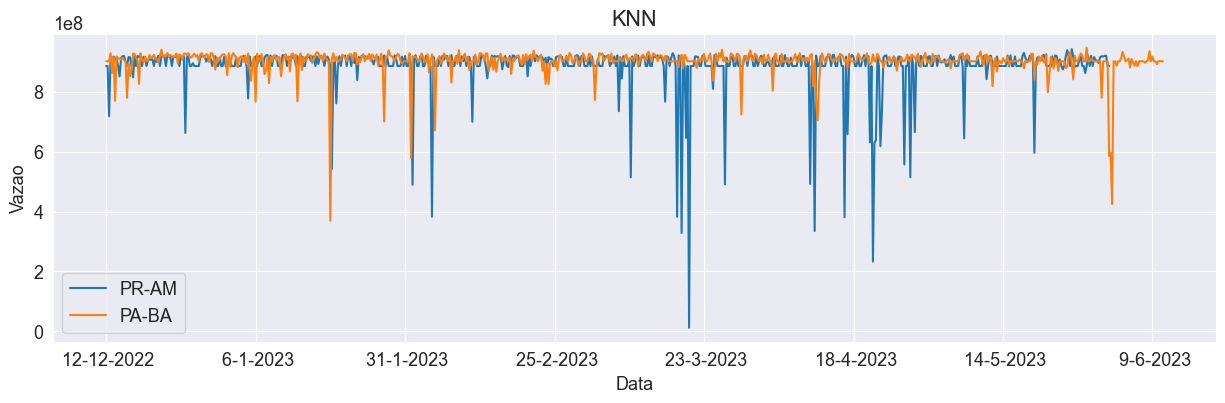

In [9]:
pr_am_knn['Vazao'].plot(figsize=(15,4),label = 'PR-AM')
pa_ba_knn['Vazao'].plot(figsize=(15,4),label = 'PA-BA')

plt.title('KNN')
plt.ylabel('Vazao')

plt.legend()

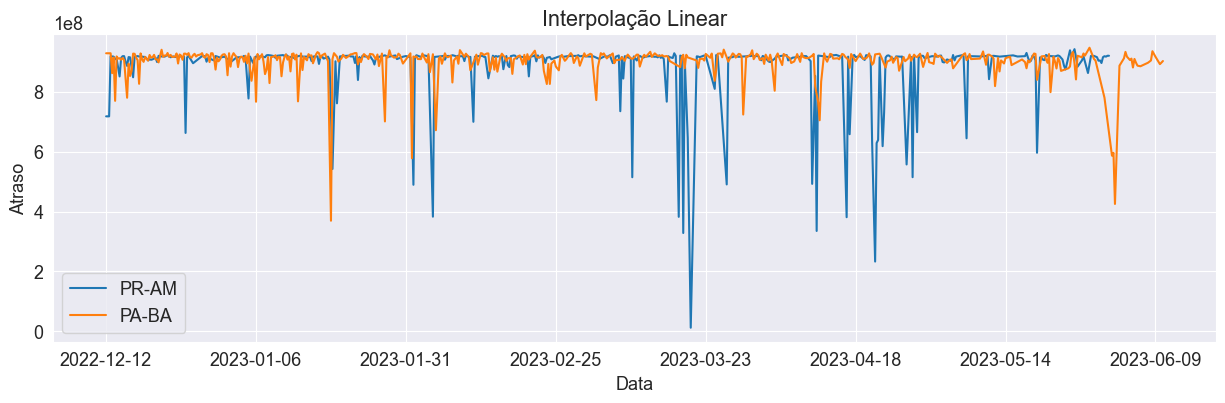

In [9]:
pr_am_interpolacao_linear['Vazao'].plot(figsize=(15,4),label = 'PR-AM')
pa_ba_interpolacao_linear['Vazao'].plot(figsize=(15,4),label = 'PA-BA')

plt.title('Interpolação Linear')
plt.ylabel('Atraso')

plt.legend()

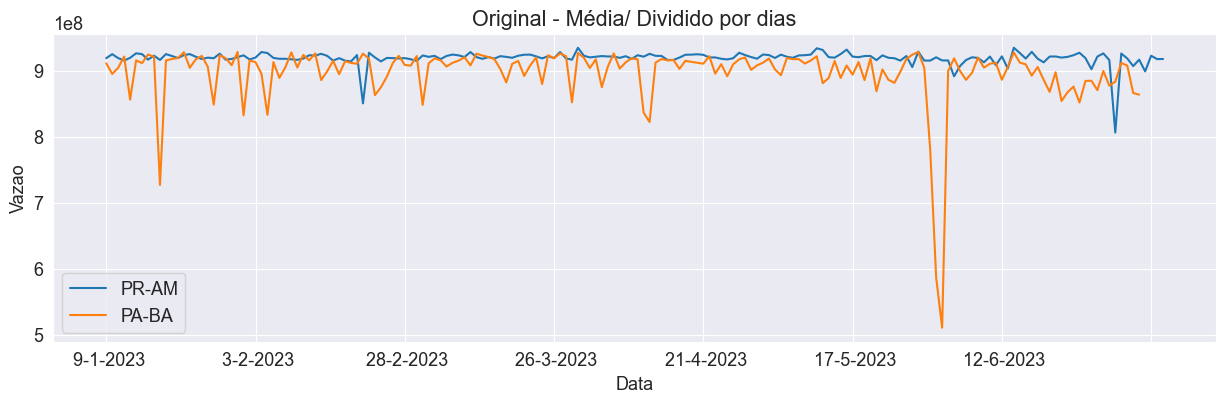

In [10]:
pr_am_original['Vazao'].plot(figsize=(15,4),label = 'PR-AM')
pa_ba_original['Vazao'].plot(figsize=(15,4),label = 'PA-BA')

plt.title('Original - Média/ Dividido por dias')
plt.ylabel('Vazao')

plt.legend()

In [10]:
# plot_decomposicao_serie_temporal(pr_am_interpolacao_linear, 'Atraso (ms)')
# plot_decomposicao_serie_temporal(pa_ba_interpolacao_linear, 'Atraso (ms)')


KeyError: 'Atraso (ms)'

In [14]:
# # ADF TEST

# print("ce-sp é estacionária?",  testar_estacionariedade_serie_temporal(atraso_ce_sp, 'Atraso (ms)'))
# print("mg-rs é estacionária?",  testar_estacionariedade_serie_temporal(atraso_mg_rs, 'Atraso (ms)'))
# print("pr-am é estacionária?",  testar_estacionariedade_serie_temporal(atraso_pr_am, 'Atraso (ms)'))
# print("pa-ba é estacionária?",  testar_estacionariedade_serie_temporal(atraso_pa_ba, 'Atraso (ms)'))
# print("fd-rj é estacionária?",  testar_estacionariedade_serie_temporal(atraso_df_rj, 'Atraso (ms)'))

ce-sp é estacionária? True
mg-rs é estacionária? True
pr-am é estacionária? True
pa-ba é estacionária? True
fd-rj é estacionária? True


# Predição

## Window Sets

In [11]:
adj_size = 3

In [12]:
ts_pr_am_knn = pr_am_knn['Vazao']
X_pr_am_knn, y_pr_am_knn = window_set(ts_pr_am_knn, adj_size)


ts_pa_ba_knn = pa_ba_knn['Vazao']
X_pa_ba_knn, y_pa_ba_knn = window_set(ts_pa_ba_knn, adj_size)


X_pa_ba_knn.shape, y_pa_ba_knn.shape

((705, 3, 1), (705,))

In [13]:
ts_pr_am_interpolacao_linear = pr_am_interpolacao_linear['Vazao']
X_pr_am_interpolacao_linear, y_pr_am_interpolacao_linear = window_set(ts_pr_am_interpolacao_linear, adj_size)


ts_pa_ba_interpolacao_linear = pa_ba_interpolacao_linear['Vazao']
X_pa_ba_interpolacao_linear, y_pa_ba_interpolacao_linear = window_set(ts_pa_ba_interpolacao_linear, adj_size)


X_pa_ba_interpolacao_linear.shape, y_pa_ba_interpolacao_linear.shape

((705, 3, 1), (705,))

In [14]:
ts_pr_am_original = pr_am_original['Vazao']
X_pr_am_original, y_pr_am_original = window_set(ts_pr_am_original, adj_size)


ts_pa_ba_original = pa_ba_original['Vazao']
X_pa_ba_original, y_pa_ba_original = window_set(ts_pa_ba_original, adj_size)


X_pa_ba_original.shape, y_pa_ba_original.shape

((171, 3, 1), (171,))

## Divisao treino, validação e teste

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [16]:
# Divisao projeto e teste do dataset knn 
X_train_pr_am_knn, y_train_pr_am_knn = X_pr_am_knn[:403], y_pr_am_knn[:403]
X_val_pr_am_knn, y_val_pr_am_knn = X_pr_am_knn[403:537], y_pr_am_knn[403:537]
X_test_pr_am_knn, y_test_pr_am_knn = X_pr_am_knn[537:], y_pr_am_knn[537:]

X_train_pa_ba_knn, y_train_pa_ba_knn = X_pa_ba_knn[:424], y_pa_ba_knn[:424]
X_val_pa_ba_knn, y_val_pa_ba_knn = X_pa_ba_knn[424:565], y_pa_ba_knn[424:565]
X_test_pa_ba_knn, y_test_pa_ba_knn = X_pa_ba_knn[565:], y_pa_ba_knn[565:]

In [17]:
# Divisao projeto e teste do dataset interpol
X_train_pr_am_interpolacao_linear, y_train_pr_am_interpolacao_linear = X_pr_am_interpolacao_linear[:403], y_pr_am_interpolacao_linear[:403]
X_val_pr_am_interpolacao_linear, y_val_pr_am_interpolacao_linear = X_pr_am_interpolacao_linear[403:537], y_pr_am_interpolacao_linear[403:537]
X_test_pr_am_interpolacao_linear, y_test_pr_am_interpolacao_linear = X_pr_am_interpolacao_linear[537:], y_pr_am_interpolacao_linear[537:]

X_train_pa_ba_interpolacao_linear, y_train_pa_ba_interpolacao_linear = X_pa_ba_interpolacao_linear[:424], y_pa_ba_interpolacao_linear[:424]
X_val_pa_ba_interpolacao_linear, y_val_pa_ba_interpolacao_linear = X_pa_ba_interpolacao_linear[424:565], y_pa_ba_interpolacao_linear[424:565]
X_test_pa_ba_interpolacao_linear, y_test_pa_ba_interpolacao_linear = X_pa_ba_interpolacao_linear[565:], y_pa_ba_interpolacao_linear[565:]

In [18]:
# Divisao projeto e teste do dataset original
X_train_pr_am_original, y_train_pr_am_original = X_pr_am_original[:106], y_pr_am_original[:106]
X_val_pr_am_original, y_val_pr_am_original = X_pr_am_original[106:141], y_pr_am_original[106:141]
X_test_pr_am_original, y_test_pr_am_original = X_pr_am_original[141:], y_pr_am_original[141:]

X_train_pa_ba_original, y_train_pa_ba_original = X_pa_ba_original[:104], y_pa_ba_original[:104]
X_val_pa_ba_original, y_val_pa_ba_original = X_pa_ba_original[104:138], y_pa_ba_original[104:138]
X_test_pa_ba_original, y_test_pa_ba_original = X_pa_ba_original[138:], y_pa_ba_original[138:]

## Projeto

In [19]:
# Modelo LSTM
model_LSTM = Sequential()
model_LSTM.add(InputLayer((3, 1)))
model_LSTM.add(LSTM(64))
model_LSTM.add(Dense(8, 'relu'))
model_LSTM.add(Dense(1, 'linear'))

In [20]:
# Modelo GRU
model_GRU = Sequential()
model_GRU.add(InputLayer((3, 1)))
model_GRU.add(GRU(64))
model_GRU.add(Dense(8, 'relu'))
model_GRU.add(Dense(1, 'linear'))

In [21]:
model_GRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
def criar_modelo_LSTM():
    model_LSTM = Sequential()
    model_LSTM.add(InputLayer((3, 1)))
    model_LSTM.add(LSTM(64))
    model_LSTM.add(Dense(8, 'relu'))
    model_LSTM.add(Dense(1, 'linear'))
    
    return model_LSTM

def criar_modelo_GRU():
    model_GRU = Sequential()
    model_GRU.add(InputLayer((3, 1)))
    model_GRU.add(GRU(64))
    model_GRU.add(Dense(8, 'relu'))
    model_GRU.add(Dense(1, 'linear'))
    
    return model_GRU

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## Treinamento

### Treinamento Original

Epoch 1/50
1/4 [======>.......................] - ETA: 2s - loss: 821417718040231936.0000 - root_mean_squared_error: 906320960.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


4/4 [==============================] - 2s 468ms/step - loss: 817491636895350784.0000 - root_mean_squared_error: 904152448.0000 - val_loss: 775438821826232320.0000 - val_root_mean_squared_error: 880590016.0000
Epoch 2/50
1/4 [======>.......................] - ETA: 0s - loss: 805872616488304640.0000 - root_mean_squared_error: 897704064.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 409ms/step - loss: 804786092841631744.0000 - root_mean_squared_error: 897098688.0000 - val_loss: 750233067515281408.0000 - val_root_mean_squared_error: 866159936.0000
Epoch 3/50
1/4 [======>.......................] - ETA: 0s - loss: 802287521386987520.0000 - root_mean_squared_error: 895705024.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 404ms/step - loss: 773037350992216064.0000 - root_mean_squared_error: 879225408.0000 - val_loss: 704528636891365376.0000 - val_root_mean_squared_error: 839362048.0000
Epoch 4/50
1/4 [======>.......................] - ETA: 0s - loss: 729752464424697856.0000 - root_mean_squared_error: 854255488.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


4/4 [==============================] - 2s 577ms/step - loss: 719520546655567872.0000 - root_mean_squared_error: 848245568.0000 - val_loss: 637053188842717184.0000 - val_root_mean_squared_error: 798156096.0000
Epoch 5/50
1/4 [======>.......................] - ETA: 0s - loss: 675602066512543744.0000 - root_mean_squared_error: 821950144.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 401ms/step - loss: 643770930010521600.0000 - root_mean_squared_error: 802353344.0000 - val_loss: 548652557048741888.0000 - val_root_mean_squared_error: 740710848.0000
Epoch 6/50
1/4 [======>.......................] - ETA: 0s - loss: 590038002919538688.0000 - root_mean_squared_error: 768139328.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 402ms/step - loss: 547205084350513152.0000 - root_mean_squared_error: 739733120.0000 - val_loss: 443034019840393216.0000 - val_root_mean_squared_error: 665608000.0000
Epoch 7/50
1/4 [======>.......................] - ETA: 0s - loss: 464666670598717440.0000 - root_mean_squared_error: 681664640.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 390ms/step - loss: 433858423507910656.0000 - root_mean_squared_error: 658679296.0000 - val_loss: 327462256700817408.0000 - val_root_mean_squared_error: 572243200.0000
Epoch 8/50
1/4 [======>.......................] - ETA: 0s - loss: 339710335197904896.0000 - root_mean_squared_error: 582846720.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 398ms/step - loss: 312704268035424256.0000 - root_mean_squared_error: 559199680.0000 - val_loss: 212828480058949632.0000 - val_root_mean_squared_error: 461333376.0000
Epoch 9/50
1/4 [======>.......................] - ETA: 0s - loss: 224991535383445504.0000 - root_mean_squared_error: 474332736.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 396ms/step - loss: 195854700585680896.0000 - root_mean_squared_error: 442554752.0000 - val_loss: 113163652286119936.0000 - val_root_mean_squared_error: 336398048.0000
Epoch 10/50
1/4 [======>.......................] - ETA: 0s - loss: 123259780369219584.0000 - root_mean_squared_error: 351083712.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


4/4 [==============================] - 2s 574ms/step - loss: 97735056017063936.0000 - root_mean_squared_error: 312626080.0000 - val_loss: 42850557999710208.0000 - val_root_mean_squared_error: 207003760.0000
Epoch 11/50
1/4 [======>.......................] - ETA: 0s - loss: 47171995179155456.0000 - root_mean_squared_error: 217191152.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 376ms/step - loss: 31568383287754752.0000 - root_mean_squared_error: 177674944.0000 - val_loss: 10506937409994752.0000 - val_root_mean_squared_error: 102503352.0000
Epoch 12/50
4/4 [==============================] - 0s 6ms/step - loss: 3452502481567744.0000 - root_mean_squared_error: 58758000.0000 - val_loss: 11128069137891328.0000 - val_root_mean_squared_error: 105489664.0000
Epoch 13/50
4/4 [==============================] - 0s 7ms/step - loss: 4829267670073344.0000 - root_mean_squared_error: 69492936.0000 - val_loss: 25104837611880448.0000 - val_root_mean_squared_error: 158445056.0000
Epoch 14/50
4/4 [==============================] - 0s 6ms/step - loss: 15117408708591616.0000 - root_mean_squared_error: 122952872.0000 - val_loss: 32141138651512832.0000 - val_root_mean_squared_error: 179279504.0000
Epoch 15/50
4/4 [==============================] - 0s 7ms/step - loss: 17833515961810944.0000 - root_mean_squared_error: 133542184.0000 - val_loss

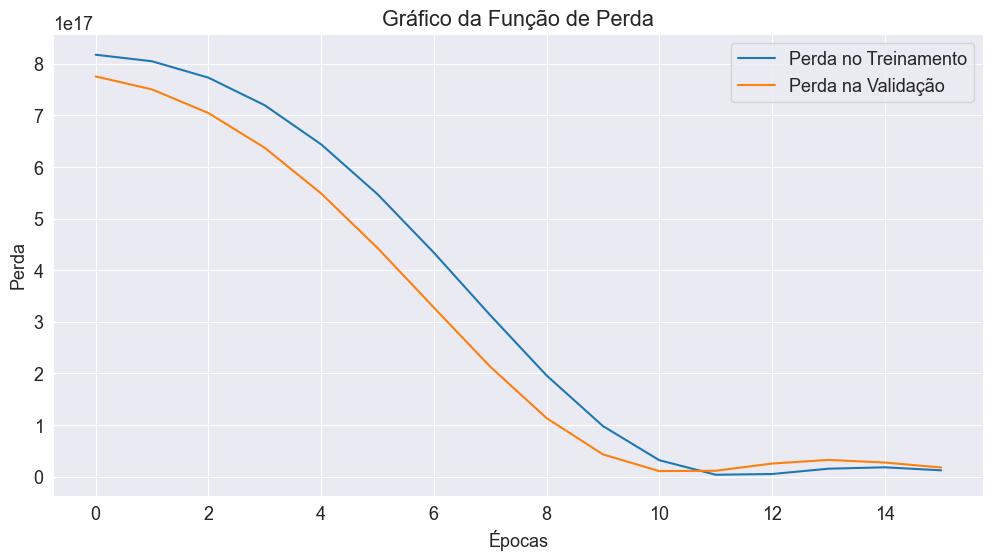

INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pa_ba/assets


In [43]:
# TREINAMENTO LSTM ORIGINAL PA-BA (LR:100, 50 EPOCH)

# Defina o callback ModelCheckpoint como antes
model_LSTM = criar_modelo_LSTM()

cp_original_pa_ba = ModelCheckpoint('modelos_vazao/modelos_LSTM/treinado_original_pa_ba', save_best_only=True)

# Defina o callback EarlyStopping para monitorar a perda (loss) no conjunto de validação
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=100), metrics=[RootMeanSquaredError()])

# Adicione o callback EarlyStopping à lista de callbacks
history = model_LSTM.fit(X_train_pa_ba_original, y_train_pa_ba_original, validation_data=(X_val_pa_ba_original, y_val_pa_ba_original), epochs=50, callbacks=[cp_original_pa_ba, early_stopping])

# Acesse os registros de perda (loss) do treinamento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crie um gráfico da função de perda durante o treinamento
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Perda no Treinamento')
plt.plot(val_loss, label='Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Gráfico da Função de Perda')
plt.legend()
plt.show()

model_LSTM.save('modelos_vazao/modelos_LSTM/treinado_original_pa_ba')

Epoch 1/50
1/4 [======>.......................] - ETA: 2s - loss: 849203888702619648.0000 - root_mean_squared_error: 921522624.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


4/4 [==============================] - 2s 509ms/step - loss: 846508504666603520.0000 - root_mean_squared_error: 920058944.0000 - val_loss: 842835311196110848.0000 - val_root_mean_squared_error: 918060608.0000
Epoch 2/50
1/4 [======>.......................] - ETA: 0s - loss: 843499965975101440.0000 - root_mean_squared_error: 918422528.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


4/4 [==============================] - 1s 399ms/step - loss: 840409170069946368.0000 - root_mean_squared_error: 916738304.0000 - val_loss: 830492262382174208.0000 - val_root_mean_squared_error: 911313472.0000
Epoch 3/50
1/4 [======>.......................] - ETA: 0s - loss: 829770776595922944.0000 - root_mean_squared_error: 910917568.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


4/4 [==============================] - 1s 410ms/step - loss: 825095790593572864.0000 - root_mean_squared_error: 908347840.0000 - val_loss: 807803908662493184.0000 - val_root_mean_squared_error: 898779136.0000
Epoch 4/50
1/4 [======>.......................] - ETA: 0s - loss: 809895935692767232.0000 - root_mean_squared_error: 899942208.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


4/4 [==============================] - 1s 476ms/step - loss: 799028843800166400.0000 - root_mean_squared_error: 893884160.0000 - val_loss: 773506911176753152.0000 - val_root_mean_squared_error: 879492416.0000
Epoch 5/50
1/4 [======>.......................] - ETA: 0s - loss: 774482246710067200.0000 - root_mean_squared_error: 880046720.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


4/4 [==============================] - 1s 393ms/step - loss: 761072328019804160.0000 - root_mean_squared_error: 872394624.0000 - val_loss: 726812095454117888.0000 - val_root_mean_squared_error: 852532736.0000
Epoch 6/50
1/4 [======>.......................] - ETA: 0s - loss: 728653433833259008.0000 - root_mean_squared_error: 853611968.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


4/4 [==============================] - 1s 387ms/step - loss: 710636836300521472.0000 - root_mean_squared_error: 842992768.0000 - val_loss: 667598721373962240.0000 - val_root_mean_squared_error: 817067136.0000
Epoch 7/50
1/4 [======>.......................] - ETA: 0s - loss: 668589175192158208.0000 - root_mean_squared_error: 817673024.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


4/4 [==============================] - 1s 461ms/step - loss: 647792118911205376.0000 - root_mean_squared_error: 804855360.0000 - val_loss: 596615899952185344.0000 - val_root_mean_squared_error: 772409152.0000
Epoch 8/50
1/4 [======>.......................] - ETA: 0s - loss: 597921088973832192.0000 - root_mean_squared_error: 773253568.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


4/4 [==============================] - 1s 394ms/step - loss: 573657753566838784.0000 - root_mean_squared_error: 757401984.0000 - val_loss: 515642056886976512.0000 - val_root_mean_squared_error: 718082176.0000
Epoch 9/50
1/4 [======>.......................] - ETA: 0s - loss: 516362511881076736.0000 - root_mean_squared_error: 718583680.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


4/4 [==============================] - 1s 456ms/step - loss: 490274399488835584.0000 - root_mean_squared_error: 700195968.0000 - val_loss: 427612544627113984.0000 - val_root_mean_squared_error: 653920896.0000
Epoch 10/50
1/4 [======>.......................] - ETA: 0s - loss: 428814139037581312.0000 - root_mean_squared_error: 654839040.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


4/4 [==============================] - 1s 406ms/step - loss: 400983472514007040.0000 - root_mean_squared_error: 633232576.0000 - val_loss: 336604661526036480.0000 - val_root_mean_squared_error: 580176384.0000
Epoch 11/50
1/4 [======>.......................] - ETA: 0s - loss: 337279040110985216.0000 - root_mean_squared_error: 580757312.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


4/4 [==============================] - 1s 466ms/step - loss: 310168038307528704.0000 - root_mean_squared_error: 556927296.0000 - val_loss: 247688152620204032.0000 - val_root_mean_squared_error: 497682784.0000
Epoch 12/50
1/4 [======>.......................] - ETA: 0s - loss: 249496162053128192.0000 - root_mean_squared_error: 499495904.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


4/4 [==============================] - 1s 405ms/step - loss: 223104807789920256.0000 - root_mean_squared_error: 472339744.0000 - val_loss: 166509886291574784.0000 - val_root_mean_squared_error: 408056224.0000
Epoch 13/50
1/4 [======>.......................] - ETA: 0s - loss: 165956831942803456.0000 - root_mean_squared_error: 407377984.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


4/4 [==============================] - 1s 394ms/step - loss: 145341933814808576.0000 - root_mean_squared_error: 381237376.0000 - val_loss: 98570495875612672.0000 - val_root_mean_squared_error: 313959392.0000
Epoch 14/50
1/4 [======>.......................] - ETA: 0s - loss: 99678554488307712.0000 - root_mean_squared_error: 315719104.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


4/4 [==============================] - 1s 459ms/step - loss: 82336687727837184.0000 - root_mean_squared_error: 286943712.0000 - val_loss: 48071627618910208.0000 - val_root_mean_squared_error: 219252432.0000
Epoch 15/50
1/4 [======>.......................] - ETA: 0s - loss: 47802444838600704.0000 - root_mean_squared_error: 218637696.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


4/4 [==============================] - 1s 393ms/step - loss: 37421122337112064.0000 - root_mean_squared_error: 193445392.0000 - val_loss: 16706076309192704.0000 - val_root_mean_squared_error: 129251984.0000
Epoch 16/50
1/4 [======>.......................] - ETA: 0s - loss: 16937340970729472.0000 - root_mean_squared_error: 130143536.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


4/4 [==============================] - 1s 468ms/step - loss: 11479813000790016.0000 - root_mean_squared_error: 107143888.0000 - val_loss: 2535423079350272.0000 - val_root_mean_squared_error: 50352984.0000
Epoch 17/50
1/4 [======>.......................] - ETA: 0s - loss: 2640430466334720.0000 - root_mean_squared_error: 51385120.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


4/4 [==============================] - 1s 404ms/step - loss: 1255227546140672.0000 - root_mean_squared_error: 35429192.0000 - val_loss: 213286331088896.0000 - val_root_mean_squared_error: 14604326.0000
Epoch 18/50
4/4 [==============================] - 0s 10ms/step - loss: 839070179655680.0000 - root_mean_squared_error: 28966708.0000 - val_loss: 2954339157016576.0000 - val_root_mean_squared_error: 54353832.0000
Epoch 19/50
4/4 [==============================] - 0s 7ms/step - loss: 3812645153013760.0000 - root_mean_squared_error: 61746620.0000 - val_loss: 5494546829934592.0000 - val_root_mean_squared_error: 74125208.0000
Epoch 20/50
4/4 [==============================] - 0s 7ms/step - loss: 5703183456272384.0000 - root_mean_squared_error: 75519424.0000 - val_loss: 5715460620288000.0000 - val_root_mean_squared_error: 75600664.0000
Epoch 21/50
4/4 [==============================] - 0s 8ms/step - loss: 5282436648796160.0000 - root_mean_squared_error: 72680376.0000 - val_loss: 4104258936897

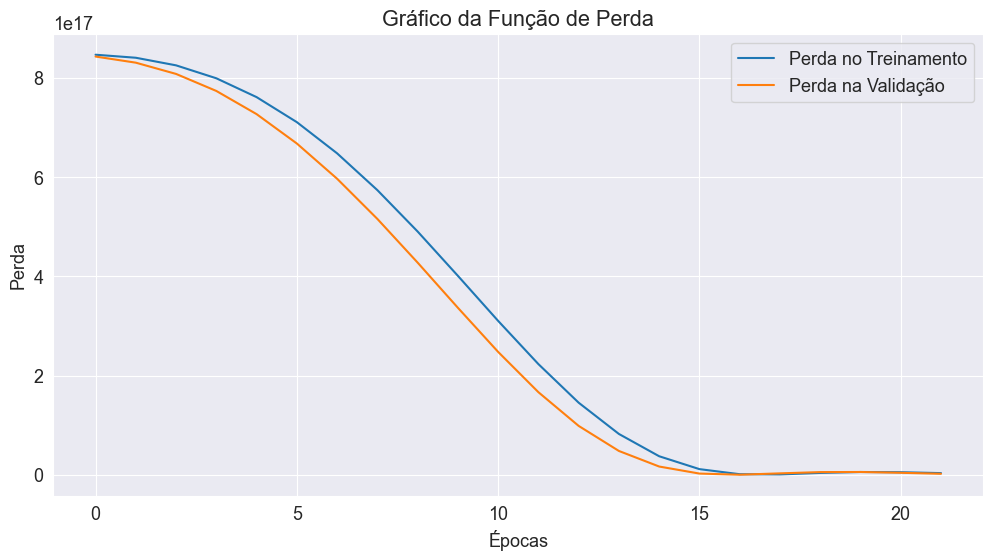

INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_original_pr_am/assets


In [26]:
# TREINAMENTO LSTM ORIGINAL PR-AM (LR:100, 50 EPOCH)

# Defina o callback ModelCheckpoint como antes
model_LSTM = criar_modelo_LSTM()

cp_original_pr_am = ModelCheckpoint('modelos_vazao/modelos_LSTM/treinado_original_pr_am', save_best_only=True)

# Defina o callback EarlyStopping para monitorar a perda (loss) no conjunto de validação
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=100), metrics=[RootMeanSquaredError()])

# Adicione o callback EarlyStopping à lista de callbacks
history = model_LSTM.fit(X_train_pr_am_original, y_train_pr_am_original, validation_data=(X_val_pr_am_original, y_val_pr_am_original), epochs=50, callbacks=[cp_original_pr_am, early_stopping])

# Acesse os registros de perda (loss) do treinamento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crie um gráfico da função de perda durante o treinamento
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Perda no Treinamento')
plt.plot(val_loss, label='Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Gráfico da Função de Perda')
plt.legend()
plt.show()

model_LSTM.save('modelos_vazao/modelos_LSTM/treinado_original_pr_am')

Epoch 1/50
1/4 [======>.......................] - ETA: 2s - loss: 848882418990448640.0000 - root_mean_squared_error: 921348160.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


4/4 [==============================] - 2s 429ms/step - loss: 845745237438496768.0000 - root_mean_squared_error: 919644096.0000 - val_loss: 837914172028092416.0000 - val_root_mean_squared_error: 915376512.0000
Epoch 2/50
1/4 [======>.......................] - ETA: 0s - loss: 840186106648461312.0000 - root_mean_squared_error: 916616640.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


4/4 [==============================] - 1s 382ms/step - loss: 831620636190179328.0000 - root_mean_squared_error: 911932352.0000 - val_loss: 809448365740785664.0000 - val_root_mean_squared_error: 899693504.0000
Epoch 3/50
1/4 [======>.......................] - ETA: 0s - loss: 806271464331280384.0000 - root_mean_squared_error: 897926208.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


4/4 [==============================] - 1s 451ms/step - loss: 796419496549023744.0000 - root_mean_squared_error: 892423360.0000 - val_loss: 757867732661174272.0000 - val_root_mean_squared_error: 870555968.0000
Epoch 4/50
1/4 [======>.......................] - ETA: 0s - loss: 754954095567044608.0000 - root_mean_squared_error: 868880960.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


4/4 [==============================] - 1s 388ms/step - loss: 737585041663590400.0000 - root_mean_squared_error: 858827712.0000 - val_loss: 681855126578659328.0000 - val_root_mean_squared_error: 825745216.0000
Epoch 5/50
1/4 [======>.......................] - ETA: 0s - loss: 682944880040738816.0000 - root_mean_squared_error: 826404800.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


4/4 [==============================] - 1s 471ms/step - loss: 654452341876981760.0000 - root_mean_squared_error: 808982272.0000 - val_loss: 582532186792525824.0000 - val_root_mean_squared_error: 763237952.0000
Epoch 6/50
1/4 [======>.......................] - ETA: 0s - loss: 583929459912998912.0000 - root_mean_squared_error: 764152768.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


4/4 [==============================] - 1s 364ms/step - loss: 549012269149716480.0000 - root_mean_squared_error: 740953600.0000 - val_loss: 464379732423606272.0000 - val_root_mean_squared_error: 681454144.0000
Epoch 7/50
1/4 [======>.......................] - ETA: 0s - loss: 464193811879297024.0000 - root_mean_squared_error: 681317696.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


4/4 [==============================] - 1s 355ms/step - loss: 426925521658445824.0000 - root_mean_squared_error: 653395392.0000 - val_loss: 336006183603142656.0000 - val_root_mean_squared_error: 579660416.0000
Epoch 8/50
1/4 [======>.......................] - ETA: 0s - loss: 337272030724358144.0000 - root_mean_squared_error: 580751296.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


4/4 [==============================] - 1s 450ms/step - loss: 298255620094558208.0000 - root_mean_squared_error: 546127872.0000 - val_loss: 210375435257643008.0000 - val_root_mean_squared_error: 458667008.0000
Epoch 9/50
1/4 [======>.......................] - ETA: 0s - loss: 211430725902139392.0000 - root_mean_squared_error: 459815968.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


4/4 [==============================] - 1s 381ms/step - loss: 176894636176965632.0000 - root_mean_squared_error: 420588448.0000 - val_loss: 103707311121367040.0000 - val_root_mean_squared_error: 322036192.0000
Epoch 10/50
1/4 [======>.......................] - ETA: 0s - loss: 104039896208900096.0000 - root_mean_squared_error: 322552160.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


4/4 [==============================] - 1s 365ms/step - loss: 79426572506890240.0000 - root_mean_squared_error: 281827200.0000 - val_loss: 31663469568720896.0000 - val_root_mean_squared_error: 177942320.0000
Epoch 11/50
1/4 [======>.......................] - ETA: 0s - loss: 31614575661023232.0000 - root_mean_squared_error: 177804880.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


4/4 [==============================] - 1s 472ms/step - loss: 19777355882954752.0000 - root_mean_squared_error: 140631984.0000 - val_loss: 1737205957525504.0000 - val_root_mean_squared_error: 41679804.0000
Epoch 12/50
4/4 [==============================] - 0s 8ms/step - loss: 883314449711104.0000 - root_mean_squared_error: 29720606.0000 - val_loss: 4577886455463936.0000 - val_root_mean_squared_error: 67660080.0000
Epoch 13/50
4/4 [==============================] - 0s 8ms/step - loss: 8281336359944192.0000 - root_mean_squared_error: 91001848.0000 - val_loss: 16405432893440000.0000 - val_root_mean_squared_error: 128083696.0000
Epoch 14/50
4/4 [==============================] - 0s 9ms/step - loss: 17973928106393600.0000 - root_mean_squared_error: 134066880.0000 - val_loss: 18709693585162240.0000 - val_root_mean_squared_error: 136783376.0000
Epoch 15/50
4/4 [==============================] - 0s 8ms/step - loss: 16875080051064832.0000 - root_mean_squared_error: 129904120.0000 - val_loss: 114

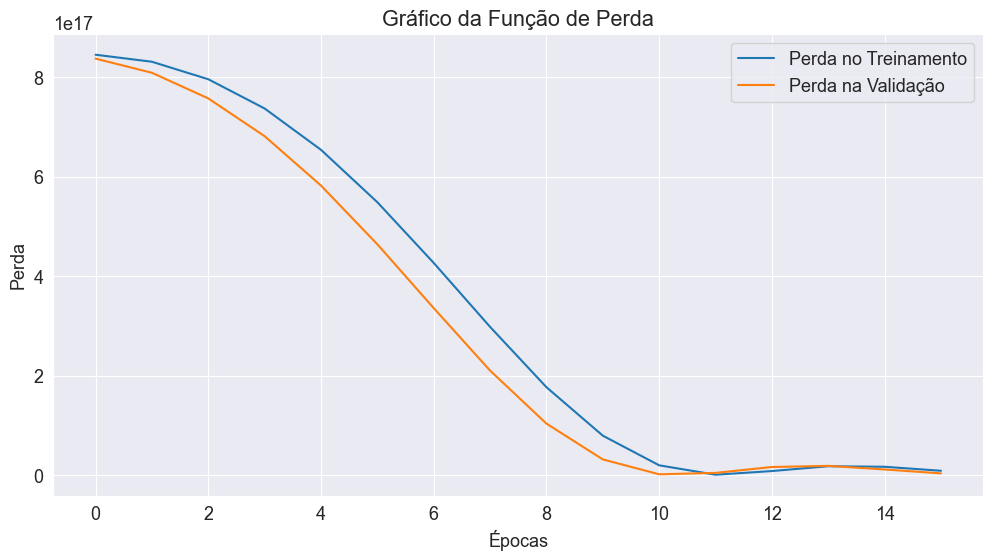

INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pr_am/assets


In [28]:
# TREINAMENTO GRU ORIGINAL PR-AM (LR:100, 50 EPOCH)

# Defina o callback ModelCheckpoint como antes
model_GRU = criar_modelo_GRU()

cp_original_pr_am = ModelCheckpoint('modelos_vazao/modelos_GRU/treinado_original_pr_am', save_best_only=True)

# Defina o callback EarlyStopping para monitorar a perda (loss) no conjunto de validação
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_GRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=100), metrics=[RootMeanSquaredError()])

# Adicione o callback EarlyStopping à lista de callbacks
history = model_GRU.fit(X_train_pr_am_original, y_train_pr_am_original, validation_data=(X_val_pr_am_original, y_val_pr_am_original), epochs=50, callbacks=[cp_original_pr_am, early_stopping])

# Acesse os registros de perda (loss) do treinamento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crie um gráfico da função de perda durante o treinamento
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Perda no Treinamento')
plt.plot(val_loss, label='Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Gráfico da Função de Perda')
plt.legend()
plt.show()

model_GRU.save('modelos_vazao/modelos_GRU/treinado_original_pr_am')

Epoch 1/50
1/4 [======>.......................] - ETA: 2s - loss: 815695241053995008.0000 - root_mean_squared_error: 903158464.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


4/4 [==============================] - 2s 491ms/step - loss: 817722190739800064.0000 - root_mean_squared_error: 904279936.0000 - val_loss: 776936150504833024.0000 - val_root_mean_squared_error: 881439808.0000
Epoch 2/50
1/4 [======>.......................] - ETA: 0s - loss: 829566542311063552.0000 - root_mean_squared_error: 910805440.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 345ms/step - loss: 807560435556417536.0000 - root_mean_squared_error: 898643648.0000 - val_loss: 756623566534868992.0000 - val_root_mean_squared_error: 869841088.0000
Epoch 3/50
1/4 [======>.......................] - ETA: 0s - loss: 790864832524976128.0000 - root_mean_squared_error: 889305792.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 349ms/step - loss: 781860656927211520.0000 - root_mean_squared_error: 884228864.0000 - val_loss: 719608026549452800.0000 - val_root_mean_squared_error: 848297152.0000
Epoch 4/50
1/4 [======>.......................] - ETA: 0s - loss: 748713817323601920.0000 - root_mean_squared_error: 865282496.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 434ms/step - loss: 738467537183834112.0000 - root_mean_squared_error: 859341312.0000 - val_loss: 664507032115609600.0000 - val_root_mean_squared_error: 815172992.0000
Epoch 5/50
1/4 [======>.......................] - ETA: 0s - loss: 691532821767913472.0000 - root_mean_squared_error: 831584512.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 372ms/step - loss: 676243906425257984.0000 - root_mean_squared_error: 822340480.0000 - val_loss: 591275365817647104.0000 - val_root_mean_squared_error: 768944320.0000
Epoch 6/50
1/4 [======>.......................] - ETA: 0s - loss: 616153671821950976.0000 - root_mean_squared_error: 784954560.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 438ms/step - loss: 595742269244440576.0000 - root_mean_squared_error: 771843392.0000 - val_loss: 501759073318862848.0000 - val_root_mean_squared_error: 708349568.0000
Epoch 7/50
1/4 [======>.......................] - ETA: 0s - loss: 528334028844040192.0000 - root_mean_squared_error: 726865920.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 429ms/step - loss: 499385399513186304.0000 - root_mean_squared_error: 706672064.0000 - val_loss: 400225496685608960.0000 - val_root_mean_squared_error: 632633792.0000
Epoch 8/50
1/4 [======>.......................] - ETA: 0s - loss: 425303157891923968.0000 - root_mean_squared_error: 652152704.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 471ms/step - loss: 391828698182975488.0000 - root_mean_squared_error: 625962240.0000 - val_loss: 293607400328396800.0000 - val_root_mean_squared_error: 541855488.0000
Epoch 9/50
1/4 [======>.......................] - ETA: 0s - loss: 305070839840112640.0000 - root_mean_squared_error: 552332160.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 472ms/step - loss: 280928897388773376.0000 - root_mean_squared_error: 530027264.0000 - val_loss: 191224090185433088.0000 - val_root_mean_squared_error: 437291776.0000
Epoch 10/50
1/4 [======>.......................] - ETA: 0s - loss: 202780077652443136.0000 - root_mean_squared_error: 450311104.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 377ms/step - loss: 176893931802329088.0000 - root_mean_squared_error: 420587616.0000 - val_loss: 104155886095695872.0000 - val_root_mean_squared_error: 322731904.0000
Epoch 11/50
1/4 [======>.......................] - ETA: 0s - loss: 110984385880129536.0000 - root_mean_squared_error: 333143200.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 373ms/step - loss: 91053383984611328.0000 - root_mean_squared_error: 301750528.0000 - val_loss: 42617568908804096.0000 - val_root_mean_squared_error: 206440224.0000
Epoch 12/50
1/4 [======>.......................] - ETA: 0s - loss: 46174196966883328.0000 - root_mean_squared_error: 214881824.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 485ms/step - loss: 32520160925450240.0000 - root_mean_squared_error: 180333472.0000 - val_loss: 12166702825472000.0000 - val_root_mean_squared_error: 110302776.0000
Epoch 13/50
1/4 [======>.......................] - ETA: 0s - loss: 9839097912754176.0000 - root_mean_squared_error: 99192224.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


4/4 [==============================] - 1s 377ms/step - loss: 5179528695513088.0000 - root_mean_squared_error: 71968944.0000 - val_loss: 8839005114204160.0000 - val_root_mean_squared_error: 94015984.0000
Epoch 14/50
4/4 [==============================] - 0s 8ms/step - loss: 2374724998922240.0000 - root_mean_squared_error: 48731152.0000 - val_loss: 18788547037233152.0000 - val_root_mean_squared_error: 137071328.0000
Epoch 15/50
4/4 [==============================] - 0s 8ms/step - loss: 9707259596636160.0000 - root_mean_squared_error: 98525424.0000 - val_loss: 26561868759826432.0000 - val_root_mean_squared_error: 162978128.0000
Epoch 16/50
4/4 [==============================] - 0s 8ms/step - loss: 14094392595841024.0000 - root_mean_squared_error: 118719808.0000 - val_loss: 25630657573027840.0000 - val_root_mean_squared_error: 160095776.0000
Epoch 17/50
4/4 [==============================] - 0s 9ms/step - loss: 11627519073583104.0000 - root_mean_squared_error: 107830976.0000 - val_loss: 19

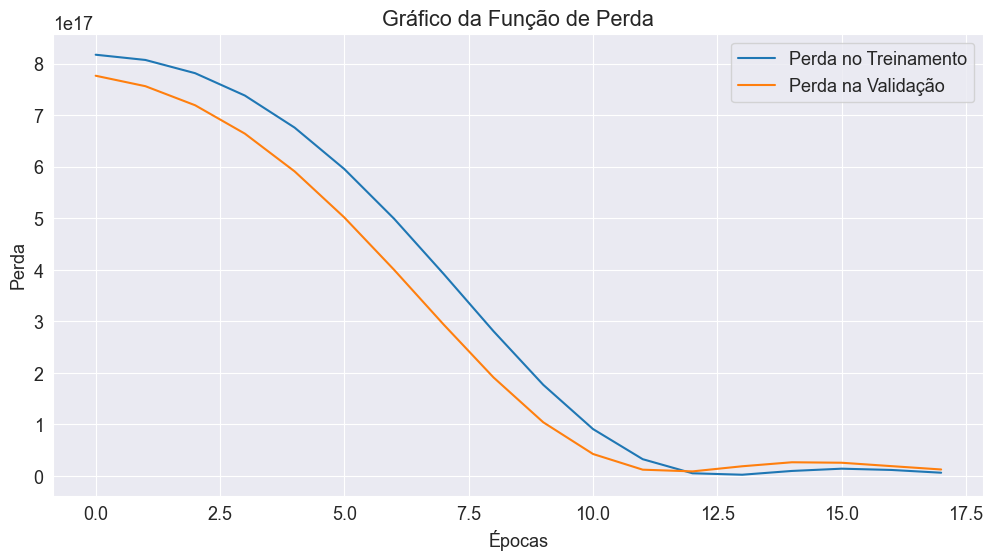

INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_original_pa_ba/assets


In [29]:
# TREINAMENTO GRU ORIGINAL PA-BA (LR:100, 50 EPOCH)

# Defina o callback ModelCheckpoint como antes
model_GRU = criar_modelo_GRU()

cp_original_pa_ba = ModelCheckpoint('modelos_vazao/modelos_GRU/treinado_original_pa_ba', save_best_only=True)

# Defina o callback EarlyStopping para monitorar a perda (loss) no conjunto de validação
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_GRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=100), metrics=[RootMeanSquaredError()])

# Adicione o callback EarlyStopping à lista de callbacks
history = model_GRU.fit(X_train_pa_ba_original, y_train_pa_ba_original, validation_data=(X_val_pa_ba_original, y_val_pa_ba_original), epochs=50, callbacks=[cp_original_pa_ba, early_stopping])

# Acesse os registros de perda (loss) do treinamento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crie um gráfico da função de perda durante o treinamento
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Perda no Treinamento')
plt.plot(val_loss, label='Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Gráfico da Função de Perda')
plt.legend()
plt.show()

model_GRU.save('modelos_vazao/modelos_GRU/treinado_original_pa_ba')

### Treinamento KNN

Epoch 1/50
 1/13 [=>............................] - ETA: 10s - loss: 816138344239988736.0000 - root_mean_squared_error: 903403776.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 3s 156ms/step - loss: 799734661545721856.0000 - root_mean_squared_error: 894278848.0000 - val_loss: 758883200368902144.0000 - val_root_mean_squared_error: 871139008.0000
Epoch 2/50
 1/13 [=>............................] - ETA: 0s - loss: 795423270294781952.0000 - root_mean_squared_error: 891865024.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 100ms/step - loss: 797518595859939328.0000 - root_mean_squared_error: 893038976.0000 - val_loss: 755062328742903808.0000 - val_root_mean_squared_error: 868943232.0000
Epoch 3/50
 1/13 [=>............................] - ETA: 0s - loss: 801535111836205056.0000 - root_mean_squared_error: 895284928.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 104ms/step - loss: 791842023484162048.0000 - root_mean_squared_error: 889855040.0000 - val_loss: 747275037639180288.0000 - val_root_mean_squared_error: 864450688.0000
Epoch 4/50
 1/13 [=>............................] - ETA: 0s - loss: 738450563473080320.0000 - root_mean_squared_error: 859331456.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 2s 129ms/step - loss: 781636906310959104.0000 - root_mean_squared_error: 884102336.0000 - val_loss: 734724112408117248.0000 - val_root_mean_squared_error: 857160512.0000
Epoch 5/50
 1/13 [=>............................] - ETA: 0s - loss: 791639919503081472.0000 - root_mean_squared_error: 889741504.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 109ms/step - loss: 766344142677606400.0000 - root_mean_squared_error: 875410816.0000 - val_loss: 716980468636975104.0000 - val_root_mean_squared_error: 846747008.0000
Epoch 6/50
 1/13 [=>............................] - ETA: 0s - loss: 757039388088598528.0000 - root_mean_squared_error: 870080128.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 104ms/step - loss: 745624876844318720.0000 - root_mean_squared_error: 863495744.0000 - val_loss: 693988512269074432.0000 - val_root_mean_squared_error: 833059712.0000
Epoch 7/50
 1/13 [=>............................] - ETA: 0s - loss: 742531538318524416.0000 - root_mean_squared_error: 861702720.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 106ms/step - loss: 719494227095977984.0000 - root_mean_squared_error: 848230080.0000 - val_loss: 665950759602356224.0000 - val_root_mean_squared_error: 816058048.0000
Epoch 8/50
 1/13 [=>............................] - ETA: 0s - loss: 706162579889717248.0000 - root_mean_squared_error: 840334784.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 2s 160ms/step - loss: 688279641739231232.0000 - root_mean_squared_error: 829626176.0000 - val_loss: 633226888378056704.0000 - val_root_mean_squared_error: 795755520.0000
Epoch 9/50
 1/13 [=>............................] - ETA: 0s - loss: 680264957886988288.0000 - root_mean_squared_error: 824781760.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 109ms/step - loss: 652460988880125952.0000 - root_mean_squared_error: 807750592.0000 - val_loss: 596360126059773952.0000 - val_root_mean_squared_error: 772243584.0000
Epoch 10/50
 1/13 [=>............................] - ETA: 0s - loss: 604438925183811584.0000 - root_mean_squared_error: 777456704.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 103ms/step - loss: 612522534671220736.0000 - root_mean_squared_error: 782638208.0000 - val_loss: 556091887082012672.0000 - val_root_mean_squared_error: 745715712.0000
Epoch 11/50
 1/13 [=>............................] - ETA: 0s - loss: 602762238670929920.0000 - root_mean_squared_error: 776377664.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 2s 154ms/step - loss: 569413673043361792.0000 - root_mean_squared_error: 754595008.0000 - val_loss: 513050095663448064.0000 - val_root_mean_squared_error: 716275136.0000
Epoch 12/50
 1/13 [=>............................] - ETA: 0s - loss: 557919550285283328.0000 - root_mean_squared_error: 746940096.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 119ms/step - loss: 523863552004456448.0000 - root_mean_squared_error: 723784192.0000 - val_loss: 468096356603396096.0000 - val_root_mean_squared_error: 684175680.0000
Epoch 13/50
 1/13 [=>............................] - ETA: 0s - loss: 505651997316218880.0000 - root_mean_squared_error: 711092096.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 98ms/step - loss: 476529232831315968.0000 - root_mean_squared_error: 690310976.0000 - val_loss: 422324443453325312.0000 - val_root_mean_squared_error: 649864960.0000
Epoch 14/50
 1/13 [=>............................] - ETA: 0s - loss: 440226313819652096.0000 - root_mean_squared_error: 663495552.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 103ms/step - loss: 428661410000535552.0000 - root_mean_squared_error: 654722368.0000 - val_loss: 376328814046740480.0000 - val_root_mean_squared_error: 613456448.0000
Epoch 15/50
 1/13 [=>............................] - ETA: 0s - loss: 410912371750469632.0000 - root_mean_squared_error: 641024448.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 2s 178ms/step - loss: 380829286937919488.0000 - root_mean_squared_error: 617113664.0000 - val_loss: 331164277991800832.0000 - val_root_mean_squared_error: 575468736.0000
Epoch 16/50
 1/13 [=>............................] - ETA: 0s - loss: 349698779860959232.0000 - root_mean_squared_error: 591353344.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 101ms/step - loss: 334223566016872448.0000 - root_mean_squared_error: 578120704.0000 - val_loss: 287449001341485056.0000 - val_root_mean_squared_error: 536142720.0000
Epoch 17/50
 1/13 [=>............................] - ETA: 0s - loss: 309734693287231488.0000 - root_mean_squared_error: 556538112.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 99ms/step - loss: 289221207927029760.0000 - root_mean_squared_error: 537792896.0000 - val_loss: 246166926743568384.0000 - val_root_mean_squared_error: 496152128.0000
Epoch 18/50
 1/13 [=>............................] - ETA: 0s - loss: 278451354094010368.0000 - root_mean_squared_error: 527684896.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 122ms/step - loss: 246907808602128384.0000 - root_mean_squared_error: 496898176.0000 - val_loss: 207713689405489152.0000 - val_root_mean_squared_error: 455756160.0000
Epoch 19/50
 1/13 [=>............................] - ETA: 0s - loss: 229138051429826560.0000 - root_mean_squared_error: 478683680.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 107ms/step - loss: 207625797194743808.0000 - root_mean_squared_error: 455659744.0000 - val_loss: 172728500719976448.0000 - val_root_mean_squared_error: 415606176.0000
Epoch 20/50
 1/13 [=>............................] - ETA: 0s - loss: 191702274664300544.0000 - root_mean_squared_error: 437838176.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 110ms/step - loss: 172107122031460352.0000 - root_mean_squared_error: 414857952.0000 - val_loss: 141440471422468096.0000 - val_root_mean_squared_error: 376085728.0000
Epoch 21/50
 1/13 [=>............................] - ETA: 0s - loss: 160070974400626688.0000 - root_mean_squared_error: 400088704.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 112ms/step - loss: 140278760078311424.0000 - root_mean_squared_error: 374538048.0000 - val_loss: 114221863508377600.0000 - val_root_mean_squared_error: 337967264.0000
Epoch 22/50
 1/13 [=>............................] - ETA: 0s - loss: 123195982925004800.0000 - root_mean_squared_error: 350992864.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 2s 136ms/step - loss: 112665564928802816.0000 - root_mean_squared_error: 335656928.0000 - val_loss: 91019084375785472.0000 - val_root_mean_squared_error: 301693696.0000
Epoch 23/50
 1/13 [=>............................] - ETA: 0s - loss: 99918772009172992.0000 - root_mean_squared_error: 316099296.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 105ms/step - loss: 89159689954131968.0000 - root_mean_squared_error: 298596192.0000 - val_loss: 71617952595574784.0000 - val_root_mean_squared_error: 267615312.0000
Epoch 24/50
 1/13 [=>............................] - ETA: 0s - loss: 81172365043564544.0000 - root_mean_squared_error: 284907648.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 99ms/step - loss: 69369829273894912.0000 - root_mean_squared_error: 263381520.0000 - val_loss: 55995923884408832.0000 - val_root_mean_squared_error: 236634576.0000
Epoch 25/50
 1/13 [=>............................] - ETA: 0s - loss: 60273702721290240.0000 - root_mean_squared_error: 245507024.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 2s 139ms/step - loss: 53444953828753408.0000 - root_mean_squared_error: 231181648.0000 - val_loss: 43607820863537152.0000 - val_root_mean_squared_error: 208824864.0000
Epoch 26/50
 1/13 [=>............................] - ETA: 0s - loss: 46554610810224640.0000 - root_mean_squared_error: 215765168.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 125ms/step - loss: 40583304893693952.0000 - root_mean_squared_error: 201452992.0000 - val_loss: 34267007876595712.0000 - val_root_mean_squared_error: 185113504.0000
Epoch 27/50
 1/13 [=>............................] - ETA: 0s - loss: 33415756095946752.0000 - root_mean_squared_error: 182799776.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 111ms/step - loss: 30806602118332416.0000 - root_mean_squared_error: 175518096.0000 - val_loss: 27297424858939392.0000 - val_root_mean_squared_error: 165219328.0000
Epoch 28/50
 1/13 [=>............................] - ETA: 0s - loss: 28650129103781888.0000 - root_mean_squared_error: 169263488.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 107ms/step - loss: 23400431380070400.0000 - root_mean_squared_error: 152972000.0000 - val_loss: 22299803060797440.0000 - val_root_mean_squared_error: 149331184.0000
Epoch 29/50
 1/13 [=>............................] - ETA: 0s - loss: 17009304221515776.0000 - root_mean_squared_error: 130419720.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 2s 157ms/step - loss: 17870961634181120.0000 - root_mean_squared_error: 133682320.0000 - val_loss: 18928872208728064.0000 - val_root_mean_squared_error: 137582240.0000
Epoch 30/50
 1/13 [=>............................] - ETA: 0s - loss: 37312313635635200.0000 - root_mean_squared_error: 193163952.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 110ms/step - loss: 13960666641596416.0000 - root_mean_squared_error: 118155264.0000 - val_loss: 16709908493762560.0000 - val_root_mean_squared_error: 129266808.0000
Epoch 31/50
 1/13 [=>............................] - ETA: 0s - loss: 17691553334034432.0000 - root_mean_squared_error: 133009600.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 112ms/step - loss: 11236529947017216.0000 - root_mean_squared_error: 106002496.0000 - val_loss: 15341593116540928.0000 - val_root_mean_squared_error: 123861184.0000
Epoch 32/50
 1/13 [=>............................] - ETA: 0s - loss: 5577695786172416.0000 - root_mean_squared_error: 74683976.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 114ms/step - loss: 9398773570600960.0000 - root_mean_squared_error: 96947272.0000 - val_loss: 14550564293574656.0000 - val_root_mean_squared_error: 120625720.0000
Epoch 33/50
 1/13 [=>............................] - ETA: 0s - loss: 10146317997178880.0000 - root_mean_squared_error: 100728936.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 2s 150ms/step - loss: 8115811004710912.0000 - root_mean_squared_error: 90087800.0000 - val_loss: 14168911352168448.0000 - val_root_mean_squared_error: 119033240.0000
Epoch 34/50
 1/13 [=>............................] - ETA: 0s - loss: 4293817050071040.0000 - root_mean_squared_error: 65527224.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 112ms/step - loss: 7301829339643904.0000 - root_mean_squared_error: 85450744.0000 - val_loss: 14020760750260224.0000 - val_root_mean_squared_error: 118409296.0000
Epoch 35/50
 1/13 [=>............................] - ETA: 0s - loss: 2347033734152192.0000 - root_mean_squared_error: 48446196.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 113ms/step - loss: 6799306354851840.0000 - root_mean_squared_error: 82457904.0000 - val_loss: 14011795006029824.0000 - val_root_mean_squared_error: 118371432.0000
Epoch 36/50
13/13 [==============================] - 0s 5ms/step - loss: 6495036376088576.0000 - root_mean_squared_error: 80591792.0000 - val_loss: 14086672392126464.0000 - val_root_mean_squared_error: 118687288.0000
Epoch 37/50
13/13 [==============================] - 0s 4ms/step - loss: 6273875625115648.0000 - root_mean_squared_error: 79207800.0000 - val_loss: 14174987657150464.0000 - val_root_mean_squared_error: 119058760.0000
Epoch 38/50
13/13 [==============================] - 0s 4ms/step - loss: 6159774987059200.0000 - root_mean_squared_error: 78484232.0000 - val_loss: 14270981249957888.0000 - val_root_mean_squared_error: 119461216.0000
Epoch 39/50
13/13 [==============================] - 0s 4ms/step - loss: 6093985214889984.0000 - root_mean_squared_error: 78063984.0000 - val_

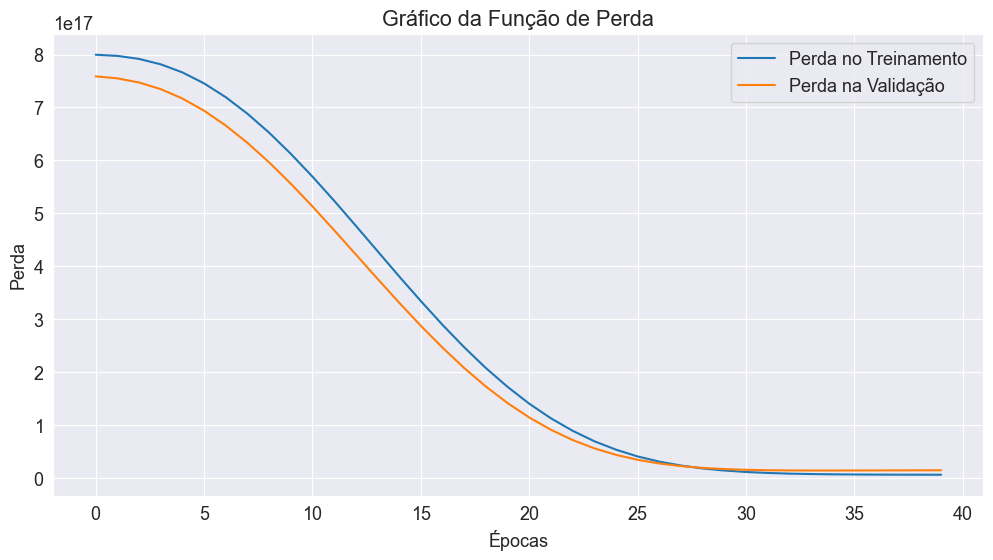

INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pr_am/assets


In [68]:
# TREINAMENTO LSTM KNN PR-AM (LR:10, 50 EPOCH)

# Defina o callback ModelCheckpoint como antes
model_LSTM = criar_modelo_LSTM()

cp_knn_pr_am = ModelCheckpoint('modelos_vazao/modelos_LSTM/treinado_knn_pr_am', save_best_only=True)

# Defina o callback EarlyStopping para monitorar a perda (loss) no conjunto de validação
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=10), metrics=[RootMeanSquaredError()])

# Adicione o callback EarlyStopping à lista de callbacks
history = model_LSTM.fit(X_train_pr_am_knn, y_train_pr_am_knn, validation_data=(X_val_pr_am_knn, y_val_pr_am_knn), epochs=50, callbacks=[cp_knn_pr_am, early_stopping])

# Acesse os registros de perda (loss) do treinamento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crie um gráfico da função de perda durante o treinamento
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Perda no Treinamento')
plt.plot(val_loss, label='Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Gráfico da Função de Perda')
plt.legend()
plt.show()

# model_LSTM.save('modelos_vazao/modelos_LSTM/treinado_knn_pr_am')

Epoch 1/50
14/14 [==============================] - ETA: 0s - loss: 817917766370590720.0000 - root_mean_squared_error: 904388032.0000 INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 3s 129ms/step - loss: 817917766370590720.0000 - root_mean_squared_error: 904388032.0000 - val_loss: 814876860805545984.0000 - val_root_mean_squared_error: 902705280.0000
Epoch 2/50
 1/14 [=>............................] - ETA: 0s - loss: 828664530459426816.0000 - root_mean_squared_error: 910310144.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 105ms/step - loss: 812662306948251648.0000 - root_mean_squared_error: 901477824.0000 - val_loss: 805368696565399552.0000 - val_root_mean_squared_error: 897423360.0000
Epoch 3/50
 1/14 [=>............................] - ETA: 0s - loss: 784186673775771648.0000 - root_mean_squared_error: 885543168.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 2s 124ms/step - loss: 799030012031270912.0000 - root_mean_squared_error: 893884800.0000 - val_loss: 786004372654915584.0000 - val_root_mean_squared_error: 886568896.0000
Epoch 4/50
 1/14 [=>............................] - ETA: 0s - loss: 784788931269885952.0000 - root_mean_squared_error: 885883136.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 96ms/step - loss: 774709983055970304.0000 - root_mean_squared_error: 880176128.0000 - val_loss: 755155306194927616.0000 - val_root_mean_squared_error: 868996736.0000
Epoch 5/50
 1/14 [=>............................] - ETA: 0s - loss: 760209348830953472.0000 - root_mean_squared_error: 871899840.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 91ms/step - loss: 738670259640205312.0000 - root_mean_squared_error: 859459264.0000 - val_loss: 712483534798848000.0000 - val_root_mean_squared_error: 844087424.0000
Epoch 6/50
 1/14 [=>............................] - ETA: 0s - loss: 690227632746266624.0000 - root_mean_squared_error: 830799424.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 91ms/step - loss: 691036460987449344.0000 - root_mean_squared_error: 831286016.0000 - val_loss: 658825374498553856.0000 - val_root_mean_squared_error: 811680576.0000
Epoch 7/50
 1/14 [=>............................] - ETA: 0s - loss: 660944064685801472.0000 - root_mean_squared_error: 812984640.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 2s 118ms/step - loss: 633114463314116608.0000 - root_mean_squared_error: 795684928.0000 - val_loss: 595844455106347008.0000 - val_root_mean_squared_error: 771909632.0000
Epoch 8/50
 1/14 [=>............................] - ETA: 0s - loss: 599244694815244288.0000 - root_mean_squared_error: 774108992.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 101ms/step - loss: 566930666550198272.0000 - root_mean_squared_error: 752947968.0000 - val_loss: 526021343573966848.0000 - val_root_mean_squared_error: 725273280.0000
Epoch 9/50
 1/14 [=>............................] - ETA: 0s - loss: 530509687477501952.0000 - root_mean_squared_error: 728360960.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 95ms/step - loss: 495083938226634752.0000 - root_mean_squared_error: 703622016.0000 - val_loss: 452288403052953600.0000 - val_root_mean_squared_error: 672523904.0000
Epoch 10/50
 1/14 [=>............................] - ETA: 0s - loss: 458169587670712320.0000 - root_mean_squared_error: 676882240.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 2s 129ms/step - loss: 420667685588697088.0000 - root_mean_squared_error: 648588992.0000 - val_loss: 377672039298760704.0000 - val_root_mean_squared_error: 614550272.0000
Epoch 11/50
 1/14 [=>............................] - ETA: 0s - loss: 372265981143154688.0000 - root_mean_squared_error: 610136064.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 94ms/step - loss: 346783046822789120.0000 - root_mean_squared_error: 588882880.0000 - val_loss: 305382448307372032.0000 - val_root_mean_squared_error: 552614208.0000
Epoch 12/50
 1/14 [=>............................] - ETA: 0s - loss: 304188413039345664.0000 - root_mean_squared_error: 551532800.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 96ms/step - loss: 276428390137856000.0000 - root_mean_squared_error: 525764576.0000 - val_loss: 238338833450532864.0000 - val_root_mean_squared_error: 488199584.0000
Epoch 13/50
 1/14 [=>............................] - ETA: 0s - loss: 242186179254943744.0000 - root_mean_squared_error: 492124160.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 93ms/step - loss: 212527591830061056.0000 - root_mean_squared_error: 461007136.0000 - val_loss: 178749752811192320.0000 - val_root_mean_squared_error: 422788064.0000
Epoch 14/50
 1/14 [=>............................] - ETA: 0s - loss: 177339972745953280.0000 - root_mean_squared_error: 421117536.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 2s 118ms/step - loss: 156865279530369024.0000 - root_mean_squared_error: 396062208.0000 - val_loss: 128378024176386048.0000 - val_root_mean_squared_error: 358298784.0000
Epoch 15/50
 1/14 [=>............................] - ETA: 0s - loss: 133283976340045824.0000 - root_mean_squared_error: 365080768.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 97ms/step - loss: 110891408428105728.0000 - root_mean_squared_error: 333003616.0000 - val_loss: 87925342123065344.0000 - val_root_mean_squared_error: 296522080.0000
Epoch 16/50
 1/14 [=>............................] - ETA: 0s - loss: 88318666638098432.0000 - root_mean_squared_error: 297184576.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 98ms/step - loss: 74840200269791232.0000 - root_mean_squared_error: 273569376.0000 - val_loss: 57489717804924928.0000 - val_root_mean_squared_error: 239770128.0000
Epoch 17/50
 1/14 [=>............................] - ETA: 0s - loss: 60245660879814656.0000 - root_mean_squared_error: 245449920.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 2s 123ms/step - loss: 48193548855541760.0000 - root_mean_squared_error: 219530288.0000 - val_loss: 35592449816526848.0000 - val_root_mean_squared_error: 188659616.0000
Epoch 18/50
 1/14 [=>............................] - ETA: 0s - loss: 35082985090842624.0000 - root_mean_squared_error: 187304528.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 96ms/step - loss: 29502912040271872.0000 - root_mean_squared_error: 171764112.0000 - val_loss: 20951700873412608.0000 - val_root_mean_squared_error: 144747024.0000
Epoch 19/50
 1/14 [=>............................] - ETA: 0s - loss: 20595310929641472.0000 - root_mean_squared_error: 143510672.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 90ms/step - loss: 17408030731665408.0000 - root_mean_squared_error: 131939496.0000 - val_loss: 11792995573563392.0000 - val_root_mean_squared_error: 108595560.0000
Epoch 20/50
 1/14 [=>............................] - ETA: 0s - loss: 11865180015165440.0000 - root_mean_squared_error: 108927408.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 91ms/step - loss: 10085431467048960.0000 - root_mean_squared_error: 100426248.0000 - val_loss: 6463903768772608.0000 - val_root_mean_squared_error: 80398408.0000
Epoch 21/50
 1/14 [=>............................] - ETA: 0s - loss: 8362638480244736.0000 - root_mean_squared_error: 91447464.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 2s 119ms/step - loss: 5943093886976000.0000 - root_mean_squared_error: 77091464.0000 - val_loss: 3553556351156224.0000 - val_root_mean_squared_error: 59611712.0000
Epoch 22/50
 1/14 [=>............................] - ETA: 0s - loss: 10842007136108544.0000 - root_mean_squared_error: 104124960.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 90ms/step - loss: 3706556776448000.0000 - root_mean_squared_error: 60881496.0000 - val_loss: 2102151476150272.0000 - val_root_mean_squared_error: 45849224.0000
Epoch 23/50
 1/14 [=>............................] - ETA: 0s - loss: 1606798268170240.0000 - root_mean_squared_error: 40084888.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 93ms/step - loss: 2654322538053632.0000 - root_mean_squared_error: 51520116.0000 - val_loss: 1401197109968896.0000 - val_root_mean_squared_error: 37432568.0000
Epoch 24/50
 1/14 [=>............................] - ETA: 0s - loss: 1997662572249088.0000 - root_mean_squared_error: 44695220.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 115ms/step - loss: 2144606288347136.0000 - root_mean_squared_error: 46309896.0000 - val_loss: 1125608050393088.0000 - val_root_mean_squared_error: 33550082.0000
Epoch 25/50
 1/14 [=>............................] - ETA: 0s - loss: 683186891784192.0000 - root_mean_squared_error: 26137844.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 94ms/step - loss: 1944642543157248.0000 - root_mean_squared_error: 44098100.0000 - val_loss: 986543586017280.0000 - val_root_mean_squared_error: 31409292.0000
Epoch 26/50
 1/14 [=>............................] - ETA: 0s - loss: 3255772309880832.0000 - root_mean_squared_error: 57059376.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 89ms/step - loss: 1838667580571648.0000 - root_mean_squared_error: 42879688.0000 - val_loss: 932533365637120.0000 - val_root_mean_squared_error: 30537410.0000
Epoch 27/50
 1/14 [=>............................] - ETA: 0s - loss: 781192005681152.0000 - root_mean_squared_error: 27949812.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 91ms/step - loss: 1804310258122752.0000 - root_mean_squared_error: 42477172.0000 - val_loss: 910610376163328.0000 - val_root_mean_squared_error: 30176322.0000
Epoch 28/50
 1/14 [=>............................] - ETA: 0s - loss: 5020039379943424.0000 - root_mean_squared_error: 70852240.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 2s 121ms/step - loss: 1787025833328640.0000 - root_mean_squared_error: 42273228.0000 - val_loss: 904803043508224.0000 - val_root_mean_squared_error: 30079944.0000
Epoch 29/50
 1/14 [=>............................] - ETA: 0s - loss: 876716239093760.0000 - root_mean_squared_error: 29609394.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 97ms/step - loss: 1786247773159424.0000 - root_mean_squared_error: 42264024.0000 - val_loss: 902559795511296.0000 - val_root_mean_squared_error: 30042632.0000
Epoch 30/50
 1/14 [=>............................] - ETA: 0s - loss: 252364577570816.0000 - root_mean_squared_error: 15885987.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 93ms/step - loss: 1784030093639680.0000 - root_mean_squared_error: 42237780.0000 - val_loss: 902477855588352.0000 - val_root_mean_squared_error: 30041270.0000
Epoch 31/50
14/14 [==============================] - 0s 3ms/step - loss: 1783696562585600.0000 - root_mean_squared_error: 42233832.0000 - val_loss: 902548051460096.0000 - val_root_mean_squared_error: 30042438.0000
Epoch 32/50
14/14 [==============================] - 0s 3ms/step - loss: 1784530994200576.0000 - root_mean_squared_error: 42243708.0000 - val_loss: 902521543458816.0000 - val_root_mean_squared_error: 30041996.0000
Epoch 33/50
14/14 [==============================] - 0s 3ms/step - loss: 1783908358160384.0000 - root_mean_squared_error: 42236340.0000 - val_loss: 902670726463488.0000 - val_root_mean_squared_error: 30044480.0000
Epoch 34/50
14/14 [==============================] - 0s 3ms/step - loss: 1783696696803328.0000 - root_mean_squared_error: 42233832.0000 - val_loss: 9026132

INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 91ms/step - loss: 1783281561370624.0000 - root_mean_squared_error: 42228920.0000 - val_loss: 902473896165376.0000 - val_root_mean_squared_error: 30041204.0000
Epoch 36/50
14/14 [==============================] - 0s 3ms/step - loss: 1784919688740864.0000 - root_mean_squared_error: 42248308.0000 - val_loss: 902594692120576.0000 - val_root_mean_squared_error: 30043214.0000
Epoch 37/50
14/14 [==============================] - 0s 3ms/step - loss: 1784403755794432.0000 - root_mean_squared_error: 42242204.0000 - val_loss: 902474634362880.0000 - val_root_mean_squared_error: 30041216.0000
Epoch 38/50
 1/14 [=>............................] - ETA: 0s - loss: 820548401627136.0000 - root_mean_squared_error: 28645216.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


14/14 [==============================] - 2s 117ms/step - loss: 1783796554792960.0000 - root_mean_squared_error: 42235016.0000 - val_loss: 902473292185600.0000 - val_root_mean_squared_error: 30041194.0000
Epoch 39/50
14/14 [==============================] - 0s 3ms/step - loss: 1785065851846656.0000 - root_mean_squared_error: 42250040.0000 - val_loss: 902948020289536.0000 - val_root_mean_squared_error: 30049094.0000
Epoch 40/50
14/14 [==============================] - 0s 3ms/step - loss: 1785055517081600.0000 - root_mean_squared_error: 42249916.0000 - val_loss: 902833801003008.0000 - val_root_mean_squared_error: 30047192.0000
Epoch 41/50
14/14 [==============================] - 0s 3ms/step - loss: 1784301750321152.0000 - root_mean_squared_error: 42240996.0000 - val_loss: 902717635559424.0000 - val_root_mean_squared_error: 30045260.0000
Epoch 42/50
14/14 [==============================] - 0s 3ms/step - loss: 1784073177530368.0000 - root_mean_squared_error: 42238292.0000 - val_loss: 902500

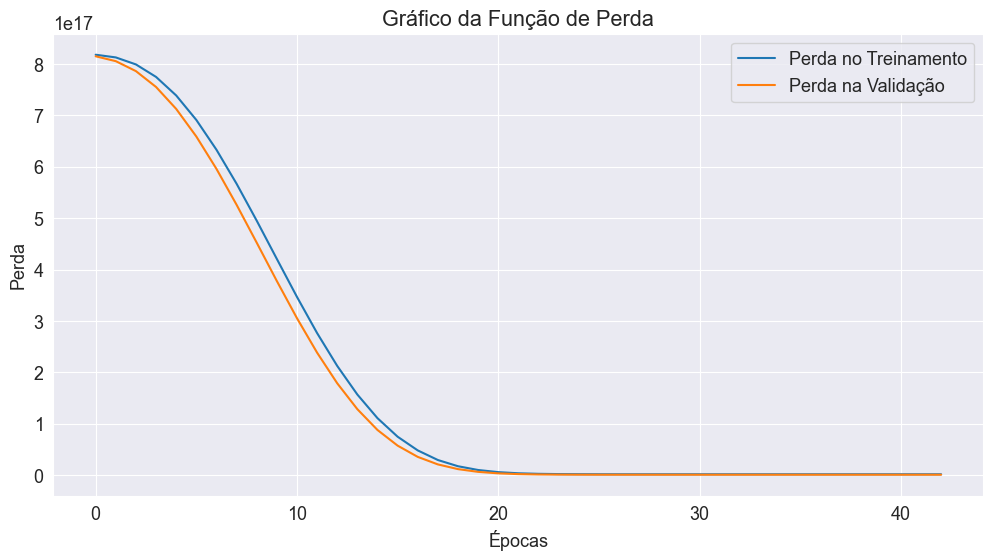

INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_knn_pa_ba/assets


In [69]:
# TREINAMENTO LSTM KNN PA-BA (LR:10, 50 EPOCH)

# Defina o callback ModelCheckpoint como antes
model_LSTM = criar_modelo_LSTM()

cp_knn_pa_ba = ModelCheckpoint('modelos_vazao/modelos_LSTM/treinado_knn_pa_ba', save_best_only=True)

# Defina o callback EarlyStopping para monitorar a perda (loss) no conjunto de validação
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=10), metrics=[RootMeanSquaredError()])

# Adicione o callback EarlyStopping à lista de callbacks
history = model_LSTM.fit(X_train_pa_ba_knn, y_train_pa_ba_knn, validation_data=(X_val_pa_ba_knn, y_val_pa_ba_knn), epochs=50, callbacks=[cp_knn_pa_ba, early_stopping])

# Acesse os registros de perda (loss) do treinamento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crie um gráfico da função de perda durante o treinamento
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Perda no Treinamento')
plt.plot(val_loss, label='Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Gráfico da Função de Perda')
plt.legend()
plt.show()

# model_LSTM.save('modelos_vazao/modelos_LSTM/treinado_knn_pa_ba')

Epoch 1/50
 1/14 [=>............................] - ETA: 12s - loss: 806203775646695424.0000 - root_mean_squared_error: 897888512.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 2s 98ms/step - loss: 818333794082750464.0000 - root_mean_squared_error: 904618048.0000 - val_loss: 816559732071333888.0000 - val_root_mean_squared_error: 903636928.0000
Epoch 2/50
 1/14 [=>............................] - ETA: 0s - loss: 821841373614309376.0000 - root_mean_squared_error: 906554688.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 83ms/step - loss: 816722116194861056.0000 - root_mean_squared_error: 903726784.0000 - val_loss: 813639910224297984.0000 - val_root_mean_squared_error: 902019904.0000
Epoch 3/50
14/14 [==============================] - ETA: 0s - loss: 812520744826175488.0000 - root_mean_squared_error: 901399296.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 2s 118ms/step - loss: 812520744826175488.0000 - root_mean_squared_error: 901399296.0000 - val_loss: 807653550447394816.0000 - val_root_mean_squared_error: 898695488.0000
Epoch 4/50
 1/14 [=>............................] - ETA: 0s - loss: 806753325302153216.0000 - root_mean_squared_error: 898194496.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 87ms/step - loss: 804957341777657856.0000 - root_mean_squared_error: 897194176.0000 - val_loss: 797983139522674688.0000 - val_root_mean_squared_error: 893299008.0000
Epoch 5/50
 1/14 [=>............................] - ETA: 0s - loss: 815053607299710976.0000 - root_mean_squared_error: 902803200.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 84ms/step - loss: 793553138454888448.0000 - root_mean_squared_error: 890816000.0000 - val_loss: 784306314384769024.0000 - val_root_mean_squared_error: 885610688.0000
Epoch 6/50
 1/14 [=>............................] - ETA: 0s - loss: 789647879311458304.0000 - root_mean_squared_error: 888621312.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 86ms/step - loss: 778078817963999232.0000 - root_mean_squared_error: 882087744.0000 - val_loss: 766537106968281088.0000 - val_root_mean_squared_error: 875521024.0000
Epoch 7/50
 1/14 [=>............................] - ETA: 0s - loss: 774158646694117376.0000 - root_mean_squared_error: 879862848.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 87ms/step - loss: 758535136219234304.0000 - root_mean_squared_error: 870939200.0000 - val_loss: 744766845457793024.0000 - val_root_mean_squared_error: 862998720.0000
Epoch 8/50
 1/14 [=>............................] - ETA: 0s - loss: 760413926713196544.0000 - root_mean_squared_error: 872017152.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 2s 119ms/step - loss: 735081591126097920.0000 - root_mean_squared_error: 857369024.0000 - val_loss: 719175918479736832.0000 - val_root_mean_squared_error: 848042432.0000
Epoch 9/50
 1/14 [=>............................] - ETA: 0s - loss: 731838650299449344.0000 - root_mean_squared_error: 855475712.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 85ms/step - loss: 707923310322647040.0000 - root_mean_squared_error: 841381760.0000 - val_loss: 690078374042796032.0000 - val_root_mean_squared_error: 830709568.0000
Epoch 10/50
 1/14 [=>............................] - ETA: 0s - loss: 685040136886419456.0000 - root_mean_squared_error: 827671488.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 88ms/step - loss: 677385543092273152.0000 - root_mean_squared_error: 823034368.0000 - val_loss: 657873128709423104.0000 - val_root_mean_squared_error: 811093760.0000
Epoch 11/50
 1/14 [=>............................] - ETA: 0s - loss: 665964709656133632.0000 - root_mean_squared_error: 816066624.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 110ms/step - loss: 643925067796840448.0000 - root_mean_squared_error: 802449408.0000 - val_loss: 622918966867656704.0000 - val_root_mean_squared_error: 789252160.0000
Epoch 12/50
 1/14 [=>............................] - ETA: 0s - loss: 632363909189206016.0000 - root_mean_squared_error: 795213120.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 86ms/step - loss: 607980383417401344.0000 - root_mean_squared_error: 779730944.0000 - val_loss: 585664145664245760.0000 - val_root_mean_squared_error: 765286976.0000
Epoch 13/50
 1/14 [=>............................] - ETA: 0s - loss: 596366173373726720.0000 - root_mean_squared_error: 772247488.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 88ms/step - loss: 569911030256238592.0000 - root_mean_squared_error: 754924544.0000 - val_loss: 546708139454496768.0000 - val_root_mean_squared_error: 739397120.0000
Epoch 14/50
 1/14 [=>............................] - ETA: 0s - loss: 542008448800260096.0000 - root_mean_squared_error: 736212224.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 86ms/step - loss: 530321602269675520.0000 - root_mean_squared_error: 728231808.0000 - val_loss: 506558475933843456.0000 - val_root_mean_squared_error: 711729216.0000
Epoch 15/50
 1/14 [=>............................] - ETA: 0s - loss: 507100466446860288.0000 - root_mean_squared_error: 712109888.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 115ms/step - loss: 489815044146593792.0000 - root_mean_squared_error: 699867904.0000 - val_loss: 465637264488136704.0000 - val_root_mean_squared_error: 682376192.0000
Epoch 16/50
 1/14 [=>............................] - ETA: 0s - loss: 470533321047146496.0000 - root_mean_squared_error: 685954304.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 89ms/step - loss: 448781545075900416.0000 - root_mean_squared_error: 669911616.0000 - val_loss: 424580744392736768.0000 - val_root_mean_squared_error: 651598592.0000
Epoch 17/50
 1/14 [=>............................] - ETA: 0s - loss: 425861744158572544.0000 - root_mean_squared_error: 652580864.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 85ms/step - loss: 407811714600402944.0000 - root_mean_squared_error: 638601344.0000 - val_loss: 383871017136685056.0000 - val_root_mean_squared_error: 619573248.0000
Epoch 18/50
 1/14 [=>............................] - ETA: 0s - loss: 386268811478695936.0000 - root_mean_squared_error: 621505280.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 86ms/step - loss: 367409472643006464.0000 - root_mean_squared_error: 606143104.0000 - val_loss: 343985064608006144.0000 - val_root_mean_squared_error: 586502400.0000
Epoch 19/50
 1/14 [=>............................] - ETA: 0s - loss: 349509801299935232.0000 - root_mean_squared_error: 591193536.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 2s 124ms/step - loss: 328060219227635712.0000 - root_mean_squared_error: 572765440.0000 - val_loss: 305400487170015232.0000 - val_root_mean_squared_error: 552630528.0000
Epoch 20/50
 1/14 [=>............................] - ETA: 0s - loss: 312538722815967232.0000 - root_mean_squared_error: 559051648.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 88ms/step - loss: 290167853078806528.0000 - root_mean_squared_error: 538672320.0000 - val_loss: 268611017083191296.0000 - val_root_mean_squared_error: 518276960.0000
Epoch 21/50
 1/14 [=>............................] - ETA: 0s - loss: 269922133159706624.0000 - root_mean_squared_error: 519540320.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 86ms/step - loss: 254254676579450880.0000 - root_mean_squared_error: 504236736.0000 - val_loss: 233800238429634560.0000 - val_root_mean_squared_error: 483528928.0000
Epoch 22/50
 1/14 [=>............................] - ETA: 0s - loss: 235964712968257536.0000 - root_mean_squared_error: 485761984.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 89ms/step - loss: 220442752700121088.0000 - root_mean_squared_error: 469513312.0000 - val_loss: 201402767539961856.0000 - val_root_mean_squared_error: 448779200.0000
Epoch 23/50
 1/14 [=>............................] - ETA: 0s - loss: 206144617593176064.0000 - root_mean_squared_error: 454031520.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 90ms/step - loss: 189126582776889344.0000 - root_mean_squared_error: 434886848.0000 - val_loss: 171609146343292928.0000 - val_root_mean_squared_error: 414257344.0000
Epoch 24/50
 1/14 [=>............................] - ETA: 0s - loss: 172545706911858688.0000 - root_mean_squared_error: 415386208.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 115ms/step - loss: 160535088566632448.0000 - root_mean_squared_error: 400668288.0000 - val_loss: 144519516297101312.0000 - val_root_mean_squared_error: 380157216.0000
Epoch 25/50
 1/14 [=>............................] - ETA: 0s - loss: 140968952732844032.0000 - root_mean_squared_error: 375458336.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 82ms/step - loss: 134665169102962688.0000 - root_mean_squared_error: 366967520.0000 - val_loss: 120310804284178432.0000 - val_root_mean_squared_error: 346858464.0000
Epoch 26/50
 1/14 [=>............................] - ETA: 0s - loss: 123273996710969344.0000 - root_mean_squared_error: 351103968.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 86ms/step - loss: 111711678462164992.0000 - root_mean_squared_error: 334232960.0000 - val_loss: 98926101987852288.0000 - val_root_mean_squared_error: 314525216.0000
Epoch 27/50
 1/14 [=>............................] - ETA: 0s - loss: 97542830460764160.0000 - root_mean_squared_error: 312318464.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 109ms/step - loss: 91562981854281728.0000 - root_mean_squared_error: 302593760.0000 - val_loss: 80396470611607552.0000 - val_root_mean_squared_error: 283542720.0000
Epoch 28/50
 1/14 [=>............................] - ETA: 0s - loss: 82910495358582784.0000 - root_mean_squared_error: 287941824.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 89ms/step - loss: 74164825252429824.0000 - root_mean_squared_error: 272332192.0000 - val_loss: 64480928130400256.0000 - val_root_mean_squared_error: 253930944.0000
Epoch 29/50
 1/14 [=>............................] - ETA: 0s - loss: 66090930981044224.0000 - root_mean_squared_error: 257081568.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 91ms/step - loss: 59345590353395712.0000 - root_mean_squared_error: 243609504.0000 - val_loss: 51047726422425600.0000 - val_root_mean_squared_error: 225937440.0000
Epoch 30/50
 1/14 [=>............................] - ETA: 0s - loss: 54703117253476352.0000 - root_mean_squared_error: 233886976.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 92ms/step - loss: 46968117376581632.0000 - root_mean_squared_error: 216721296.0000 - val_loss: 39953280436011008.0000 - val_root_mean_squared_error: 199883168.0000
Epoch 31/50
 1/14 [=>............................] - ETA: 0s - loss: 42329179034746880.0000 - root_mean_squared_error: 205740560.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 2s 129ms/step - loss: 36746357205106688.0000 - root_mean_squared_error: 191693392.0000 - val_loss: 30908259699261440.0000 - val_root_mean_squared_error: 175807456.0000
Epoch 32/50
 1/14 [=>............................] - ETA: 0s - loss: 33788099695738880.0000 - root_mean_squared_error: 183815392.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 92ms/step - loss: 28481869464993792.0000 - root_mean_squared_error: 168765728.0000 - val_loss: 23604109466664960.0000 - val_root_mean_squared_error: 153636288.0000
Epoch 33/50
 1/14 [=>............................] - ETA: 0s - loss: 24047878372589568.0000 - root_mean_squared_error: 155073776.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 90ms/step - loss: 21887486200381440.0000 - root_mean_squared_error: 147944192.0000 - val_loss: 17823902751260672.0000 - val_root_mean_squared_error: 133506192.0000
Epoch 34/50
 1/14 [=>............................] - ETA: 0s - loss: 18212155983659008.0000 - root_mean_squared_error: 134952416.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 91ms/step - loss: 16691431544455168.0000 - root_mean_squared_error: 129195320.0000 - val_loss: 13364083873021952.0000 - val_root_mean_squared_error: 115603128.0000
Epoch 35/50
 1/14 [=>............................] - ETA: 0s - loss: 13172157890691072.0000 - root_mean_squared_error: 114770024.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 112ms/step - loss: 12707078430785536.0000 - root_mean_squared_error: 112725680.0000 - val_loss: 9932683102650368.0000 - val_root_mean_squared_error: 99662848.0000
Epoch 36/50
 1/14 [=>............................] - ETA: 0s - loss: 10812309584740352.0000 - root_mean_squared_error: 103982256.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 79ms/step - loss: 9640308572684288.0000 - root_mean_squared_error: 98185072.0000 - val_loss: 7375924504821760.0000 - val_root_mean_squared_error: 85883200.0000
Epoch 37/50
 1/14 [=>............................] - ETA: 0s - loss: 13562652022276096.0000 - root_mean_squared_error: 116458800.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 80ms/step - loss: 7372937355067392.0000 - root_mean_squared_error: 85865808.0000 - val_loss: 5465395276283904.0000 - val_root_mean_squared_error: 73928312.0000
Epoch 38/50
 1/14 [=>............................] - ETA: 0s - loss: 5248606802018304.0000 - root_mean_squared_error: 72447272.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 83ms/step - loss: 5710542882734080.0000 - root_mean_squared_error: 75568136.0000 - val_loss: 4074051626598400.0000 - val_root_mean_squared_error: 63828300.0000
Epoch 39/50
 1/14 [=>............................] - ETA: 0s - loss: 4334902707224576.0000 - root_mean_squared_error: 65839980.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 109ms/step - loss: 4511550148706304.0000 - root_mean_squared_error: 67168072.0000 - val_loss: 3077335746084864.0000 - val_root_mean_squared_error: 55473740.0000
Epoch 40/50
 1/14 [=>............................] - ETA: 0s - loss: 3203221237530624.0000 - root_mean_squared_error: 56597008.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 85ms/step - loss: 3645134180712448.0000 - root_mean_squared_error: 60374948.0000 - val_loss: 2387888536813568.0000 - val_root_mean_squared_error: 48866028.0000
Epoch 41/50
 1/14 [=>............................] - ETA: 0s - loss: 2170150069469184.0000 - root_mean_squared_error: 46584868.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 88ms/step - loss: 3048317604855808.0000 - root_mean_squared_error: 55211572.0000 - val_loss: 1897099402674176.0000 - val_root_mean_squared_error: 43555704.0000
Epoch 42/50
 1/14 [=>............................] - ETA: 0s - loss: 5657155902373888.0000 - root_mean_squared_error: 75214064.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 81ms/step - loss: 2629560440979456.0000 - root_mean_squared_error: 51279240.0000 - val_loss: 1561000763457536.0000 - val_root_mean_squared_error: 39509504.0000
Epoch 43/50
13/14 [==========================>...] - ETA: 0s - loss: 2374115650437120.0000 - root_mean_squared_error: 48724896.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 84ms/step - loss: 2346372309188608.0000 - root_mean_squared_error: 48439368.0000 - val_loss: 1326286169440256.0000 - val_root_mean_squared_error: 36418212.0000
Epoch 44/50
 1/14 [=>............................] - ETA: 0s - loss: 857887236685824.0000 - root_mean_squared_error: 29289712.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 109ms/step - loss: 2144410598899712.0000 - root_mean_squared_error: 46307780.0000 - val_loss: 1176461872463872.0000 - val_root_mean_squared_error: 34299588.0000
Epoch 45/50
 1/14 [=>............................] - ETA: 0s - loss: 693975648305152.0000 - root_mean_squared_error: 26343418.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 82ms/step - loss: 2012202378723328.0000 - root_mean_squared_error: 44857580.0000 - val_loss: 1077891903258624.0000 - val_root_mean_squared_error: 32831264.0000
Epoch 46/50
 1/14 [=>............................] - ETA: 0s - loss: 3791923277987840.0000 - root_mean_squared_error: 61578596.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 86ms/step - loss: 1929435406139392.0000 - root_mean_squared_error: 43925340.0000 - val_loss: 1011694713176064.0000 - val_root_mean_squared_error: 31807148.0000
Epoch 47/50
 1/14 [=>............................] - ETA: 0s - loss: 1850088301264896.0000 - root_mean_squared_error: 43012652.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 105ms/step - loss: 1875359083528192.0000 - root_mean_squared_error: 43305416.0000 - val_loss: 971219880902656.0000 - val_root_mean_squared_error: 31164400.0000
Epoch 48/50
 1/14 [=>............................] - ETA: 0s - loss: 1069812130250752.0000 - root_mean_squared_error: 32707982.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 83ms/step - loss: 1840192965050368.0000 - root_mean_squared_error: 42897472.0000 - val_loss: 944548603756544.0000 - val_root_mean_squared_error: 30733510.0000
Epoch 49/50
 1/14 [=>............................] - ETA: 0s - loss: 1124234331947008.0000 - root_mean_squared_error: 33529604.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 80ms/step - loss: 1817836854968320.0000 - root_mean_squared_error: 42636100.0000 - val_loss: 926936150835200.0000 - val_root_mean_squared_error: 30445626.0000
Epoch 50/50
12/14 [========================>.....] - ETA: 0s - loss: 1959651977461760.0000 - root_mean_squared_error: 44267956.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


14/14 [==============================] - 1s 85ms/step - loss: 1804586880860160.0000 - root_mean_squared_error: 42480428.0000 - val_loss: 916687687778304.0000 - val_root_mean_squared_error: 30276850.0000


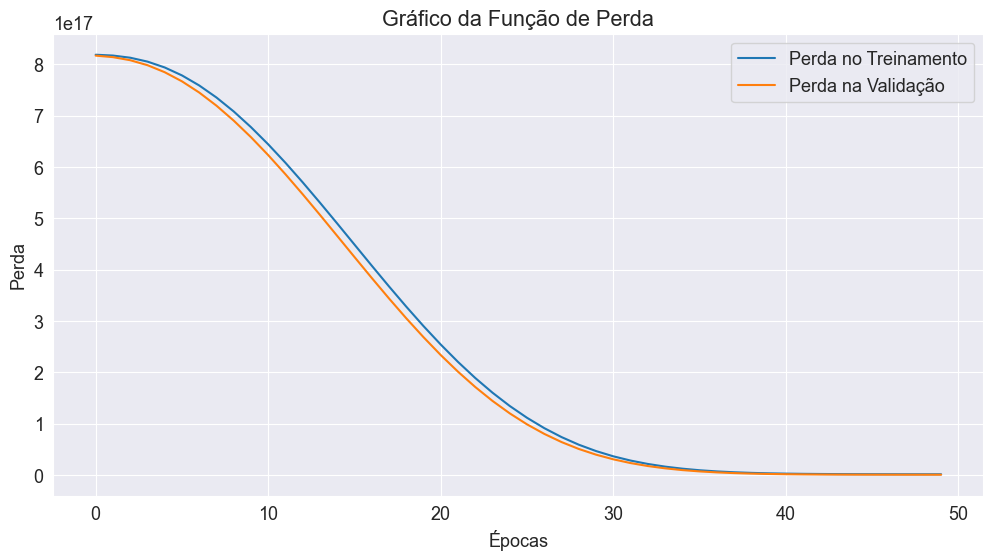

INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pa_ba/assets


In [72]:
# TREINAMENTO GRU KNN PA-BA (LR:10, 50 EPOCH)

# Defina o callback ModelCheckpoint como antes
model_GRU = criar_modelo_GRU()

cp_knn_gru_pa_ba = ModelCheckpoint('modelos_vazao/modelos_GRU/treinado_knn_pa_ba', save_best_only=True)

# Defina o callback EarlyStopping para monitorar a perda (loss) no conjunto de validação
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_GRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=10), metrics=[RootMeanSquaredError()])

# Adicione o callback EarlyStopping à lista de callbacks
history = model_GRU.fit(X_train_pa_ba_knn, y_train_pa_ba_knn, validation_data=(X_val_pa_ba_knn, y_val_pa_ba_knn), epochs=50, callbacks=[cp_knn_gru_pa_ba, early_stopping])

# Acesse os registros de perda (loss) do treinamento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crie um gráfico da função de perda durante o treinamento
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Perda no Treinamento')
plt.plot(val_loss, label='Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Gráfico da Função de Perda')
plt.legend()
plt.show()

# model_LSTM.save('modelos_vazao/modelos_GRU/treinado_knn_pa_ba')

Epoch 1/50
 1/13 [=>............................] - ETA: 12s - loss: 816752421484101632.0000 - root_mean_squared_error: 903743552.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


13/13 [==============================] - 2s 109ms/step - loss: 798905148742041600.0000 - root_mean_squared_error: 893814912.0000 - val_loss: 755777629776248832.0000 - val_root_mean_squared_error: 869354752.0000
Epoch 2/50
 1/13 [=>............................] - ETA: 0s - loss: 806860596405338112.0000 - root_mean_squared_error: 898254208.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 89ms/step - loss: 789737145911738368.0000 - root_mean_squared_error: 888671552.0000 - val_loss: 740021903028125696.0000 - val_root_mean_squared_error: 860245248.0000
Epoch 3/50
 1/13 [=>............................] - ETA: 0s - loss: 796732238887649280.0000 - root_mean_squared_error: 892598592.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 119ms/step - loss: 766449695793872896.0000 - root_mean_squared_error: 875471104.0000 - val_loss: 708364420643815424.0000 - val_root_mean_squared_error: 841643904.0000
Epoch 4/50
 1/13 [=>............................] - ETA: 0s - loss: 760799099380301824.0000 - root_mean_squared_error: 872237952.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 87ms/step - loss: 725487046503694336.0000 - root_mean_squared_error: 851755264.0000 - val_loss: 658735626861936640.0000 - val_root_mean_squared_error: 811625280.0000
Epoch 5/50
12/13 [==========================>...] - ETA: 0s - loss: 667890710430613504.0000 - root_mean_squared_error: 817245824.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 90ms/step - loss: 665954264295669760.0000 - root_mean_squared_error: 816060224.0000 - val_loss: 591663905739112448.0000 - val_root_mean_squared_error: 769196928.0000
Epoch 6/50
 1/13 [=>............................] - ETA: 0s - loss: 640802935810293760.0000 - root_mean_squared_error: 800501696.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 85ms/step - loss: 589437051095482368.0000 - root_mean_squared_error: 767748032.0000 - val_loss: 510365534945017856.0000 - val_root_mean_squared_error: 714398720.0000
Epoch 7/50
 1/13 [=>............................] - ETA: 0s - loss: 539469607732248576.0000 - root_mean_squared_error: 734485952.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 85ms/step - loss: 500314830436040704.0000 - root_mean_squared_error: 707329344.0000 - val_loss: 420093706159259648.0000 - val_root_mean_squared_error: 648146368.0000
Epoch 8/50
 1/13 [=>............................] - ETA: 0s - loss: 427719162895269888.0000 - root_mean_squared_error: 654002432.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 119ms/step - loss: 404377046433660928.0000 - root_mean_squared_error: 635906496.0000 - val_loss: 327583924534378496.0000 - val_root_mean_squared_error: 572349504.0000
Epoch 9/50
 1/13 [=>............................] - ETA: 0s - loss: 349178779580497920.0000 - root_mean_squared_error: 590913536.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 83ms/step - loss: 309182463572180992.0000 - root_mean_squared_error: 556041792.0000 - val_loss: 239810392325357568.0000 - val_root_mean_squared_error: 489704384.0000
Epoch 10/50
 1/13 [=>............................] - ETA: 0s - loss: 255234959915089920.0000 - root_mean_squared_error: 505207840.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 81ms/step - loss: 221390463003787264.0000 - root_mean_squared_error: 470521472.0000 - val_loss: 163423711771230208.0000 - val_root_mean_squared_error: 404256992.0000
Epoch 11/50
 1/13 [=>............................] - ETA: 0s - loss: 173253861119623168.0000 - root_mean_squared_error: 416237760.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 112ms/step - loss: 146733056542113792.0000 - root_mean_squared_error: 383057504.0000 - val_loss: 103406371352870912.0000 - val_root_mean_squared_error: 321568608.0000
Epoch 12/50
 1/13 [=>............................] - ETA: 0s - loss: 117800739497050112.0000 - root_mean_squared_error: 343221120.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 87ms/step - loss: 89737646523285504.0000 - root_mean_squared_error: 299562432.0000 - val_loss: 60781230416723968.0000 - val_root_mean_squared_error: 246538496.0000
Epoch 13/50
 1/13 [=>............................] - ETA: 0s - loss: 63472804816748544.0000 - root_mean_squared_error: 251938096.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 86ms/step - loss: 50458220686213120.0000 - root_mean_squared_error: 224629072.0000 - val_loss: 34455563383341056.0000 - val_root_mean_squared_error: 185622096.0000
Epoch 14/50
 1/13 [=>............................] - ETA: 0s - loss: 31672400953212928.0000 - root_mean_squared_error: 177967408.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 84ms/step - loss: 26649692251095040.0000 - root_mean_squared_error: 163247328.0000 - val_loss: 20985912435408896.0000 - val_root_mean_squared_error: 144865152.0000
Epoch 15/50
 1/13 [=>............................] - ETA: 0s - loss: 16147578089373696.0000 - root_mean_squared_error: 127073120.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 117ms/step - loss: 14192157862658048.0000 - root_mean_squared_error: 119130840.0000 - val_loss: 15523707246084096.0000 - val_root_mean_squared_error: 124594168.0000
Epoch 16/50
 1/13 [=>............................] - ETA: 0s - loss: 14721764911218688.0000 - root_mean_squared_error: 121333280.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


13/13 [==============================] - 1s 89ms/step - loss: 8676887278649344.0000 - root_mean_squared_error: 93149808.0000 - val_loss: 14076378429259776.0000 - val_root_mean_squared_error: 118643912.0000
Epoch 17/50
13/13 [==============================] - 0s 5ms/step - loss: 6752431081783296.0000 - root_mean_squared_error: 82173176.0000 - val_loss: 14119096173985792.0000 - val_root_mean_squared_error: 118823800.0000
Epoch 18/50
13/13 [==============================] - 0s 3ms/step - loss: 6147492991205376.0000 - root_mean_squared_error: 78405952.0000 - val_loss: 14437649603362816.0000 - val_root_mean_squared_error: 120156768.0000
Epoch 19/50
13/13 [==============================] - 0s 3ms/step - loss: 6011710821367808.0000 - root_mean_squared_error: 77535224.0000 - val_loss: 14650746553237504.0000 - val_root_mean_squared_error: 121040272.0000
Epoch 20/50
13/13 [==============================] - 0s 3ms/step - loss: 5995952586358784.0000 - root_mean_squared_error: 77433536.0000 - val_l

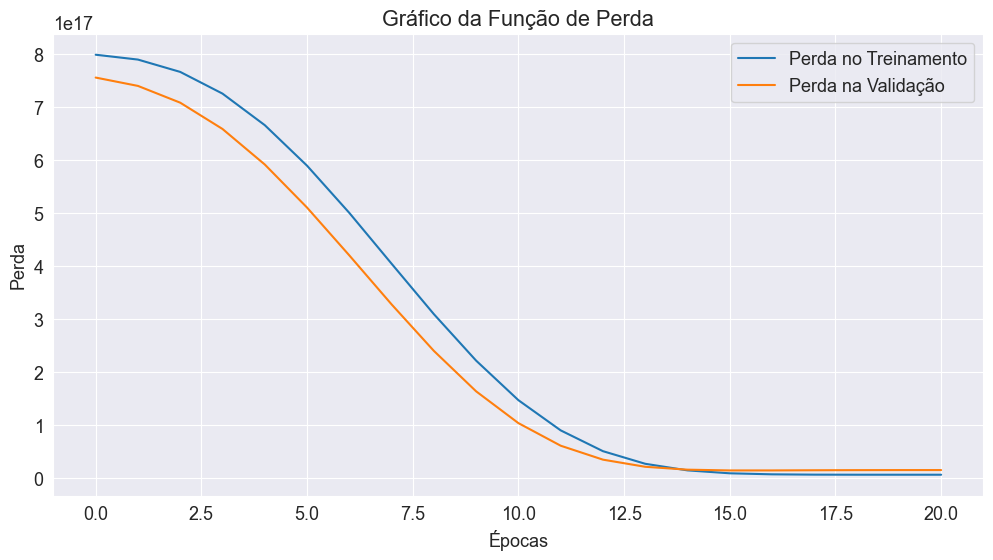

INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_knn_pr_am/assets


In [73]:
# TREINAMENTO GRU KNN PR-AM (LR:10, 50 EPOCH)

# Defina o callback ModelCheckpoint como antes
model_GRU = criar_modelo_GRU()

cp_knn_gru_pr_am = ModelCheckpoint('modelos_vazao/modelos_GRU/treinado_knn_pr_am', save_best_only=True)

# Defina o callback EarlyStopping para monitorar a perda (loss) no conjunto de validação
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_GRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=10), metrics=[RootMeanSquaredError()])

# Adicione o callback EarlyStopping à lista de callbacks
history = model_GRU.fit(X_train_pr_am_knn, y_train_pr_am_knn, validation_data=(X_val_pr_am_knn, y_val_pr_am_knn), epochs=50, callbacks=[cp_knn_gru_pr_am, early_stopping])

# Acesse os registros de perda (loss) do treinamento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crie um gráfico da função de perda durante o treinamento
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Perda no Treinamento')
plt.plot(val_loss, label='Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Gráfico da Função de Perda')
plt.legend()
plt.show()

# model_LSTM.save('modelos_vazao/modelos_GRU/treinado_knn_pr_am')

### Treinamento Interpolação Linear

Epoch 1/50
 1/13 [=>............................] - ETA: 10s - loss: 807816140729352192.0000 - root_mean_squared_error: 898785920.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 3s 147ms/step - loss: 803485095708065792.0000 - root_mean_squared_error: 896373312.0000 - val_loss: 746445799713406976.0000 - val_root_mean_squared_error: 863970944.0000
Epoch 2/50
 1/13 [=>............................] - ETA: 0s - loss: 806806308018716672.0000 - root_mean_squared_error: 898224000.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 103ms/step - loss: 802615656888401920.0000 - root_mean_squared_error: 895888192.0000 - val_loss: 744961390296432640.0000 - val_root_mean_squared_error: 863111488.0000
Epoch 3/50
 1/13 [=>............................] - ETA: 0s - loss: 802228147759087616.0000 - root_mean_squared_error: 895671872.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 101ms/step - loss: 800381174382854144.0000 - root_mean_squared_error: 894640256.0000 - val_loss: 741931136250281984.0000 - val_root_mean_squared_error: 861354240.0000
Epoch 4/50
 1/13 [=>............................] - ETA: 0s - loss: 785773956249419776.0000 - root_mean_squared_error: 886438912.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 101ms/step - loss: 796362184505425920.0000 - root_mean_squared_error: 892391296.0000 - val_loss: 737019205492146176.0000 - val_root_mean_squared_error: 858498240.0000
Epoch 5/50
 1/13 [=>............................] - ETA: 0s - loss: 781457342318247936.0000 - root_mean_squared_error: 884000768.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 2s 137ms/step - loss: 790252816865165312.0000 - root_mean_squared_error: 888961664.0000 - val_loss: 730034008120885248.0000 - val_root_mean_squared_error: 854420288.0000
Epoch 6/50
 1/13 [=>............................] - ETA: 0s - loss: 774103945990635520.0000 - root_mean_squared_error: 879831744.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 101ms/step - loss: 781927039941738496.0000 - root_mean_squared_error: 884266368.0000 - val_loss: 720855147613257728.0000 - val_root_mean_squared_error: 849031872.0000
Epoch 7/50
 1/13 [=>............................] - ETA: 0s - loss: 747948557230669824.0000 - root_mean_squared_error: 864840192.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 98ms/step - loss: 771293731708993536.0000 - root_mean_squared_error: 878233280.0000 - val_loss: 709480699823915008.0000 - val_root_mean_squared_error: 842306752.0000
Epoch 8/50
 1/13 [=>............................] - ETA: 0s - loss: 747283833732202496.0000 - root_mean_squared_error: 864455808.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 99ms/step - loss: 758408142626226176.0000 - root_mean_squared_error: 870866304.0000 - val_loss: 695924477367681024.0000 - val_root_mean_squared_error: 834220864.0000
Epoch 9/50
 1/13 [=>............................] - ETA: 0s - loss: 762856079477440512.0000 - root_mean_squared_error: 873416320.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 2s 130ms/step - loss: 743245258803904512.0000 - root_mean_squared_error: 862116736.0000 - val_loss: 680310656339017728.0000 - val_root_mean_squared_error: 824809472.0000
Epoch 10/50
 1/13 [=>............................] - ETA: 0s - loss: 758889797438668800.0000 - root_mean_squared_error: 871142784.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 102ms/step - loss: 725971518814683136.0000 - root_mean_squared_error: 852039616.0000 - val_loss: 662708299812044800.0000 - val_root_mean_squared_error: 814068992.0000
Epoch 11/50
 1/13 [=>............................] - ETA: 0s - loss: 713972273542856704.0000 - root_mean_squared_error: 844968832.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 98ms/step - loss: 706641554642567168.0000 - root_mean_squared_error: 840619776.0000 - val_loss: 643257045763489792.0000 - val_root_mean_squared_error: 802033088.0000
Epoch 12/50
 1/13 [=>............................] - ETA: 0s - loss: 694949829029134336.0000 - root_mean_squared_error: 833636480.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 99ms/step - loss: 685447162347126784.0000 - root_mean_squared_error: 827917376.0000 - val_loss: 622088423271825408.0000 - val_root_mean_squared_error: 788725824.0000
Epoch 13/50
 1/13 [=>............................] - ETA: 0s - loss: 696370123174313984.0000 - root_mean_squared_error: 834487936.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 2s 126ms/step - loss: 662517946861486080.0000 - root_mean_squared_error: 813952064.0000 - val_loss: 599388524680052736.0000 - val_root_mean_squared_error: 774201856.0000
Epoch 14/50
 1/13 [=>............................] - ETA: 0s - loss: 640004690368528384.0000 - root_mean_squared_error: 800002944.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 99ms/step - loss: 638024538646380544.0000 - root_mean_squared_error: 798764352.0000 - val_loss: 575358491896578048.0000 - val_root_mean_squared_error: 758523904.0000
Epoch 15/50
 1/13 [=>............................] - ETA: 0s - loss: 640908420207083520.0000 - root_mean_squared_error: 800567552.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 99ms/step - loss: 612194124291899392.0000 - root_mean_squared_error: 782428352.0000 - val_loss: 550144113291296768.0000 - val_root_mean_squared_error: 741716992.0000
Epoch 16/50
 1/13 [=>............................] - ETA: 0s - loss: 570772703775031296.0000 - root_mean_squared_error: 755494976.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 98ms/step - loss: 585156033853259776.0000 - root_mean_squared_error: 764954944.0000 - val_loss: 524031468045860864.0000 - val_root_mean_squared_error: 723900160.0000
Epoch 17/50
 1/13 [=>............................] - ETA: 0s - loss: 552398283926929408.0000 - root_mean_squared_error: 743235008.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 2s 128ms/step - loss: 557266990134198272.0000 - root_mean_squared_error: 746503168.0000 - val_loss: 497041687399366656.0000 - val_root_mean_squared_error: 705011840.0000
Epoch 18/50
 1/13 [=>............................] - ETA: 0s - loss: 519475057500618752.0000 - root_mean_squared_error: 720746176.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 98ms/step - loss: 528537816452300800.0000 - root_mean_squared_error: 727006080.0000 - val_loss: 469534139855405056.0000 - val_root_mean_squared_error: 685225600.0000
Epoch 19/50
 1/13 [=>............................] - ETA: 0s - loss: 512124650470244352.0000 - root_mean_squared_error: 715628864.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 97ms/step - loss: 499260226986311680.0000 - root_mean_squared_error: 706583488.0000 - val_loss: 441688801723547648.0000 - val_root_mean_squared_error: 664596736.0000
Epoch 20/50
 1/13 [=>............................] - ETA: 0s - loss: 493295891801702400.0000 - root_mean_squared_error: 702350272.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 2s 128ms/step - loss: 469760536171511808.0000 - root_mean_squared_error: 685390784.0000 - val_loss: 413607034231980032.0000 - val_root_mean_squared_error: 643122880.0000
Epoch 21/50
 1/13 [=>............................] - ETA: 0s - loss: 472922972131164160.0000 - root_mean_squared_error: 687693952.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 99ms/step - loss: 440035960869093376.0000 - root_mean_squared_error: 663352064.0000 - val_loss: 385683046658998272.0000 - val_root_mean_squared_error: 621033856.0000
Epoch 22/50
 1/13 [=>............................] - ETA: 0s - loss: 422300597794897920.0000 - root_mean_squared_error: 649846592.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 100ms/step - loss: 410418416151691264.0000 - root_mean_squared_error: 640639040.0000 - val_loss: 358081112913739776.0000 - val_root_mean_squared_error: 598398784.0000
Epoch 23/50
 1/13 [=>............................] - ETA: 0s - loss: 410259468002000896.0000 - root_mean_squared_error: 640515008.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 100ms/step - loss: 381159209145729024.0000 - root_mean_squared_error: 617380928.0000 - val_loss: 330827896153178112.0000 - val_root_mean_squared_error: 575176384.0000
Epoch 24/50
 1/13 [=>............................] - ETA: 0s - loss: 370080564343996416.0000 - root_mean_squared_error: 608342464.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 2s 135ms/step - loss: 352324894664425472.0000 - root_mean_squared_error: 593569600.0000 - val_loss: 304171473688330240.0000 - val_root_mean_squared_error: 551517440.0000
Epoch 25/50
 1/13 [=>............................] - ETA: 0s - loss: 348305320671444992.0000 - root_mean_squared_error: 590173952.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 102ms/step - loss: 324187052079841280.0000 - root_mean_squared_error: 569374272.0000 - val_loss: 278297714523897856.0000 - val_root_mean_squared_error: 527539296.0000
Epoch 26/50
 1/13 [=>............................] - ETA: 0s - loss: 307204339074596864.0000 - root_mean_squared_error: 554260160.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 97ms/step - loss: 296798629748801536.0000 - root_mean_squared_error: 544792256.0000 - val_loss: 253412897349173248.0000 - val_root_mean_squared_error: 503401344.0000
Epoch 27/50
 1/13 [=>............................] - ETA: 0s - loss: 282315450270875648.0000 - root_mean_squared_error: 531333664.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 97ms/step - loss: 270449108467056640.0000 - root_mean_squared_error: 520047232.0000 - val_loss: 229597441131806720.0000 - val_root_mean_squared_error: 479163264.0000
Epoch 28/50
 1/13 [=>............................] - ETA: 0s - loss: 264146673456906240.0000 - root_mean_squared_error: 513952000.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 2s 131ms/step - loss: 245261478918094848.0000 - root_mean_squared_error: 495238816.0000 - val_loss: 206933087689375744.0000 - val_root_mean_squared_error: 454898976.0000
Epoch 29/50
 1/13 [=>............................] - ETA: 0s - loss: 235731479064215552.0000 - root_mean_squared_error: 485521856.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 98ms/step - loss: 221149360719659008.0000 - root_mean_squared_error: 470265216.0000 - val_loss: 185679253046558720.0000 - val_root_mean_squared_error: 430905152.0000
Epoch 30/50
 1/13 [=>............................] - ETA: 0s - loss: 206361547801362432.0000 - root_mean_squared_error: 454270336.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 100ms/step - loss: 198481571303391232.0000 - root_mean_squared_error: 445512704.0000 - val_loss: 165761342211358720.0000 - val_root_mean_squared_error: 407137984.0000
Epoch 31/50
 1/13 [=>............................] - ETA: 0s - loss: 180631824660168704.0000 - root_mean_squared_error: 425008032.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 96ms/step - loss: 177334080050823168.0000 - root_mean_squared_error: 421110528.0000 - val_loss: 147158000606380032.0000 - val_root_mean_squared_error: 383611776.0000
Epoch 32/50
 1/13 [=>............................] - ETA: 0s - loss: 152523668889534464.0000 - root_mean_squared_error: 390542784.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 2s 130ms/step - loss: 157462881279934464.0000 - root_mean_squared_error: 396815936.0000 - val_loss: 130126651391475712.0000 - val_root_mean_squared_error: 360730720.0000
Epoch 33/50
 1/13 [=>............................] - ETA: 0s - loss: 150361170035867648.0000 - root_mean_squared_error: 387764320.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 98ms/step - loss: 139276057013387264.0000 - root_mean_squared_error: 373197088.0000 - val_loss: 114473316663689216.0000 - val_root_mean_squared_error: 338339040.0000
Epoch 34/50
 1/13 [=>............................] - ETA: 0s - loss: 132790656396427264.0000 - root_mean_squared_error: 364404512.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 99ms/step - loss: 122461904294641664.0000 - root_mean_squared_error: 349945568.0000 - val_loss: 100402952262385664.0000 - val_root_mean_squared_error: 316864256.0000
Epoch 35/50
 1/13 [=>............................] - ETA: 0s - loss: 121887014332137472.0000 - root_mean_squared_error: 349123200.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 98ms/step - loss: 107271068825157632.0000 - root_mean_squared_error: 327522624.0000 - val_loss: 87719037663969280.0000 - val_root_mean_squared_error: 296173984.0000
Epoch 36/50
 1/13 [=>............................] - ETA: 0s - loss: 99189658361004032.0000 - root_mean_squared_error: 314943904.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 2s 132ms/step - loss: 93443584824442880.0000 - root_mean_squared_error: 305685440.0000 - val_loss: 76497353271410688.0000 - val_root_mean_squared_error: 276581536.0000
Epoch 37/50
 1/13 [=>............................] - ETA: 0s - loss: 90153236148781056.0000 - root_mean_squared_error: 300255296.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 101ms/step - loss: 81174813174923264.0000 - root_mean_squared_error: 284911936.0000 - val_loss: 66545110887694336.0000 - val_root_mean_squared_error: 257963392.0000
Epoch 38/50
 1/13 [=>............................] - ETA: 0s - loss: 74914365765058560.0000 - root_mean_squared_error: 273704896.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 100ms/step - loss: 70201631295143936.0000 - root_mean_squared_error: 264955904.0000 - val_loss: 57884743127007232.0000 - val_root_mean_squared_error: 240592480.0000
Epoch 39/50
 1/13 [=>............................] - ETA: 0s - loss: 64895478373810176.0000 - root_mean_squared_error: 254745904.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 99ms/step - loss: 60476777364979712.0000 - root_mean_squared_error: 245920272.0000 - val_loss: 50474378353180672.0000 - val_root_mean_squared_error: 224665040.0000
Epoch 40/50
 1/13 [=>............................] - ETA: 0s - loss: 53696389804195840.0000 - root_mean_squared_error: 231724816.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 2s 125ms/step - loss: 52058688709459968.0000 - root_mean_squared_error: 228163728.0000 - val_loss: 44177161728294912.0000 - val_root_mean_squared_error: 210183632.0000
Epoch 41/50
 1/13 [=>............................] - ETA: 0s - loss: 44041208833507328.0000 - root_mean_squared_error: 209859968.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 96ms/step - loss: 44832401938972672.0000 - root_mean_squared_error: 211736640.0000 - val_loss: 38808736076136448.0000 - val_root_mean_squared_error: 196999328.0000
Epoch 42/50
 1/13 [=>............................] - ETA: 0s - loss: 38147092069220352.0000 - root_mean_squared_error: 195312800.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 101ms/step - loss: 38497831983513600.0000 - root_mean_squared_error: 196208640.0000 - val_loss: 34384181026881536.0000 - val_root_mean_squared_error: 185429712.0000
Epoch 43/50
 1/13 [=>............................] - ETA: 0s - loss: 33839506159304704.0000 - root_mean_squared_error: 183955168.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 2s 127ms/step - loss: 33213108801503232.0000 - root_mean_squared_error: 182244640.0000 - val_loss: 30686239954829312.0000 - val_root_mean_squared_error: 175174880.0000
Epoch 44/50
 1/13 [=>............................] - ETA: 0s - loss: 27787218634407936.0000 - root_mean_squared_error: 166694992.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 99ms/step - loss: 28647897868271616.0000 - root_mean_squared_error: 169256896.0000 - val_loss: 27731646052564992.0000 - val_root_mean_squared_error: 166528208.0000
Epoch 45/50
 1/13 [=>............................] - ETA: 0s - loss: 22462829281935360.0000 - root_mean_squared_error: 149876048.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 101ms/step - loss: 24973527576739840.0000 - root_mean_squared_error: 158030144.0000 - val_loss: 25314968886837248.0000 - val_root_mean_squared_error: 159106784.0000
Epoch 46/50
 1/13 [=>............................] - ETA: 0s - loss: 21204863425708032.0000 - root_mean_squared_error: 145618896.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 98ms/step - loss: 21712199995097088.0000 - root_mean_squared_error: 147350608.0000 - val_loss: 23554618558513152.0000 - val_root_mean_squared_error: 153475136.0000
Epoch 47/50
 1/13 [=>............................] - ETA: 0s - loss: 22044879571910656.0000 - root_mean_squared_error: 148475184.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 2s 144ms/step - loss: 19236782709145600.0000 - root_mean_squared_error: 138696736.0000 - val_loss: 22135917846200320.0000 - val_root_mean_squared_error: 148781440.0000
Epoch 48/50
 1/13 [=>............................] - ETA: 0s - loss: 17924105412018176.0000 - root_mean_squared_error: 133880936.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 107ms/step - loss: 17133642450993152.0000 - root_mean_squared_error: 130895544.0000 - val_loss: 21073864775696384.0000 - val_root_mean_squared_error: 145168400.0000
Epoch 49/50
 1/13 [=>............................] - ETA: 0s - loss: 10645837726089216.0000 - root_mean_squared_error: 103178672.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 106ms/step - loss: 15417241449267200.0000 - root_mean_squared_error: 124166184.0000 - val_loss: 20313812330610688.0000 - val_root_mean_squared_error: 142526528.0000
Epoch 50/50
 1/13 [=>............................] - ETA: 0s - loss: 39439456318521344.0000 - root_mean_squared_error: 198593696.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 113ms/step - loss: 14044752437575680.0000 - root_mean_squared_error: 118510560.0000 - val_loss: 19804077021986816.0000 - val_root_mean_squared_error: 140726960.0000


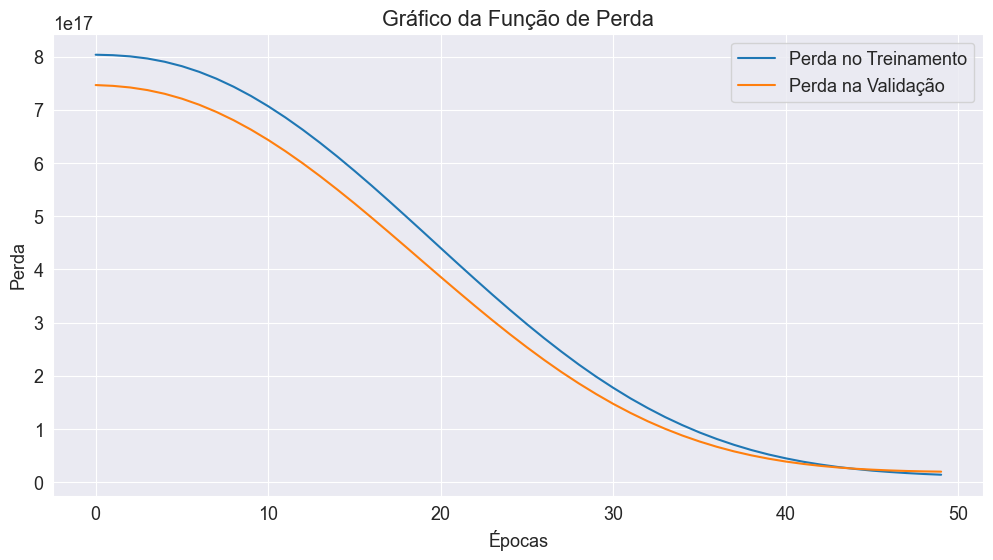

INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am/assets


In [74]:
# TREINAMENTO LSTM I.L. PR-AM (LR:10, 50 EPOCH)

# Defina o callback ModelCheckpoint como antes
model_LSTM = criar_modelo_LSTM()

cp_interpolacao_linear_pr_am = ModelCheckpoint('modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am', save_best_only=True)

# Defina o callback EarlyStopping para monitorar a perda (loss) no conjunto de validação
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=10), metrics=[RootMeanSquaredError()])

# Adicione o callback EarlyStopping à lista de callbacks
history = model_LSTM.fit(X_train_pr_am_interpolacao_linear, y_train_pr_am_interpolacao_linear, validation_data=(X_val_pr_am_interpolacao_linear, y_val_pr_am_interpolacao_linear), epochs=50, callbacks=[cp_interpolacao_linear_pr_am, early_stopping])

# Acesse os registros de perda (loss) do treinamento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crie um gráfico da função de perda durante o treinamento
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Perda no Treinamento')
plt.plot(val_loss, label='Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Gráfico da Função de Perda')
plt.legend()
plt.show()

# model_LSTM.save('modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am')

Epoch 1/50
 1/14 [=>............................] - ETA: 10s - loss: 824596337436655616.0000 - root_mean_squared_error: 908072896.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 109ms/step - loss: 817939550444716032.0000 - root_mean_squared_error: 904400128.0000 - val_loss: 818566615669932032.0000 - val_root_mean_squared_error: 904746688.0000
Epoch 2/50
 1/14 [=>............................] - ETA: 0s - loss: 826976505232883712.0000 - root_mean_squared_error: 909382464.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 93ms/step - loss: 815545020277850112.0000 - root_mean_squared_error: 903075328.0000 - val_loss: 814221826753298432.0000 - val_root_mean_squared_error: 902342400.0000
Epoch 3/50
 1/14 [=>............................] - ETA: 0s - loss: 830576718619082752.0000 - root_mean_squared_error: 911359808.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 118ms/step - loss: 809317592576557056.0000 - root_mean_squared_error: 899620800.0000 - val_loss: 805326640245637120.0000 - val_root_mean_squared_error: 897399936.0000
Epoch 4/50
 1/14 [=>............................] - ETA: 0s - loss: 808888439444340736.0000 - root_mean_squared_error: 899382272.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 95ms/step - loss: 798123464694169600.0000 - root_mean_squared_error: 893377536.0000 - val_loss: 790999522699378688.0000 - val_root_mean_squared_error: 889381568.0000
Epoch 5/50
 1/14 [=>............................] - ETA: 0s - loss: 781679100069675008.0000 - root_mean_squared_error: 884126208.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 93ms/step - loss: 781262453882224640.0000 - root_mean_squared_error: 883890496.0000 - val_loss: 770849116694511616.0000 - val_root_mean_squared_error: 877980160.0000
Epoch 6/50
 1/14 [=>............................] - ETA: 0s - loss: 780421671084359680.0000 - root_mean_squared_error: 883414784.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 93ms/step - loss: 758571351383474176.0000 - root_mean_squared_error: 870960000.0000 - val_loss: 744811375678717952.0000 - val_root_mean_squared_error: 863024576.0000
Epoch 7/50
 1/14 [=>............................] - ETA: 0s - loss: 733498912857391104.0000 - root_mean_squared_error: 856445504.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 121ms/step - loss: 730069055054020608.0000 - root_mean_squared_error: 854440768.0000 - val_loss: 713197049125797888.0000 - val_root_mean_squared_error: 844509952.0000
Epoch 8/50
 1/14 [=>............................] - ETA: 0s - loss: 722492114268585984.0000 - root_mean_squared_error: 849995392.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 96ms/step - loss: 696249039456305152.0000 - root_mean_squared_error: 834415360.0000 - val_loss: 676451645403430912.0000 - val_root_mean_squared_error: 822466816.0000
Epoch 9/50
 1/14 [=>............................] - ETA: 0s - loss: 676419965724655616.0000 - root_mean_squared_error: 822447552.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 97ms/step - loss: 657544512171671552.0000 - root_mean_squared_error: 810891200.0000 - val_loss: 635275553418510336.0000 - val_root_mean_squared_error: 797041728.0000
Epoch 10/50
 1/14 [=>............................] - ETA: 0s - loss: 640469783787077632.0000 - root_mean_squared_error: 800293568.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 95ms/step - loss: 614780931554672640.0000 - root_mean_squared_error: 784079680.0000 - val_loss: 590435270214549504.0000 - val_root_mean_squared_error: 768397888.0000
Epoch 11/50
 1/14 [=>............................] - ETA: 0s - loss: 592924427100880896.0000 - root_mean_squared_error: 770015872.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 125ms/step - loss: 568713009258561536.0000 - root_mean_squared_error: 754130624.0000 - val_loss: 542807450156269568.0000 - val_root_mean_squared_error: 736754688.0000
Epoch 12/50
 1/14 [=>............................] - ETA: 0s - loss: 510153363560595456.0000 - root_mean_squared_error: 714250240.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 92ms/step - loss: 520244337682939904.0000 - root_mean_squared_error: 721279680.0000 - val_loss: 493377977216663552.0000 - val_root_mean_squared_error: 702408704.0000
Epoch 13/50
 1/14 [=>............................] - ETA: 0s - loss: 496865387581800448.0000 - root_mean_squared_error: 704886784.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 93ms/step - loss: 470474256656891904.0000 - root_mean_squared_error: 685911232.0000 - val_loss: 443033367005364224.0000 - val_root_mean_squared_error: 665607488.0000
Epoch 14/50
 1/14 [=>............................] - ETA: 0s - loss: 437414450270568448.0000 - root_mean_squared_error: 661373184.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 120ms/step - loss: 420292099288596480.0000 - root_mean_squared_error: 648299392.0000 - val_loss: 392767852911788032.0000 - val_root_mean_squared_error: 626711936.0000
Epoch 15/50
 1/14 [=>............................] - ETA: 0s - loss: 384369336422236160.0000 - root_mean_squared_error: 619975296.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 94ms/step - loss: 370446736075784192.0000 - root_mean_squared_error: 608643328.0000 - val_loss: 343661224073887744.0000 - val_root_mean_squared_error: 586226240.0000
Epoch 16/50
 1/14 [=>............................] - ETA: 0s - loss: 350256300975718400.0000 - root_mean_squared_error: 591824576.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 96ms/step - loss: 322222602758127616.0000 - root_mean_squared_error: 567646528.0000 - val_loss: 296345493519204352.0000 - val_root_mean_squared_error: 544376256.0000
Epoch 17/50
 1/14 [=>............................] - ETA: 0s - loss: 303125047856332800.0000 - root_mean_squared_error: 550567936.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 93ms/step - loss: 276094602459480064.0000 - root_mean_squared_error: 525447040.0000 - val_loss: 251827315682574336.0000 - val_root_mean_squared_error: 501824000.0000
Epoch 18/50
 1/14 [=>............................] - ETA: 0s - loss: 256188064697679872.0000 - root_mean_squared_error: 506150240.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 129ms/step - loss: 233158106459144192.0000 - root_mean_squared_error: 482864480.0000 - val_loss: 210493168901160960.0000 - val_root_mean_squared_error: 458795360.0000
Epoch 19/50
 1/14 [=>............................] - ETA: 0s - loss: 214148787365478400.0000 - root_mean_squared_error: 462762144.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 93ms/step - loss: 193561995503468544.0000 - root_mean_squared_error: 439956800.0000 - val_loss: 173080430340210688.0000 - val_root_mean_squared_error: 416029376.0000
Epoch 20/50
 1/14 [=>............................] - ETA: 0s - loss: 176131849985196032.0000 - root_mean_squared_error: 419680640.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 92ms/step - loss: 158154525633413120.0000 - root_mean_squared_error: 397686464.0000 - val_loss: 139795833955549184.0000 - val_root_mean_squared_error: 373892800.0000
Epoch 21/50
 1/14 [=>............................] - ETA: 0s - loss: 142652390934315008.0000 - root_mean_squared_error: 377693504.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 90ms/step - loss: 126877336833359872.0000 - root_mean_squared_error: 356198464.0000 - val_loss: 111014253082705920.0000 - val_root_mean_squared_error: 333188000.0000
Epoch 22/50
 1/14 [=>............................] - ETA: 0s - loss: 115349094855081984.0000 - root_mean_squared_error: 339630816.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 120ms/step - loss: 100072437349089280.0000 - root_mean_squared_error: 316342272.0000 - val_loss: 86407741198827520.0000 - val_root_mean_squared_error: 293951936.0000
Epoch 23/50
 1/14 [=>............................] - ETA: 0s - loss: 84506814443421696.0000 - root_mean_squared_error: 290700544.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 90ms/step - loss: 77410566397755392.0000 - root_mean_squared_error: 278227552.0000 - val_loss: 66017916537012224.0000 - val_root_mean_squared_error: 256939520.0000
Epoch 24/50
 1/14 [=>............................] - ETA: 0s - loss: 64268434623430656.0000 - root_mean_squared_error: 253512192.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 97ms/step - loss: 58804961345011712.0000 - root_mean_squared_error: 242497344.0000 - val_loss: 49441103711043584.0000 - val_root_mean_squared_error: 222353552.0000
Epoch 25/50
 1/14 [=>............................] - ETA: 0s - loss: 47692772848697344.0000 - root_mean_squared_error: 218386752.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 93ms/step - loss: 43921314821439488.0000 - root_mean_squared_error: 209574128.0000 - val_loss: 36321417435807744.0000 - val_root_mean_squared_error: 190581792.0000
Epoch 26/50
 1/14 [=>............................] - ETA: 0s - loss: 39270681283657728.0000 - root_mean_squared_error: 198168320.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 121ms/step - loss: 32177890686664704.0000 - root_mean_squared_error: 179381968.0000 - val_loss: 26234302341578752.0000 - val_root_mean_squared_error: 161970064.0000
Epoch 27/50
 1/14 [=>............................] - ETA: 0s - loss: 29536930328739840.0000 - root_mean_squared_error: 171863120.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 91ms/step - loss: 23354254039187456.0000 - root_mean_squared_error: 152820992.0000 - val_loss: 18584570450411520.0000 - val_root_mean_squared_error: 136325232.0000
Epoch 28/50
 1/14 [=>............................] - ETA: 0s - loss: 19435882360602624.0000 - root_mean_squared_error: 139412640.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 93ms/step - loss: 16692749025673216.0000 - root_mean_squared_error: 129200424.0000 - val_loss: 13064314483113984.0000 - val_root_mean_squared_error: 114299232.0000
Epoch 29/50
 1/14 [=>............................] - ETA: 0s - loss: 16786488834392064.0000 - root_mean_squared_error: 129562680.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 93ms/step - loss: 11935462859997184.0000 - root_mean_squared_error: 109249544.0000 - val_loss: 9100271196045312.0000 - val_root_mean_squared_error: 95395344.0000
Epoch 30/50
 1/14 [=>............................] - ETA: 0s - loss: 9315879628046336.0000 - root_mean_squared_error: 96518808.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 121ms/step - loss: 8611374531870720.0000 - root_mean_squared_error: 92797496.0000 - val_loss: 6378736714776576.0000 - val_root_mean_squared_error: 79866992.0000
Epoch 31/50
 1/14 [=>............................] - ETA: 0s - loss: 8247442625527808.0000 - root_mean_squared_error: 90815432.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 92ms/step - loss: 6340727864819712.0000 - root_mean_squared_error: 79628688.0000 - val_loss: 4474233862225920.0000 - val_root_mean_squared_error: 66889716.0000
Epoch 32/50
 1/14 [=>............................] - ETA: 0s - loss: 6805894834683904.0000 - root_mean_squared_error: 82497848.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 92ms/step - loss: 4778235942404096.0000 - root_mean_squared_error: 69124784.0000 - val_loss: 3219400647770112.0000 - val_root_mean_squared_error: 56739764.0000
Epoch 33/50
 1/14 [=>............................] - ETA: 0s - loss: 3150544805822464.0000 - root_mean_squared_error: 56129716.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 90ms/step - loss: 3757741780762624.0000 - root_mean_squared_error: 61300424.0000 - val_loss: 2435664142401536.0000 - val_root_mean_squared_error: 49352448.0000
Epoch 34/50
 1/14 [=>............................] - ETA: 0s - loss: 2241568396279808.0000 - root_mean_squared_error: 47345204.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 116ms/step - loss: 3121372851077120.0000 - root_mean_squared_error: 55869248.0000 - val_loss: 1922118795132928.0000 - val_root_mean_squared_error: 43841976.0000
Epoch 35/50
 1/14 [=>............................] - ETA: 0s - loss: 1950684756836352.0000 - root_mean_squared_error: 44166556.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 92ms/step - loss: 2726164724449280.0000 - root_mean_squared_error: 52212688.0000 - val_loss: 1589020593225728.0000 - val_root_mean_squared_error: 39862520.0000
Epoch 36/50
 1/14 [=>............................] - ETA: 0s - loss: 967252404862976.0000 - root_mean_squared_error: 31100682.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 103ms/step - loss: 2479574277423104.0000 - root_mean_squared_error: 49795324.0000 - val_loss: 1382352404086784.0000 - val_root_mean_squared_error: 37180000.0000
Epoch 37/50
 1/14 [=>............................] - ETA: 0s - loss: 951445784363008.0000 - root_mean_squared_error: 30845514.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 143ms/step - loss: 2321342313529344.0000 - root_mean_squared_error: 48180312.0000 - val_loss: 1262524158705664.0000 - val_root_mean_squared_error: 35532016.0000
Epoch 38/50
 1/14 [=>............................] - ETA: 0s - loss: 1278358092513280.0000 - root_mean_squared_error: 35754132.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 97ms/step - loss: 2237864658075648.0000 - root_mean_squared_error: 47306076.0000 - val_loss: 1190976043352064.0000 - val_root_mean_squared_error: 34510520.0000
Epoch 39/50
 1/14 [=>............................] - ETA: 0s - loss: 891909618794496.0000 - root_mean_squared_error: 29864856.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 102ms/step - loss: 2188437100691456.0000 - root_mean_squared_error: 46780736.0000 - val_loss: 1151592132771840.0000 - val_root_mean_squared_error: 33935116.0000
Epoch 40/50
 1/14 [=>............................] - ETA: 0s - loss: 1096668762079232.0000 - root_mean_squared_error: 33115990.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 101ms/step - loss: 2164442594803712.0000 - root_mean_squared_error: 46523572.0000 - val_loss: 1133664402407424.0000 - val_root_mean_squared_error: 33669932.0000
Epoch 41/50
 1/14 [=>............................] - ETA: 0s - loss: 417486725971968.0000 - root_mean_squared_error: 20432492.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 141ms/step - loss: 2150325171519488.0000 - root_mean_squared_error: 46371600.0000 - val_loss: 1117073145069568.0000 - val_root_mean_squared_error: 33422644.0000
Epoch 42/50
 1/14 [=>............................] - ETA: 0s - loss: 1592438045016064.0000 - root_mean_squared_error: 39905364.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 102ms/step - loss: 2138861098500096.0000 - root_mean_squared_error: 46247824.0000 - val_loss: 1106027160272896.0000 - val_root_mean_squared_error: 33256986.0000
Epoch 43/50
 1/14 [=>............................] - ETA: 0s - loss: 510634466738176.0000 - root_mean_squared_error: 22597222.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 95ms/step - loss: 2131104387563520.0000 - root_mean_squared_error: 46163888.0000 - val_loss: 1098749136863232.0000 - val_root_mean_squared_error: 33147386.0000
Epoch 44/50
 1/14 [=>............................] - ETA: 0s - loss: 4625347991568384.0000 - root_mean_squared_error: 68009912.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 90ms/step - loss: 2127073829191680.0000 - root_mean_squared_error: 46120212.0000 - val_loss: 1095372353044480.0000 - val_root_mean_squared_error: 33096410.0000
Epoch 45/50
 1/14 [=>............................] - ETA: 0s - loss: 239341280428032.0000 - root_mean_squared_error: 15470659.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 134ms/step - loss: 2126605409320960.0000 - root_mean_squared_error: 46115132.0000 - val_loss: 1090941221863424.0000 - val_root_mean_squared_error: 33029400.0000
Epoch 46/50
 1/14 [=>............................] - ETA: 0s - loss: 9936039619592192.0000 - root_mean_squared_error: 99679688.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 105ms/step - loss: 2124061983375360.0000 - root_mean_squared_error: 46087548.0000 - val_loss: 1089522607587328.0000 - val_root_mean_squared_error: 33007918.0000
Epoch 47/50
 1/14 [=>............................] - ETA: 0s - loss: 461246067376128.0000 - root_mean_squared_error: 21476640.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 101ms/step - loss: 2126002369069056.0000 - root_mean_squared_error: 46108592.0000 - val_loss: 1087887433007104.0000 - val_root_mean_squared_error: 32983138.0000
Epoch 48/50
 1/14 [=>............................] - ETA: 0s - loss: 873453540343808.0000 - root_mean_squared_error: 29554248.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 103ms/step - loss: 2123985210834944.0000 - root_mean_squared_error: 46086716.0000 - val_loss: 1087756436504576.0000 - val_root_mean_squared_error: 32981152.0000
Epoch 49/50
14/14 [==============================] - 0s 4ms/step - loss: 2124614826196992.0000 - root_mean_squared_error: 46093544.0000 - val_loss: 1087878440419328.0000 - val_root_mean_squared_error: 32983002.0000
Epoch 50/50
14/14 [==============================] - 0s 3ms/step - loss: 2123990982197248.0000 - root_mean_squared_error: 46086776.0000 - val_loss: 1087956756463616.0000 - val_root_mean_squared_error: 32984190.0000


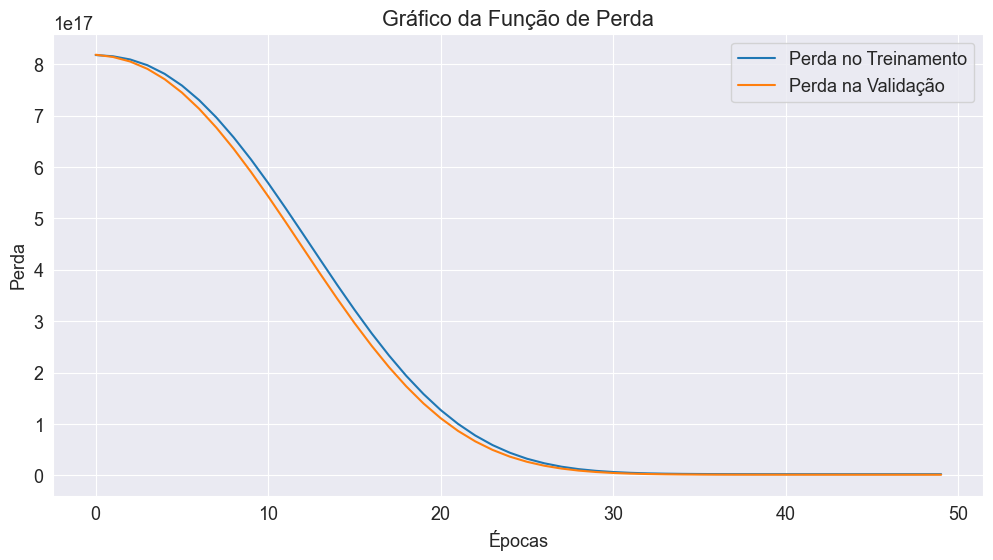

INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba/assets


In [75]:
# TREINAMENTO LSTM I.L. PA-BA (LR:10, 50 EPOCH)

# Defina o callback ModelCheckpoint como antes
model_LSTM = criar_modelo_LSTM()

cp_interpolacao_linear_pa_ba = ModelCheckpoint('modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba', save_best_only=True)

# Defina o callback EarlyStopping para monitorar a perda (loss) no conjunto de validação
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=10), metrics=[RootMeanSquaredError()])

# Adicione o callback EarlyStopping à lista de callbacks
history = model_LSTM.fit(X_train_pa_ba_interpolacao_linear, y_train_pa_ba_interpolacao_linear, validation_data=(X_val_pa_ba_interpolacao_linear, y_val_pa_ba_interpolacao_linear), epochs=50, callbacks=[cp_interpolacao_linear_pa_ba, early_stopping])

# Acesse os registros de perda (loss) do treinamento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crie um gráfico da função de perda durante o treinamento
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Perda no Treinamento')
plt.plot(val_loss, label='Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Gráfico da Função de Perda')
plt.legend()
plt.show()

# model_LSTM.save('modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba')

Epoch 1/50
 1/13 [=>............................] - ETA: 10s - loss: 783256899255533568.0000 - root_mean_squared_error: 885018048.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 2s 107ms/step - loss: 802998424373821440.0000 - root_mean_squared_error: 896101824.0000 - val_loss: 744644249911296000.0000 - val_root_mean_squared_error: 862927744.0000
Epoch 2/50
 1/13 [=>............................] - ETA: 0s - loss: 803565841093230592.0000 - root_mean_squared_error: 896418368.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 95ms/step - loss: 798034816569180160.0000 - root_mean_squared_error: 893327936.0000 - val_loss: 736219860538753024.0000 - val_root_mean_squared_error: 858032576.0000
Epoch 3/50
 1/13 [=>............................] - ETA: 0s - loss: 799439786271047680.0000 - root_mean_squared_error: 894113984.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 94ms/step - loss: 785387821509640192.0000 - root_mean_squared_error: 886221120.0000 - val_loss: 719164992082935808.0000 - val_root_mean_squared_error: 848035968.0000
Epoch 4/50
 1/13 [=>............................] - ETA: 0s - loss: 797277321777119232.0000 - root_mean_squared_error: 892903872.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 2s 135ms/step - loss: 762849482407673856.0000 - root_mean_squared_error: 873412544.0000 - val_loss: 691979704525127680.0000 - val_root_mean_squared_error: 831853184.0000
Epoch 5/50
 1/13 [=>............................] - ETA: 0s - loss: 725809065971679232.0000 - root_mean_squared_error: 851944256.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 95ms/step - loss: 729427215141306368.0000 - root_mean_squared_error: 854065088.0000 - val_loss: 654211548830498816.0000 - val_root_mean_squared_error: 808833472.0000
Epoch 6/50
 1/13 [=>............................] - ETA: 0s - loss: 713918947228909568.0000 - root_mean_squared_error: 844937216.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 94ms/step - loss: 685264987014299648.0000 - root_mean_squared_error: 827807360.0000 - val_loss: 606454467436478464.0000 - val_root_mean_squared_error: 778751872.0000
Epoch 7/50
 1/13 [=>............................] - ETA: 0s - loss: 604654154584948736.0000 - root_mean_squared_error: 777595136.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 93ms/step - loss: 630732302653063168.0000 - root_mean_squared_error: 794186560.0000 - val_loss: 550386143288360960.0000 - val_root_mean_squared_error: 741880128.0000
Epoch 8/50
 1/13 [=>............................] - ETA: 0s - loss: 591849998082113536.0000 - root_mean_squared_error: 769317888.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 2s 142ms/step - loss: 568634772134297600.0000 - root_mean_squared_error: 754078784.0000 - val_loss: 487600936965898240.0000 - val_root_mean_squared_error: 698284288.0000
Epoch 9/50
 1/13 [=>............................] - ETA: 0s - loss: 544192800447528960.0000 - root_mean_squared_error: 737694272.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 96ms/step - loss: 500332731859730432.0000 - root_mean_squared_error: 707342016.0000 - val_loss: 421108074355359744.0000 - val_root_mean_squared_error: 648928384.0000
Epoch 10/50
 1/13 [=>............................] - ETA: 0s - loss: 473397514477764608.0000 - root_mean_squared_error: 688038912.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 94ms/step - loss: 429312080366010368.0000 - root_mean_squared_error: 655219136.0000 - val_loss: 353617885978951680.0000 - val_root_mean_squared_error: 594657792.0000
Epoch 11/50
 1/13 [=>............................] - ETA: 0s - loss: 373688233793421312.0000 - root_mean_squared_error: 611300416.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 90ms/step - loss: 357757444178313216.0000 - root_mean_squared_error: 598128256.0000 - val_loss: 288188629069594624.0000 - val_root_mean_squared_error: 536832032.0000
Epoch 12/50
10/13 [======================>.......] - ETA: 0s - loss: 296781518599094272.0000 - root_mean_squared_error: 544776576.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 94ms/step - loss: 289611706353582080.0000 - root_mean_squared_error: 538155840.0000 - val_loss: 226971652745854976.0000 - val_root_mean_squared_error: 476415424.0000
Epoch 13/50
10/13 [======================>.......] - ETA: 0s - loss: 233048172476235776.0000 - root_mean_squared_error: 482750624.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 2s 125ms/step - loss: 226538685682679808.0000 - root_mean_squared_error: 475960800.0000 - val_loss: 172831494035734528.0000 - val_root_mean_squared_error: 415730080.0000
Epoch 14/50
 1/13 [=>............................] - ETA: 0s - loss: 189941355252809728.0000 - root_mean_squared_error: 435822624.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 97ms/step - loss: 170903929893158912.0000 - root_mean_squared_error: 413405280.0000 - val_loss: 127113414005751808.0000 - val_root_mean_squared_error: 356529696.0000
Epoch 15/50
 1/13 [=>............................] - ETA: 0s - loss: 147553120417742848.0000 - root_mean_squared_error: 384126432.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 96ms/step - loss: 124547480284037120.0000 - root_mean_squared_error: 352912864.0000 - val_loss: 90398186723606528.0000 - val_root_mean_squared_error: 300662912.0000
Epoch 16/50
 1/13 [=>............................] - ETA: 0s - loss: 104495961606193152.0000 - root_mean_squared_error: 323258336.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 97ms/step - loss: 87654544435052544.0000 - root_mean_squared_error: 296065088.0000 - val_loss: 62799925175386112.0000 - val_root_mean_squared_error: 250599136.0000
Epoch 17/50
 1/13 [=>............................] - ETA: 0s - loss: 61732930745008128.0000 - root_mean_squared_error: 248461120.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 2s 127ms/step - loss: 59423917671972864.0000 - root_mean_squared_error: 243770208.0000 - val_loss: 43857689175916544.0000 - val_root_mean_squared_error: 209422272.0000
Epoch 18/50
 1/13 [=>............................] - ETA: 0s - loss: 44892239423340544.0000 - root_mean_squared_error: 211877888.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 97ms/step - loss: 39856605017145344.0000 - root_mean_squared_error: 199641184.0000 - val_loss: 31547179034214400.0000 - val_root_mean_squared_error: 177615248.0000
Epoch 19/50
 1/13 [=>............................] - ETA: 0s - loss: 36120868232888320.0000 - root_mean_squared_error: 190054912.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 94ms/step - loss: 26829443074883584.0000 - root_mean_squared_error: 163796960.0000 - val_loss: 24397022706532352.0000 - val_root_mean_squared_error: 156195456.0000
Epoch 20/50
 1/13 [=>............................] - ETA: 0s - loss: 18186865068736512.0000 - root_mean_squared_error: 134858688.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 94ms/step - loss: 18753231668641792.0000 - root_mean_squared_error: 136942432.0000 - val_loss: 20835607907401728.0000 - val_root_mean_squared_error: 144345440.0000
Epoch 21/50
 1/13 [=>............................] - ETA: 0s - loss: 10076553769648128.0000 - root_mean_squared_error: 100382040.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 95ms/step - loss: 14027730408439808.0000 - root_mean_squared_error: 118438720.0000 - val_loss: 19440003381723136.0000 - val_root_mean_squared_error: 139427408.0000
Epoch 22/50
 1/13 [=>............................] - ETA: 0s - loss: 20489607489519616.0000 - root_mean_squared_error: 143141920.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


13/13 [==============================] - 1s 122ms/step - loss: 11526676462698496.0000 - root_mean_squared_error: 107362360.0000 - val_loss: 19129844465926144.0000 - val_root_mean_squared_error: 138310688.0000
Epoch 23/50
13/13 [==============================] - 0s 3ms/step - loss: 10326478990344192.0000 - root_mean_squared_error: 101619288.0000 - val_loss: 19318582508781568.0000 - val_root_mean_squared_error: 138991296.0000
Epoch 24/50
13/13 [==============================] - 0s 3ms/step - loss: 9743790440972288.0000 - root_mean_squared_error: 98710640.0000 - val_loss: 19648530486394880.0000 - val_root_mean_squared_error: 140173216.0000
Epoch 25/50
13/13 [==============================] - 0s 4ms/step - loss: 9502995247005696.0000 - root_mean_squared_error: 97483304.0000 - val_loss: 19971033138200576.0000 - val_root_mean_squared_error: 141318912.0000
Epoch 26/50
13/13 [==============================] - 0s 3ms/step - loss: 9410647007690752.0000 - root_mean_squared_error: 97008488.0000 - 

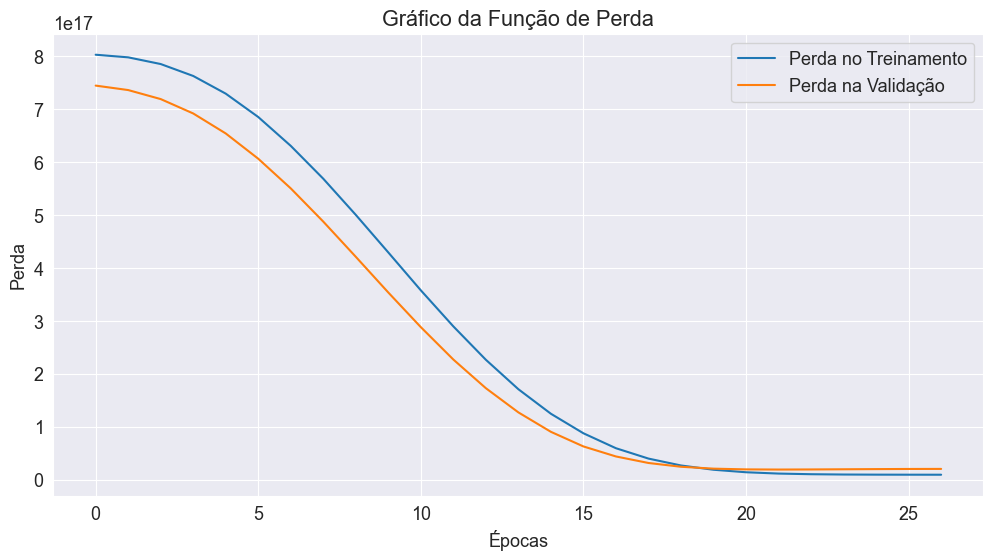

INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am/assets


In [76]:
# TREINAMENTO GRU I.L. PR-AM (LR:10, 50 EPOCH)

# Defina o callback ModelCheckpoint como antes
model_GRU = criar_modelo_GRU()

cp_interpolacao_linear_gru_pr_am = ModelCheckpoint('modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am', save_best_only=True)

# Defina o callback EarlyStopping para monitorar a perda (loss) no conjunto de validação
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_GRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=10), metrics=[RootMeanSquaredError()])

# Adicione o callback EarlyStopping à lista de callbacks
history = model_GRU.fit(X_train_pr_am_interpolacao_linear, y_train_pr_am_interpolacao_linear, validation_data=(X_val_pr_am_interpolacao_linear, y_val_pr_am_interpolacao_linear), epochs=50, callbacks=[cp_interpolacao_linear_gru_pr_am, early_stopping])

# Acesse os registros de perda (loss) do treinamento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crie um gráfico da função de perda durante o treinamento
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Perda no Treinamento')
plt.plot(val_loss, label='Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Gráfico da Função de Perda')
plt.legend()
plt.show()

# model_LSTM.save('modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am')

Epoch 1/50
 1/14 [=>............................] - ETA: 10s - loss: 777277342706827264.0000 - root_mean_squared_error: 881633344.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 97ms/step - loss: 817947384465063936.0000 - root_mean_squared_error: 904404416.0000 - val_loss: 818602555956264960.0000 - val_root_mean_squared_error: 904766592.0000
Epoch 2/50
 1/14 [=>............................] - ETA: 0s - loss: 822894980631625728.0000 - root_mean_squared_error: 907135616.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 110ms/step - loss: 815626452857782272.0000 - root_mean_squared_error: 903120384.0000 - val_loss: 814404758000369664.0000 - val_root_mean_squared_error: 902443776.0000
Epoch 3/50
 1/14 [=>............................] - ETA: 0s - loss: 828589213912924160.0000 - root_mean_squared_error: 910268736.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 91ms/step - loss: 809610543705882624.0000 - root_mean_squared_error: 899783616.0000 - val_loss: 805817022431625216.0000 - val_root_mean_squared_error: 897673088.0000
Epoch 4/50
 1/14 [=>............................] - ETA: 0s - loss: 800791086061584384.0000 - root_mean_squared_error: 894869312.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 86ms/step - loss: 798816638056005632.0000 - root_mean_squared_error: 893765440.0000 - val_loss: 791988464689086464.0000 - val_root_mean_squared_error: 889937344.0000
Epoch 5/50
 1/14 [=>............................] - ETA: 0s - loss: 798303441003741184.0000 - root_mean_squared_error: 893478272.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 81ms/step - loss: 782573484059394048.0000 - root_mean_squared_error: 884631808.0000 - val_loss: 772561331176865792.0000 - val_root_mean_squared_error: 878954688.0000
Epoch 6/50
10/14 [====================>.........] - ETA: 0s - loss: 766192822389833728.0000 - root_mean_squared_error: 875324416.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 90ms/step - loss: 760662828657934336.0000 - root_mean_squared_error: 872159872.0000 - val_loss: 747405467206025216.0000 - val_root_mean_squared_error: 864526144.0000
Epoch 7/50
 1/14 [=>............................] - ETA: 0s - loss: 734645978363068416.0000 - root_mean_squared_error: 857114944.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 120ms/step - loss: 733097110076915712.0000 - root_mean_squared_error: 856210880.0000 - val_loss: 716829148349202432.0000 - val_root_mean_squared_error: 846657664.0000
Epoch 8/50
 1/14 [=>............................] - ETA: 0s - loss: 716430918981517312.0000 - root_mean_squared_error: 846422400.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 85ms/step - loss: 700373994766860288.0000 - root_mean_squared_error: 836883520.0000 - val_loss: 681213424104898560.0000 - val_root_mean_squared_error: 825356544.0000
Epoch 9/50
 1/14 [=>............................] - ETA: 0s - loss: 685508116522991616.0000 - root_mean_squared_error: 827954176.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 89ms/step - loss: 662840790963191808.0000 - root_mean_squared_error: 814150336.0000 - val_loss: 641309123475931136.0000 - val_root_mean_squared_error: 800817792.0000
Epoch 10/50
 1/14 [=>............................] - ETA: 0s - loss: 649965234924027904.0000 - root_mean_squared_error: 806204224.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 86ms/step - loss: 621313611171627008.0000 - root_mean_squared_error: 788234496.0000 - val_loss: 597725032306704384.0000 - val_root_mean_squared_error: 773126784.0000
Epoch 11/50
 1/14 [=>............................] - ETA: 0s - loss: 578467223585161216.0000 - root_mean_squared_error: 760570304.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 115ms/step - loss: 576509474412429312.0000 - root_mean_squared_error: 759282240.0000 - val_loss: 551312516194500608.0000 - val_root_mean_squared_error: 742504192.0000
Epoch 12/50
 1/14 [=>............................] - ETA: 0s - loss: 549540687566077952.0000 - root_mean_squared_error: 741310144.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 87ms/step - loss: 529334103388979200.0000 - root_mean_squared_error: 727553536.0000 - val_loss: 502989323751129088.0000 - val_root_mean_squared_error: 709217408.0000
Epoch 13/50
 1/14 [=>............................] - ETA: 0s - loss: 511255658327179264.0000 - root_mean_squared_error: 715021440.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 89ms/step - loss: 480591550338826240.0000 - root_mean_squared_error: 693247104.0000 - val_loss: 453734741879816192.0000 - val_root_mean_squared_error: 673598336.0000
Epoch 14/50
 1/14 [=>............................] - ETA: 0s - loss: 441815314280218624.0000 - root_mean_squared_error: 664691904.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 89ms/step - loss: 431261720640487424.0000 - root_mean_squared_error: 656705216.0000 - val_loss: 404337051698200576.0000 - val_root_mean_squared_error: 635875008.0000
Epoch 15/50
 1/14 [=>............................] - ETA: 0s - loss: 397969814221488128.0000 - root_mean_squared_error: 630848512.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 89ms/step - loss: 382242021940658176.0000 - root_mean_squared_error: 618257216.0000 - val_loss: 355662702728708096.0000 - val_root_mean_squared_error: 596374656.0000
Epoch 16/50
 1/14 [=>............................] - ETA: 0s - loss: 348453582942502912.0000 - root_mean_squared_error: 590299584.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 113ms/step - loss: 334283867357708288.0000 - root_mean_squared_error: 578172864.0000 - val_loss: 308690672636919808.0000 - val_root_mean_squared_error: 555599360.0000
Epoch 17/50
 1/14 [=>............................] - ETA: 0s - loss: 317162512808148992.0000 - root_mean_squared_error: 563171840.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 89ms/step - loss: 288526282218536960.0000 - root_mean_squared_error: 537146432.0000 - val_loss: 264025864616804352.0000 - val_root_mean_squared_error: 513834464.0000
Epoch 18/50
 1/14 [=>............................] - ETA: 0s - loss: 264939318261317632.0000 - root_mean_squared_error: 514722560.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 83ms/step - loss: 245318413004570624.0000 - root_mean_squared_error: 495296288.0000 - val_loss: 222703090908790784.0000 - val_root_mean_squared_error: 471914272.0000
Epoch 19/50
14/14 [==============================] - ETA: 0s - loss: 205561172055818240.0000 - root_mean_squared_error: 453388544.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 85ms/step - loss: 205561172055818240.0000 - root_mean_squared_error: 453388544.0000 - val_loss: 184719997870800896.0000 - val_root_mean_squared_error: 429790656.0000
Epoch 20/50
 1/14 [=>............................] - ETA: 0s - loss: 176326188665405440.0000 - root_mean_squared_error: 419912128.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 111ms/step - loss: 169306786174599168.0000 - root_mean_squared_error: 411469056.0000 - val_loss: 150753850305806336.0000 - val_root_mean_squared_error: 388270336.0000
Epoch 21/50
 1/14 [=>............................] - ETA: 0s - loss: 150911252267270144.0000 - root_mean_squared_error: 388472960.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 86ms/step - loss: 137321554835931136.0000 - root_mean_squared_error: 370569216.0000 - val_loss: 120793026032304128.0000 - val_root_mean_squared_error: 347552896.0000
Epoch 22/50
 1/14 [=>............................] - ETA: 0s - loss: 117601564683665408.0000 - root_mean_squared_error: 342930848.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 85ms/step - loss: 109295647689015296.0000 - root_mean_squared_error: 330598912.0000 - val_loss: 95193930026450944.0000 - val_root_mean_squared_error: 308535136.0000
Epoch 23/50
 1/14 [=>............................] - ETA: 0s - loss: 88294614821240832.0000 - root_mean_squared_error: 297144096.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 91ms/step - loss: 85593011672580096.0000 - root_mean_squared_error: 292562848.0000 - val_loss: 73545413658935296.0000 - val_root_mean_squared_error: 271192576.0000
Epoch 24/50
 1/14 [=>............................] - ETA: 0s - loss: 73519326027579392.0000 - root_mean_squared_error: 271144480.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 92ms/step - loss: 65784583848722432.0000 - root_mean_squared_error: 256485056.0000 - val_loss: 55773624967102464.0000 - val_root_mean_squared_error: 236164400.0000
Epoch 25/50
 1/14 [=>............................] - ETA: 0s - loss: 58294491596980224.0000 - root_mean_squared_error: 241442528.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 126ms/step - loss: 49650994467831808.0000 - root_mean_squared_error: 222825024.0000 - val_loss: 41581704401387520.0000 - val_root_mean_squared_error: 203915920.0000
Epoch 26/50
 1/14 [=>............................] - ETA: 0s - loss: 40034816095158272.0000 - root_mean_squared_error: 200087024.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 86ms/step - loss: 36956552904572928.0000 - root_mean_squared_error: 192240880.0000 - val_loss: 30398631764819968.0000 - val_root_mean_squared_error: 174352032.0000
Epoch 27/50
 1/14 [=>............................] - ETA: 0s - loss: 30877378884403200.0000 - root_mean_squared_error: 175719600.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 90ms/step - loss: 27065376365871104.0000 - root_mean_squared_error: 164515584.0000 - val_loss: 21941804651773952.0000 - val_root_mean_squared_error: 148127664.0000
Epoch 28/50
 1/14 [=>............................] - ETA: 0s - loss: 22460224384270336.0000 - root_mean_squared_error: 149867360.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 89ms/step - loss: 19646052290265088.0000 - root_mean_squared_error: 140164368.0000 - val_loss: 15628706311569408.0000 - val_root_mean_squared_error: 125014824.0000
Epoch 29/50
 1/14 [=>............................] - ETA: 0s - loss: 14771132339060736.0000 - root_mean_squared_error: 121536544.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 121ms/step - loss: 14215525705973760.0000 - root_mean_squared_error: 119228880.0000 - val_loss: 11016550312050688.0000 - val_root_mean_squared_error: 104959752.0000
Epoch 30/50
 1/14 [=>............................] - ETA: 0s - loss: 12855747649994752.0000 - root_mean_squared_error: 113383192.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 88ms/step - loss: 10269047761403904.0000 - root_mean_squared_error: 101336312.0000 - val_loss: 7717371183628288.0000 - val_root_mean_squared_error: 87848568.0000
Epoch 31/50
 1/14 [=>............................] - ETA: 0s - loss: 9073236524400640.0000 - root_mean_squared_error: 95253536.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 86ms/step - loss: 7491987406061568.0000 - root_mean_squared_error: 86556264.0000 - val_loss: 5454020592271360.0000 - val_root_mean_squared_error: 73851344.0000
Epoch 32/50
 1/14 [=>............................] - ETA: 0s - loss: 4891587108667392.0000 - root_mean_squared_error: 69939880.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 88ms/step - loss: 5648698038026240.0000 - root_mean_squared_error: 75157824.0000 - val_loss: 3948059834712064.0000 - val_root_mean_squared_error: 62833588.0000
Epoch 33/50
 1/14 [=>............................] - ETA: 0s - loss: 4011994717880320.0000 - root_mean_squared_error: 63340308.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 85ms/step - loss: 4393294129790976.0000 - root_mean_squared_error: 66281928.0000 - val_loss: 2925107609600000.0000 - val_root_mean_squared_error: 54084264.0000
Epoch 34/50
 1/14 [=>............................] - ETA: 0s - loss: 2741033364357120.0000 - root_mean_squared_error: 52354880.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 115ms/step - loss: 3552484756815872.0000 - root_mean_squared_error: 59602724.0000 - val_loss: 2256114376769536.0000 - val_root_mean_squared_error: 47498572.0000
Epoch 35/50
 1/14 [=>............................] - ETA: 0s - loss: 2785375680462848.0000 - root_mean_squared_error: 52776660.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 83ms/step - loss: 3012305377820672.0000 - root_mean_squared_error: 54884472.0000 - val_loss: 1812873214951424.0000 - val_root_mean_squared_error: 42577848.0000
Epoch 36/50
 1/14 [=>............................] - ETA: 0s - loss: 3294053084954624.0000 - root_mean_squared_error: 57393840.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 86ms/step - loss: 2657554232508416.0000 - root_mean_squared_error: 51551472.0000 - val_loss: 1537204094500864.0000 - val_root_mean_squared_error: 39207196.0000
Epoch 37/50
 1/14 [=>............................] - ETA: 0s - loss: 904454882721792.0000 - root_mean_squared_error: 30074156.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 81ms/step - loss: 2444967846871040.0000 - root_mean_squared_error: 49446616.0000 - val_loss: 1366935753195520.0000 - val_root_mean_squared_error: 36972096.0000
Epoch 38/50
 1/14 [=>............................] - ETA: 0s - loss: 9197353563062272.0000 - root_mean_squared_error: 95902832.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 111ms/step - loss: 2314821479432192.0000 - root_mean_squared_error: 48112592.0000 - val_loss: 1262988954697728.0000 - val_root_mean_squared_error: 35538556.0000
Epoch 39/50
 1/14 [=>............................] - ETA: 0s - loss: 11979431513948160.0000 - root_mean_squared_error: 109450592.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 87ms/step - loss: 2233632236240896.0000 - root_mean_squared_error: 47261320.0000 - val_loss: 1196324888248320.0000 - val_root_mean_squared_error: 34587928.0000
Epoch 40/50
 1/14 [=>............................] - ETA: 0s - loss: 3014658214592512.0000 - root_mean_squared_error: 54905904.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 85ms/step - loss: 2189850547585024.0000 - root_mean_squared_error: 46795840.0000 - val_loss: 1151512944312320.0000 - val_root_mean_squared_error: 33933948.0000
Epoch 41/50
 1/14 [=>............................] - ETA: 0s - loss: 662904177164288.0000 - root_mean_squared_error: 25746926.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 87ms/step - loss: 2160510820679680.0000 - root_mean_squared_error: 46481296.0000 - val_loss: 1128552988672000.0000 - val_root_mean_squared_error: 33593944.0000
Epoch 42/50
 1/14 [=>............................] - ETA: 0s - loss: 2336584884027392.0000 - root_mean_squared_error: 48338236.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 82ms/step - loss: 2145371866267648.0000 - root_mean_squared_error: 46318160.0000 - val_loss: 1111445999714304.0000 - val_root_mean_squared_error: 33338356.0000
Epoch 43/50
12/14 [========================>.....] - ETA: 0s - loss: 2273618515984384.0000 - root_mean_squared_error: 47682476.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 2s 118ms/step - loss: 2134116770250752.0000 - root_mean_squared_error: 46196500.0000 - val_loss: 1102193901961216.0000 - val_root_mean_squared_error: 33199306.0000
Epoch 44/50
 1/14 [=>............................] - ETA: 0s - loss: 329604078239744.0000 - root_mean_squared_error: 18155002.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 81ms/step - loss: 2132231011172352.0000 - root_mean_squared_error: 46176088.0000 - val_loss: 1094376860155904.0000 - val_root_mean_squared_error: 33081368.0000
Epoch 45/50
 1/14 [=>............................] - ETA: 0s - loss: 1743939929374720.0000 - root_mean_squared_error: 41760508.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 83ms/step - loss: 2125932978503680.0000 - root_mean_squared_error: 46107840.0000 - val_loss: 1093169571692544.0000 - val_root_mean_squared_error: 33063114.0000
Epoch 46/50
 1/14 [=>............................] - ETA: 0s - loss: 442199128932352.0000 - root_mean_squared_error: 21028532.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 87ms/step - loss: 2125992436957184.0000 - root_mean_squared_error: 46108484.0000 - val_loss: 1090658358001664.0000 - val_root_mean_squared_error: 33025118.0000
Epoch 47/50
 1/14 [=>............................] - ETA: 0s - loss: 333588029505536.0000 - root_mean_squared_error: 18264392.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 113ms/step - loss: 2124902186352640.0000 - root_mean_squared_error: 46096660.0000 - val_loss: 1089735409795072.0000 - val_root_mean_squared_error: 33011140.0000
Epoch 48/50
 1/14 [=>............................] - ETA: 0s - loss: 467520578387968.0000 - root_mean_squared_error: 21622224.0000INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


14/14 [==============================] - 1s 82ms/step - loss: 2126037936766976.0000 - root_mean_squared_error: 46108980.0000 - val_loss: 1087829719384064.0000 - val_root_mean_squared_error: 32982264.0000
Epoch 49/50
14/14 [==============================] - 0s 5ms/step - loss: 2123733015724032.0000 - root_mean_squared_error: 46083976.0000 - val_loss: 1088458193895424.0000 - val_root_mean_squared_error: 32991790.0000
Epoch 50/50
14/14 [==============================] - 0s 3ms/step - loss: 2124209488658432.0000 - root_mean_squared_error: 46089148.0000 - val_loss: 1088430276608000.0000 - val_root_mean_squared_error: 32991366.0000


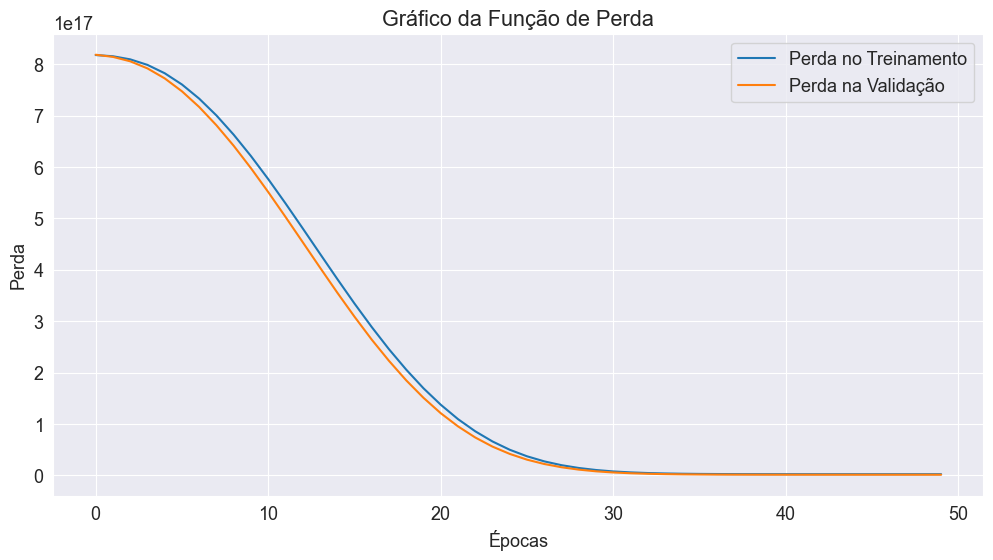

INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


INFO:tensorflow:Assets written to: modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba/assets


In [77]:
# TREINAMENTO GRU I.L. PA-BA (LR:10, 50 EPOCH)

# Defina o callback ModelCheckpoint como antes
model_GRU = criar_modelo_GRU()

cp_interpolacao_linear_gru_pa_ba = ModelCheckpoint('modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba', save_best_only=True)

# Defina o callback EarlyStopping para monitorar a perda (loss) no conjunto de validação
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_GRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=10), metrics=[RootMeanSquaredError()])

# Adicione o callback EarlyStopping à lista de callbacks
history = model_GRU.fit(X_train_pa_ba_interpolacao_linear, y_train_pa_ba_interpolacao_linear, validation_data=(X_val_pa_ba_interpolacao_linear, y_val_pa_ba_interpolacao_linear), epochs=50, callbacks=[cp_interpolacao_linear_gru_pa_ba, early_stopping])

# Acesse os registros de perda (loss) do treinamento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crie um gráfico da função de perda durante o treinamento
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Perda no Treinamento')
plt.plot(val_loss, label='Perda na Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Gráfico da Função de Perda')
plt.legend()
plt.show()

# model_LSTM.save('modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba')

### Resultados

In [44]:
from tensorflow.keras.models import load_model

# Carregando os modelos treinados lstm
treinado_interpolacao_linear_pa_ba = load_model('modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pa_ba')
treinado_knn_pa_ba = load_model('modelos_vazao/modelos_LSTM/treinado_knn_pa_ba')
treinado_original_pa_ba = load_model('modelos_vazao/modelos_LSTM/treinado_original_pa_ba')

treinado_interpolacao_linear_pr_am = load_model('modelos_vazao/modelos_LSTM/treinado_interpolacao_linear_pr_am')
treinado_knn_pr_am = load_model('modelos_vazao/modelos_LSTM/treinado_knn_pr_am')
treinado_original_pr_am = load_model('modelos_vazao/modelos_LSTM/treinado_original_pr_am')

In [35]:
# Carregando os modelos treinados gru

treinado_GRU_interpolacao_linear_pa_ba = load_model('modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pa_ba')
treinado_GRU_knn_pa_ba = load_model('modelos_vazao/modelos_GRU/treinado_knn_pa_ba')
treinado_GRU_original_pa_ba = load_model('modelos_vazao/modelos_GRU/treinado_original_pa_ba')

treinado_GRU_interpolacao_linear_pr_am = load_model('modelos_vazao/modelos_GRU/treinado_interpolacao_linear_pr_am')
treinado_GRU_knn_pr_am = load_model('modelos_vazao/modelos_GRU/treinado_knn_pr_am')
treinado_GRU_original_pr_am = load_model('modelos_vazao/modelos_GRU/treinado_original_pr_am')

In [36]:
test_predictions_original_pr_am = treinado_original_pr_am.predict(X_test_pr_am_original).flatten()
test_results_original_pr_am = pd.DataFrame(data={'Predições':test_predictions_original_pr_am, 'Real':y_test_pr_am_original})
test_results_original_pr_am #RUIM

2/2 [==============================] - 0s 2ms/step


,Predições,Real
0,932536128.0,9.161959e+08
1,932536128.0,9.203440e+08
2,932536128.0,9.193985e+08
3,932536128.0,9.126961e+08
4,932536128.0,9.214264e+08
5,932536128.0,9.084353e+08
6,932536128.0,9.217740e+08
7,932536128.0,9.033837e+08
8,932536128.0,9.348278e+08
9,932536128.0,9.268902e+08


In [45]:
test_predictions_original_pa_ba = treinado_original_pa_ba.predict(X_test_pa_ba_original).flatten()
test_results_original_pa_ba = pd.DataFrame(data={'Predições':test_predictions_original_pa_ba, 'Real':y_test_pa_ba_original})
test_results_original_pa_ba #RUIM

2/2 [==============================] - 0s 25ms/step


,Predições,Real
0,826878272.0,8.993717e+08
1,826878272.0,9.188121e+08
2,826878272.0,8.996576e+08
3,826878272.0,8.861682e+08
4,826878272.0,8.968497e+08
5,826878272.0,9.199187e+08
6,826878272.0,9.046751e+08
7,826878272.0,9.105209e+08
8,826878272.0,9.121333e+08
9,826878272.0,8.862535e+08


In [38]:
test_predictions_knn_pa_ba = treinado_knn_pa_ba.predict(X_test_pa_ba_knn).flatten()
test_results_knn_pa_ba = pd.DataFrame(data={'Predições':test_predictions_knn_pa_ba, 'Real':y_test_pa_ba_knn})
test_results_knn_pa_ba #RUIM

5/5 [==============================] - 0s 943us/step


,Predições,Real
0,903538432.0,9.018042e+08
1,903538432.0,9.018042e+08
2,903538432.0,9.018042e+08
3,903538432.0,9.192905e+08
4,903538432.0,9.252855e+08
...,...,...
135,903538432.0,8.922115e+08
136,903538432.0,9.018042e+08
137,903538432.0,9.026943e+08
138,903538432.0,9.018042e+08


In [39]:
test_predictions_knn_pr_am = treinado_knn_pr_am.predict(X_test_pr_am_knn).flatten()
test_results_knn_pr_am = pd.DataFrame(data={'Predições':test_predictions_knn_pr_am, 'Real':y_test_pr_am_knn})
test_results_knn_pr_am #RUIM

5/5 [==============================] - 0s 1ms/step


,Predições,Real
0,866670336.0,8.860125e+08
1,866670336.0,6.651133e+08
2,866670336.0,9.127869e+08
3,866670336.0,9.204704e+08
4,866670336.0,8.860125e+08
...,...,...
127,866670336.0,9.173441e+08
128,866670336.0,9.202564e+08
129,866670336.0,9.202819e+08
130,866670336.0,8.860125e+08


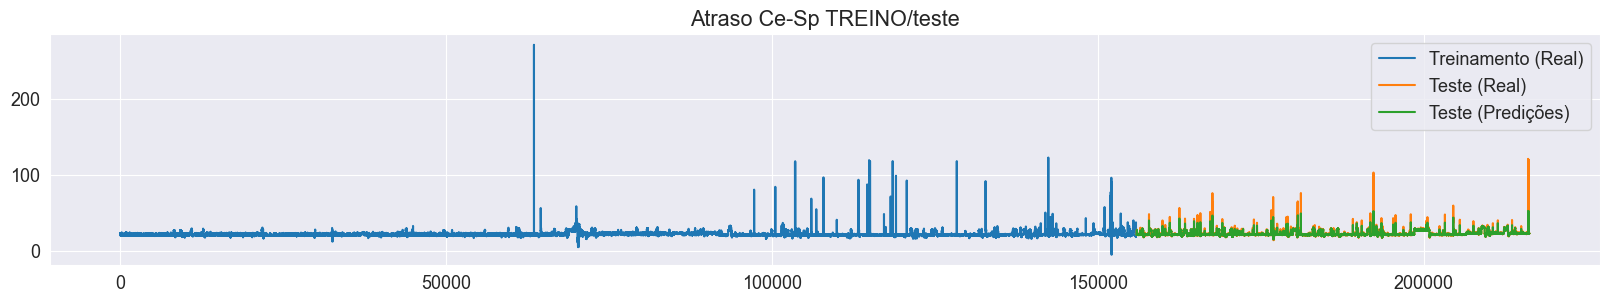

In [40]:
plt.figure(figsize=(20, 3))

# Plotar os valores de treinamento
plt.plot(train_results_ce_sp['Real'], label='Treinamento (Real)')

# Obter o número de valores de treinamento
num_train_samples = len(train_results_ce_sp)

# Plotar os valores de teste (começando logo após os valores de treinamento)
plt.plot(range(num_train_samples, num_train_samples + len(test_results_ce_sp)), 
         test_results_ce_sp['Real'], label='Teste (Real)')

# Plotar os valores previstos de teste sobrepostos
plt.plot(range(num_train_samples, num_train_samples + len(test_results_ce_sp)), 
         test_results_ce_sp['Predições'], label='Teste (Predições)')

plt.title('Atraso Ce-Sp TREINO/teste')
plt.legend()
plt.show()


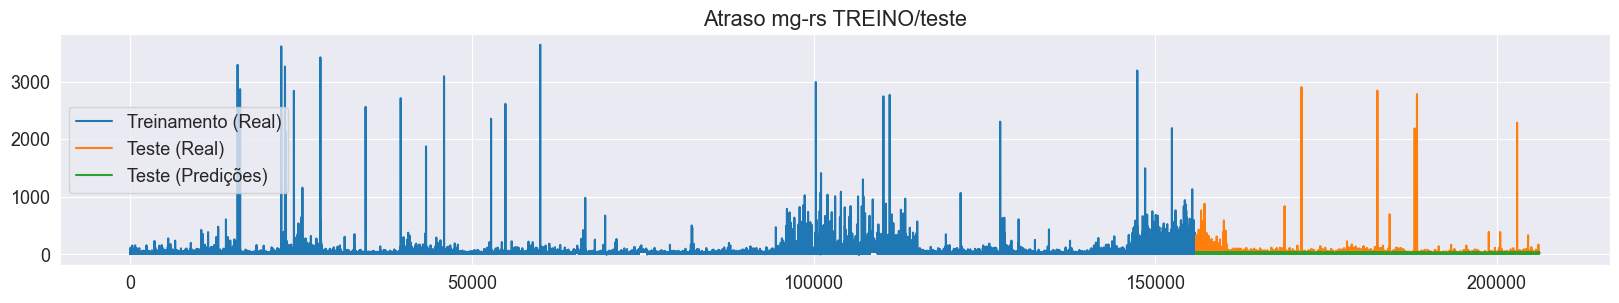

In [41]:
plt.figure(figsize=(20, 3))

# Plotar os valores de treinamento
plt.plot(train_results_mg_rs['Real'], label='Treinamento (Real)')

# Obter o número de valores de treinamento
num_train_samples = len(train_results_mg_rs)

# Plotar os valores de teste (começando logo após os valores de treinamento)
plt.plot(range(num_train_samples, num_train_samples + len(test_results_mg_rs)), 
         test_results_mg_rs['Real'], label='Teste (Real)')

# Plotar os valores previstos de teste sobrepostos
plt.plot(range(num_train_samples, num_train_samples + len(test_results_mg_rs)), 
         test_results_mg_rs['Predições'], label='Teste (Predições)')

plt.title('Atraso mg-rs TREINO/teste')
plt.legend()
plt.show()

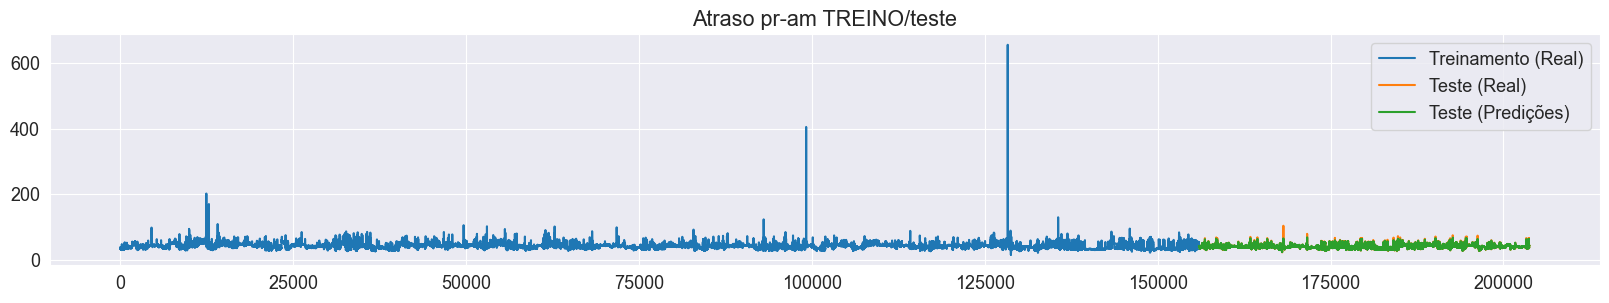

In [42]:
plt.figure(figsize=(20, 3))

# Plotar os valores de treinamento
plt.plot(train_results_pr_am['Real'], label='Treinamento (Real)')

# Obter o número de valores de treinamento
num_train_samples = len(train_results_pr_am)

# Plotar os valores de teste (começando logo após os valores de treinamento)
plt.plot(range(num_train_samples, num_train_samples + len(test_results_pr_am)), 
         test_results_pr_am['Real'], label='Teste (Real)')

# Plotar os valores previstos de teste sobrepostos
plt.plot(range(num_train_samples, num_train_samples + len(test_results_pr_am)), 
         test_results_pr_am['Predições'], label='Teste (Predições)')

plt.title('Atraso pr-am TREINO/teste')
plt.legend()
plt.show()

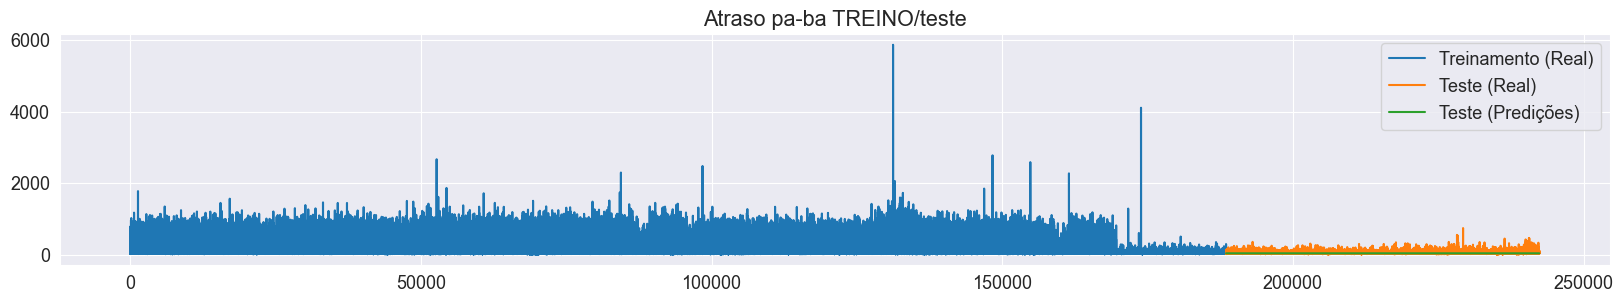

In [62]:
plt.figure(figsize=(20, 3))

# Plotar os valores de treinamento
plt.plot(train_results_pa_ba['Real'], label='Treinamento (Real)')

# Obter o número de valores de treinamento
num_train_samples = len(train_results_pa_ba)

# Plotar os valores de teste (começando logo após os valores de treinamento)
plt.plot(range(num_train_samples, num_train_samples + len(test_results_pa_ba)), 
         test_results_pa_ba['Real'], label='Teste (Real)')

# Plotar os valores previstos de teste sobrepostos
plt.plot(range(num_train_samples, num_train_samples + len(test_results_pa_ba)), 
         test_results_pa_ba['Predições'], label='Teste (Predições)')

plt.title('Atraso pa-ba TREINO/teste')
plt.legend()
plt.show()

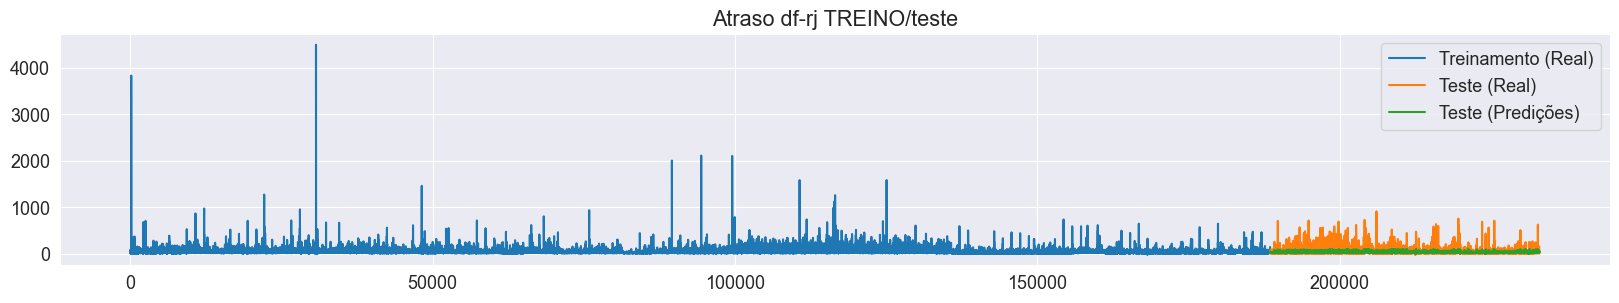

In [44]:
plt.figure(figsize=(20, 3))

# Plotar os valores de treinamento
plt.plot(train_results_df_rj['Real'], label='Treinamento (Real)')

# Obter o número de valores de treinamento
num_train_samples = len(train_results_df_rj)

# Plotar os valores de teste (começando logo após os valores de treinamento)
plt.plot(range(num_train_samples, num_train_samples + len(test_results_df_rj)), 
         test_results_df_rj['Real'], label='Teste (Real)')

# Plotar os valores previstos de teste sobrepostos
plt.plot(range(num_train_samples, num_train_samples + len(test_results_df_rj)), 
         test_results_df_rj['Predições'], label='Teste (Predições)')

plt.title('Atraso df-rj TREINO/teste')
plt.legend()
plt.show()

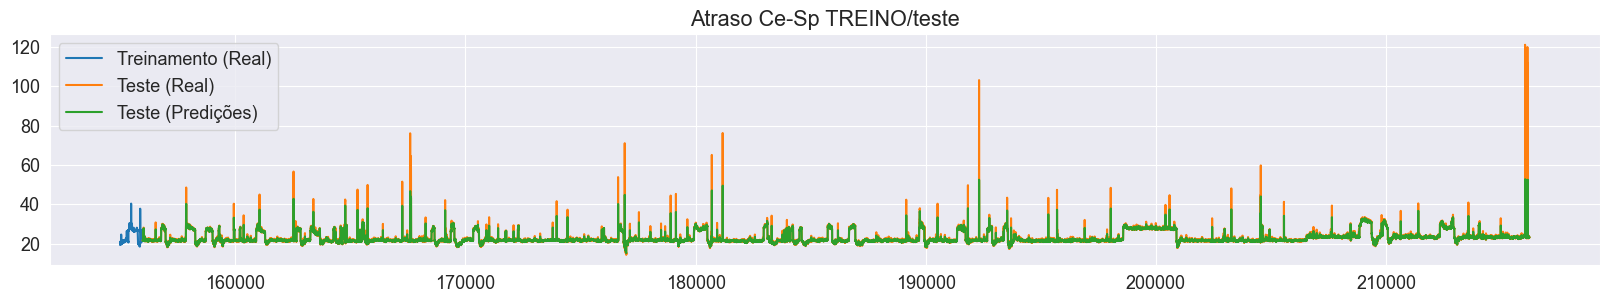

In [45]:
plt.figure(figsize=(20, 3))

# Plotar os valores de treinamento
plt.plot(train_results_ce_sp['Real'][155000:], label='Treinamento (Real)')

# Obter o número de valores de treinamento
num_train_samples = len(train_results_ce_sp)

# Plotar os valores de teste (começando logo após os valores de treinamento)
plt.plot(range(num_train_samples, num_train_samples + len(test_results_ce_sp)), 
         test_results_ce_sp['Real'], label='Teste (Real)')

# Plotar os valores previstos de teste sobrepostos
plt.plot(range(num_train_samples, num_train_samples + len(test_results_ce_sp)), 
         test_results_ce_sp['Predições'], label='Teste (Predições)')

plt.title('Atraso Ce-Sp TREINO/teste')
plt.legend()
plt.show()

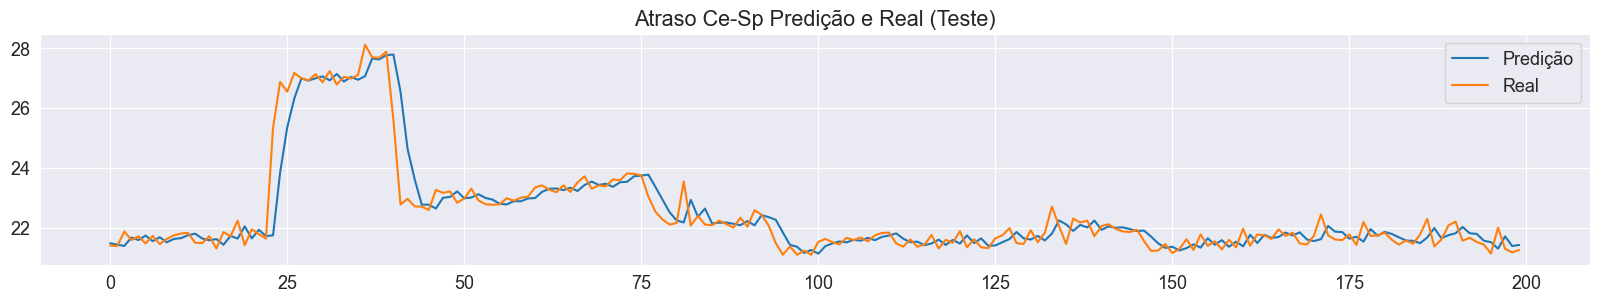

In [46]:
plt.figure(figsize=(20, 3))
plt.plot(test_results_ce_sp['Predições'][:200], label='Predição')
plt.plot(test_results_ce_sp['Real'][:200], label='Real')
plt.title('Atraso Ce-Sp Predição e Real (Teste)')
plt.legend()

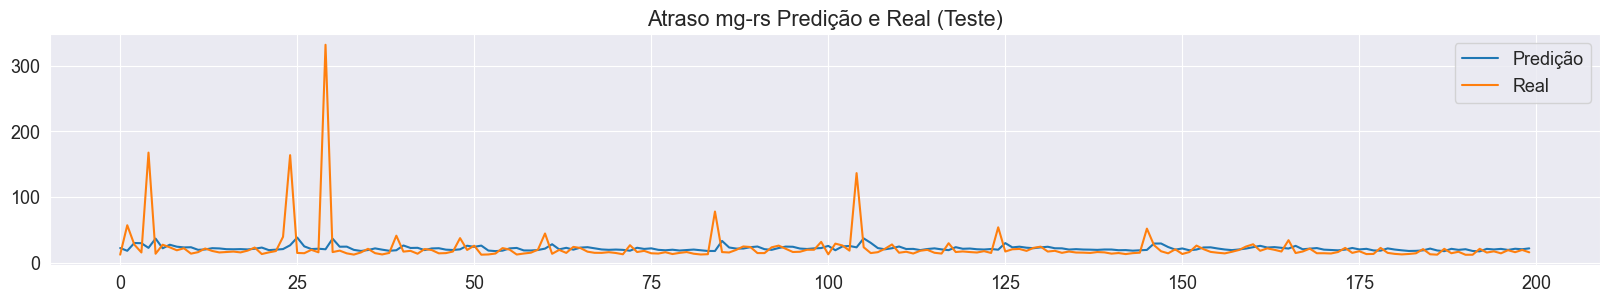

In [47]:
plt.figure(figsize=(20, 3))
plt.plot(test_results_mg_rs['Predições'][:200], label='Predição')
plt.plot(test_results_mg_rs['Real'][:200], label='Real')
plt.title('Atraso mg-rs Predição e Real (Teste)')
plt.legend()

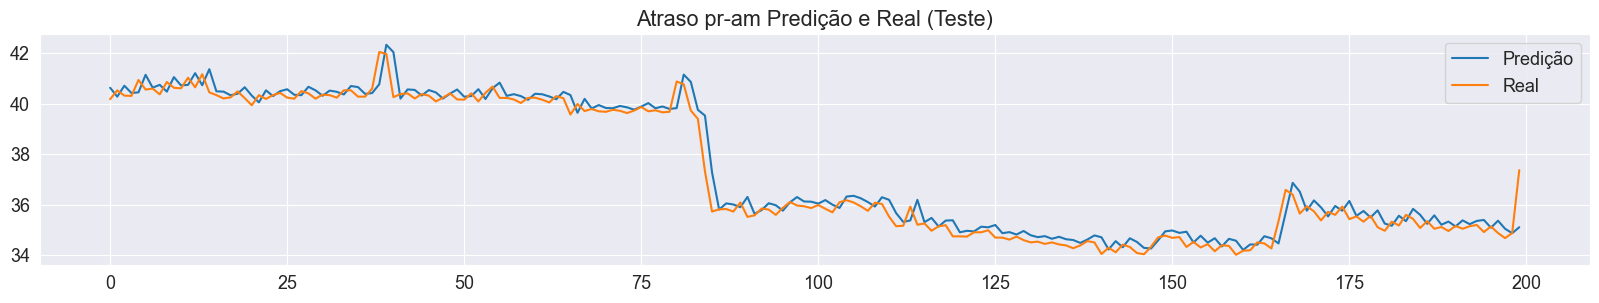

In [48]:
plt.figure(figsize=(20, 3))
plt.plot(test_results_pr_am['Predições'][:200], label='Predição')
plt.plot(test_results_pr_am['Real'][:200], label='Real')
plt.title('Atraso pr-am Predição e Real (Teste)')
plt.legend()

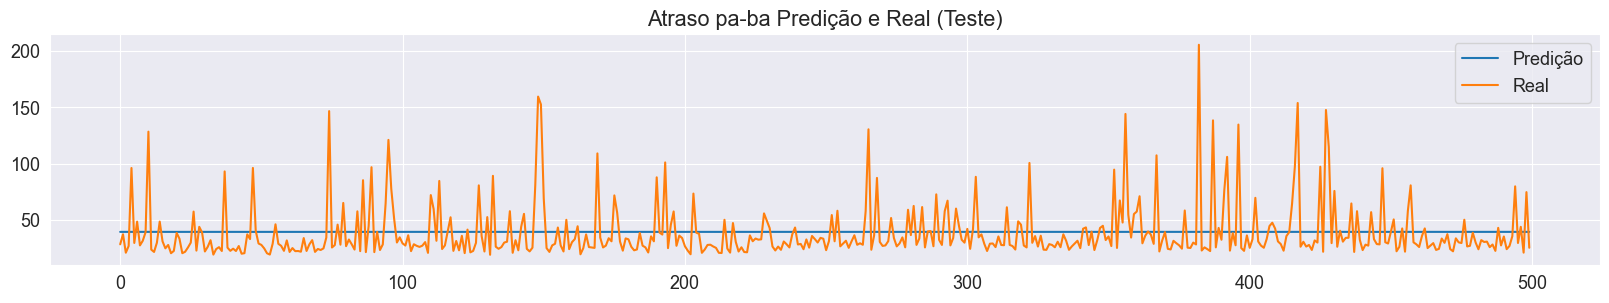

In [63]:
plt.figure(figsize=(20, 3))
plt.plot(test_results_pa_ba['Predições'][:500], label='Predição')
plt.plot(test_results_pa_ba['Real'][:500], label='Real')
plt.title('Atraso pa-ba Predição e Real (Teste)')
plt.legend()

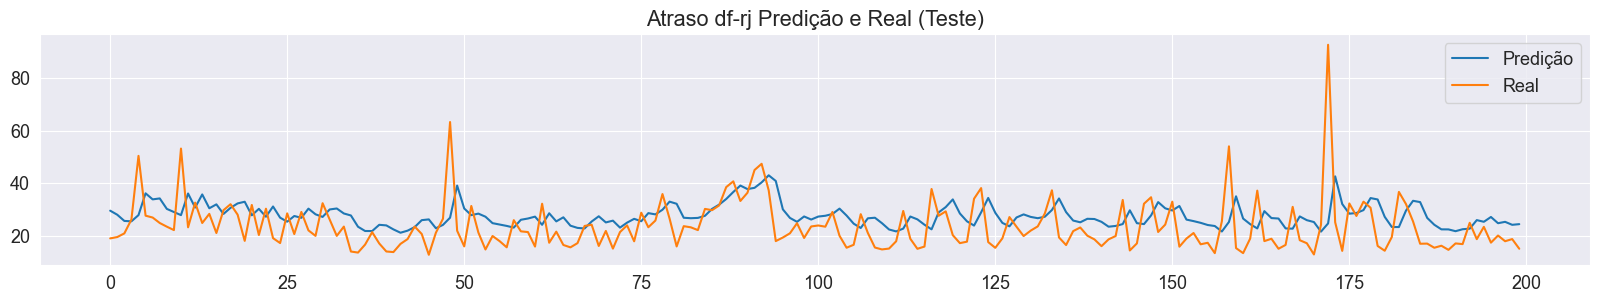

In [50]:
plt.figure(figsize=(20, 3))
plt.plot(test_results_df_rj['Predições'][:200], label='Predição')
plt.plot(test_results_df_rj['Real'][:200], label='Real')
plt.title('Atraso df-rj Predição e Real (Teste)')
plt.legend()

### Predições (Gráficos)

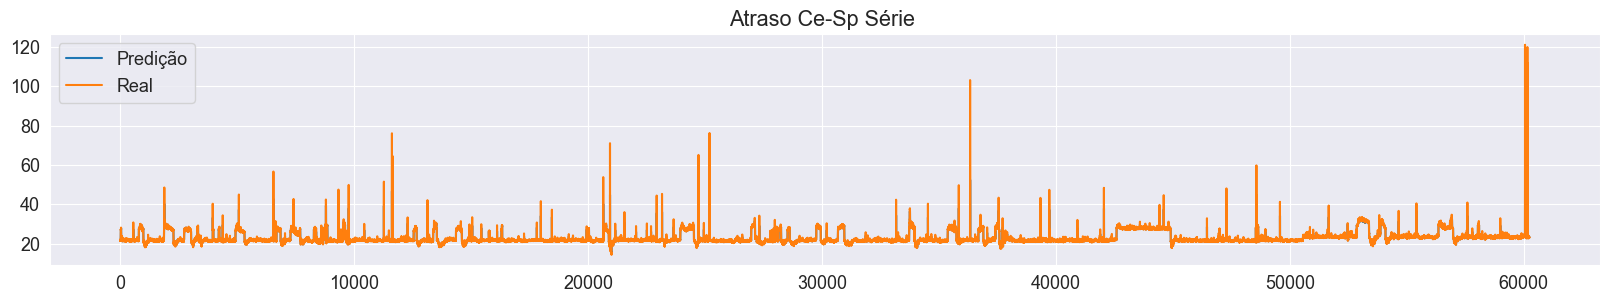

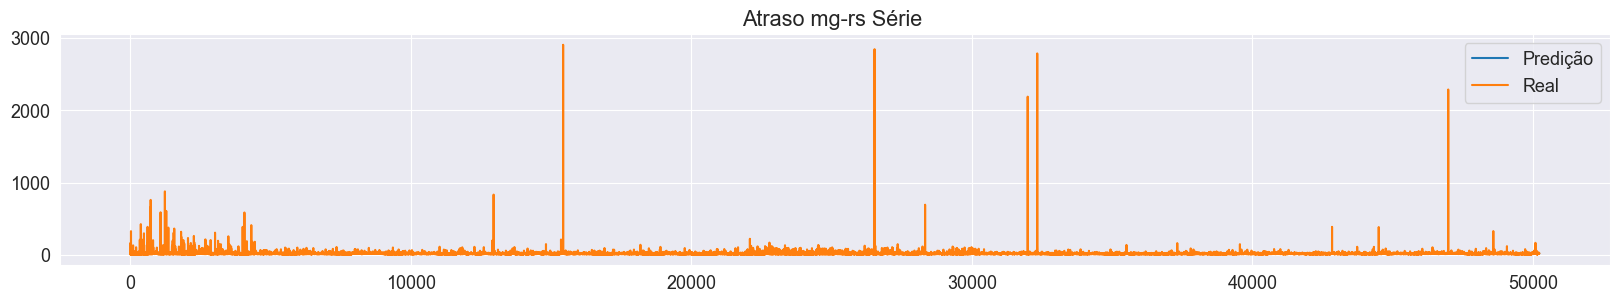

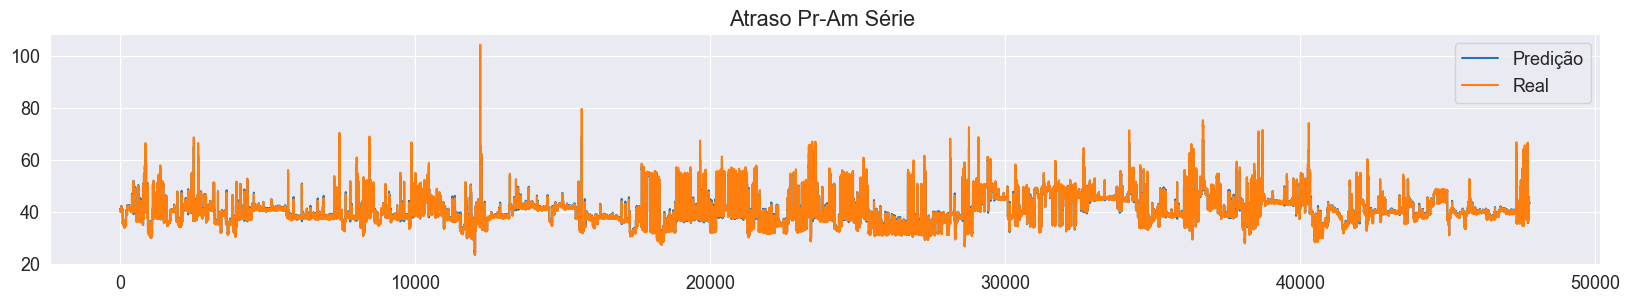

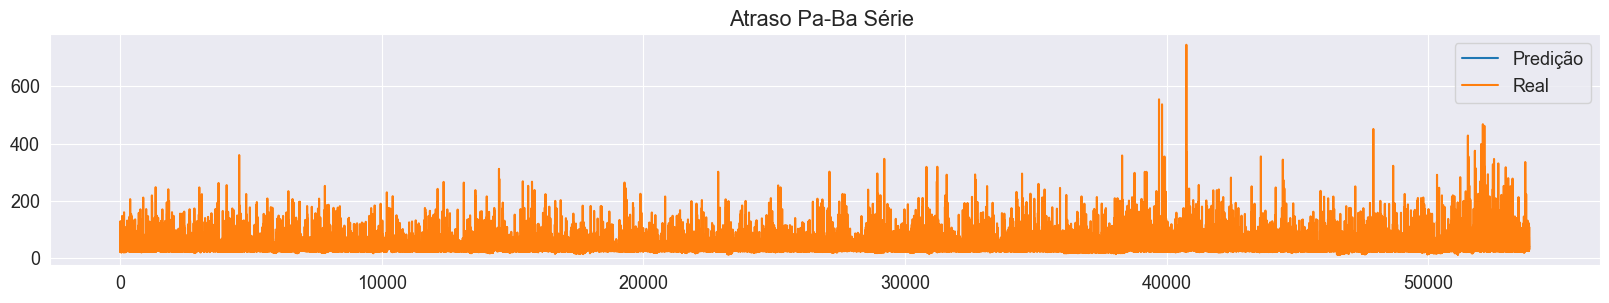

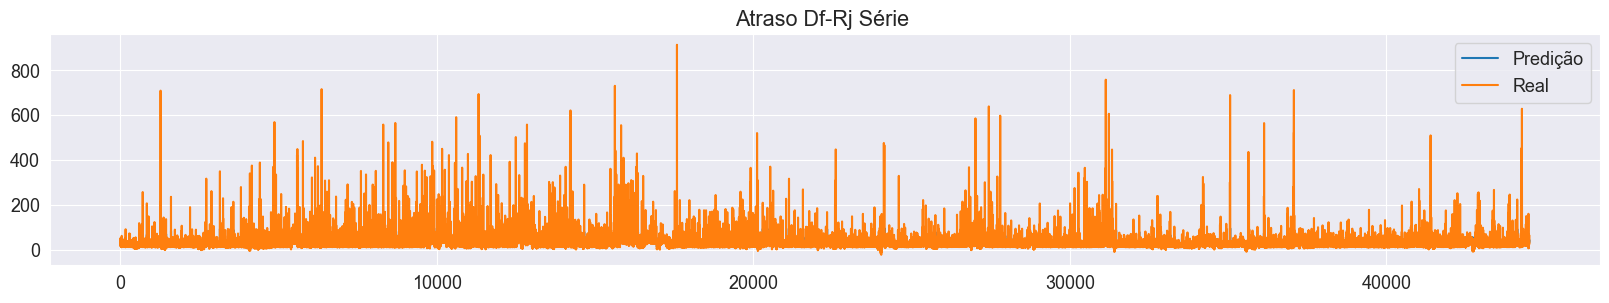

In [51]:
plt.figure(figsize=(20, 3))
plt.plot(test_results_ce_sp['Predições'],label='Predição')
plt.plot(test_results_ce_sp['Real'], label='Real')
plt.title('Atraso Ce-Sp Série ')
plt.legend()

plt.figure(figsize=(20, 3))
plt.plot(test_results_mg_rs['Predições'],label='Predição')
plt.plot(test_results_mg_rs['Real'], label='Real')
plt.title('Atraso mg-rs Série ')
plt.legend()

plt.figure(figsize=(20, 3))
plt.plot(test_results_pr_am['Predições'],label='Predição')
plt.plot(test_results_pr_am['Real'], label='Real')
plt.title('Atraso Pr-Am Série ')
plt.legend()

plt.figure(figsize=(20, 3))
plt.plot(test_results_pa_ba['Predições'],label='Predição')
plt.plot(test_results_pa_ba['Real'], label='Real')
plt.title('Atraso Pa-Ba Série ')
plt.legend()

plt.figure(figsize=(20, 3))
plt.plot(test_results_df_rj['Predições'],label='Predição')
plt.plot(test_results_df_rj['Real'], label='Real')
plt.title('Atraso Df-Rj Série ')
plt.legend()

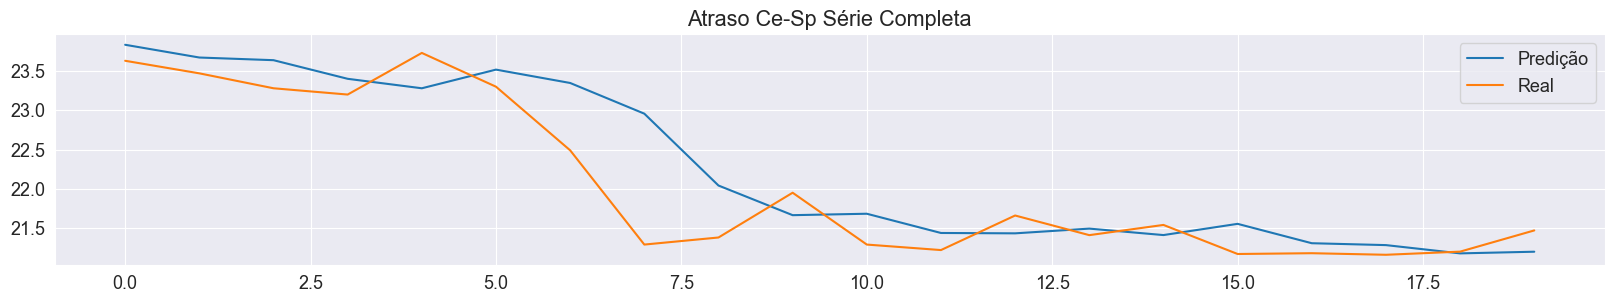

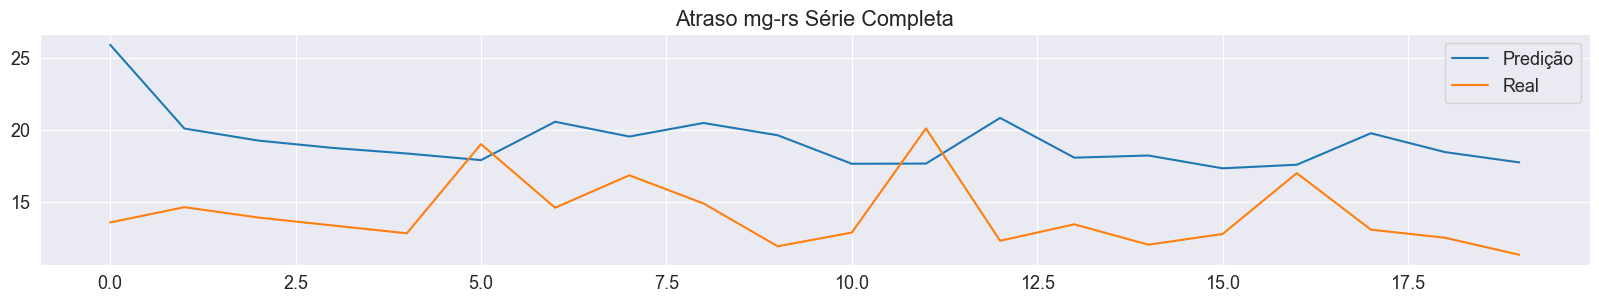

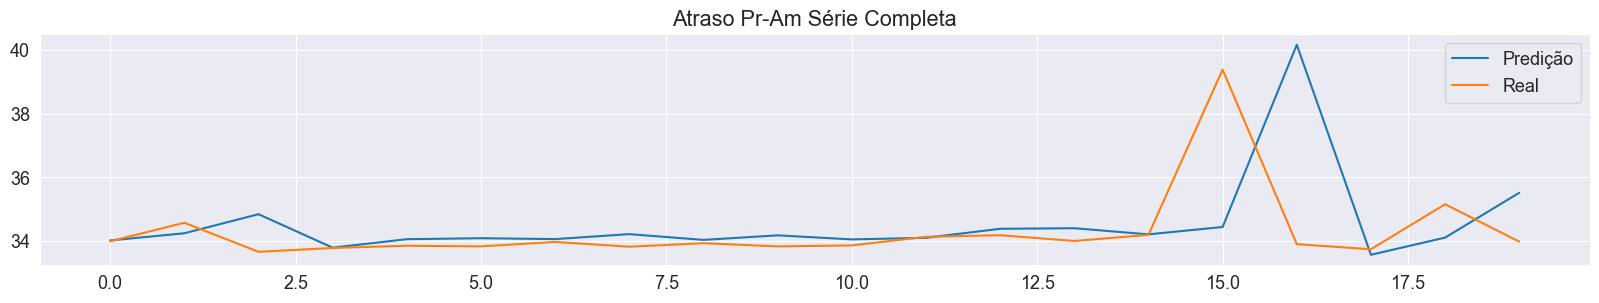

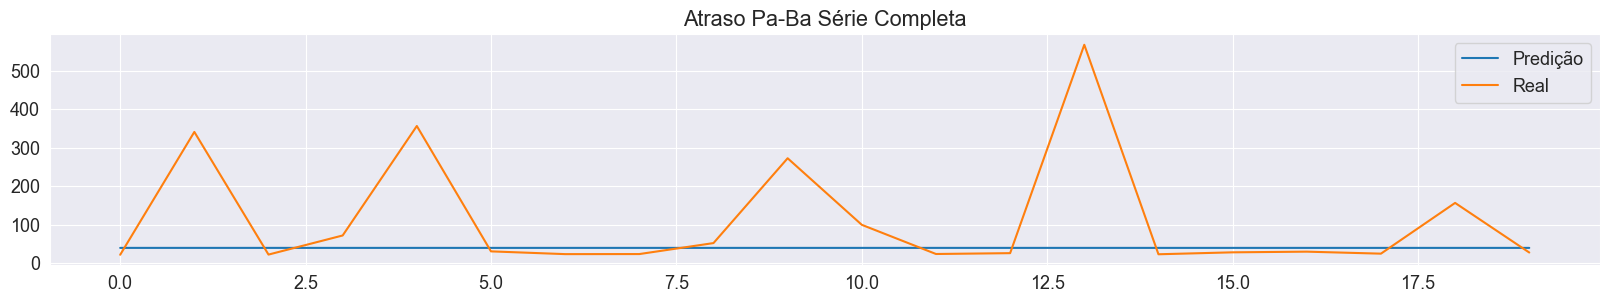

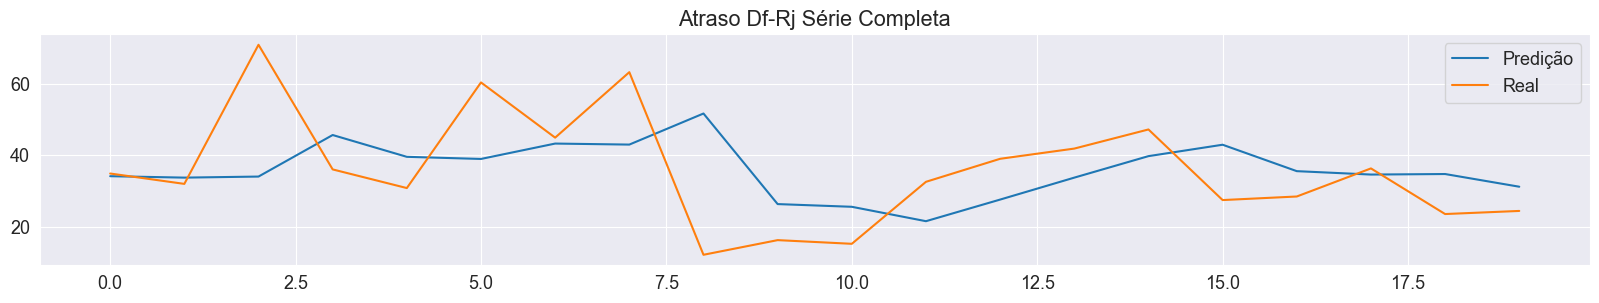

In [52]:
plt.figure(figsize=(20, 3))
plt.plot(train_results_ce_sp['Predições'][:20],label='Predição')
plt.plot(train_results_ce_sp['Real'][:20], label='Real')
plt.title('Atraso Ce-Sp Série Completa')
plt.legend()

plt.figure(figsize=(20, 3))
plt.plot(train_results_mg_rs['Predições'][:20],label='Predição')
plt.plot(train_results_mg_rs['Real'][:20], label='Real')
plt.title('Atraso mg-rs Série Completa')
plt.legend()

plt.figure(figsize=(20, 3))
plt.plot(train_results_pr_am['Predições'][:20],label='Predição')
plt.plot(train_results_pr_am['Real'][:20], label='Real')
plt.title('Atraso Pr-Am Série Completa')
plt.legend()

plt.figure(figsize=(20, 3))
plt.plot(train_results_pa_ba['Predições'][:20],label='Predição')
plt.plot(train_results_pa_ba['Real'][:20], label='Real')
plt.title('Atraso Pa-Ba Série Completa')
plt.legend()

plt.figure(figsize=(20, 3))
plt.plot(train_results_df_rj['Predições'][:20],label='Predição')
plt.plot(train_results_df_rj['Real'][:20], label='Real')
plt.title('Atraso Df-Rj Série Completa')
plt.legend()

In [53]:
# Modelo GRU
model2 = Sequential()
model2.add(InputLayer((3, 1)))
model2.add(GRU(64))
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [55]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

NameError: name 'X_train1' is not defined

In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model('model2/')

In [ ]:
train_predictions2 = model2.predict(X_train1).flatten()
train_results2 = pd.DataFrame(data={'Predições':train_predictions2, 'Real':y_train1})

5892/5892 [==============================] - 4s 630us/step


5892/5892 [==============================] - 4s 623us/step


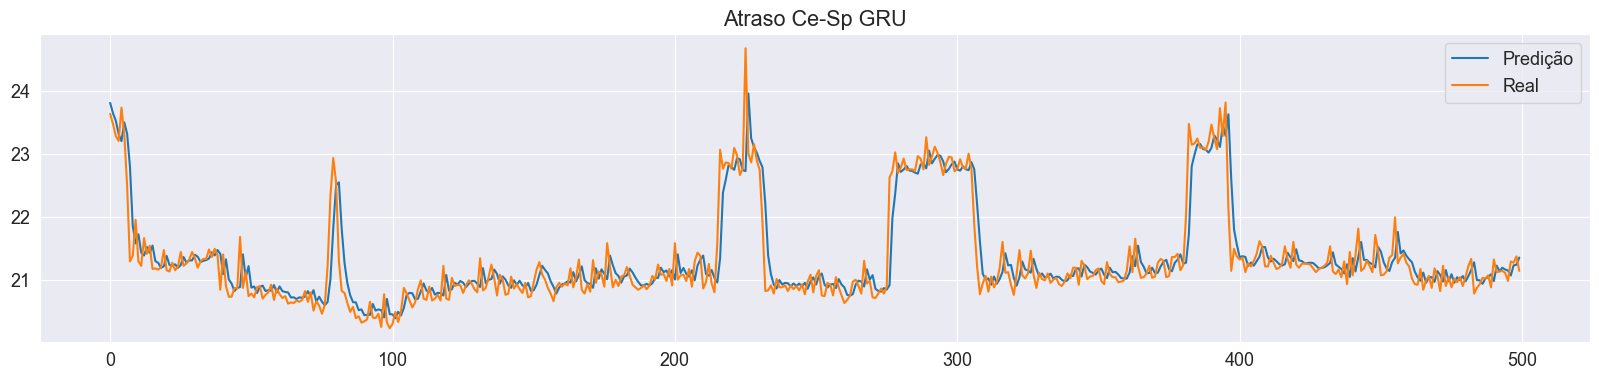

In [ ]:
plt.figure(figsize=(20, 4))
train_predictions2 = model2.predict(X_train1).flatten()
plt.plot(train_results2['Predições'][0:500],label='Predição')
plt.plot(train_results2['Real'][0:500], label='Real')
plt.title('Atraso Ce-Sp GRU')
plt.legend()

Predição CNN 1D

In [ ]:
model3 = Sequential()
model3.add(InputLayer((3, 1)) )
model3.add(Conv1D(64, kernel_size=2))
model3.add(Flatten())
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 8)                 1032      
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1233 (4.82 KB)
Trainable params: 1233 (4.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10


5818/5892 [============================>.] - ETA: 0s - loss: 3.5904 - root_mean_squared_error: 1.8948INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


5892/5892 [==============================] - 5s 722us/step - loss: 3.6049 - root_mean_squared_error: 1.8987 - val_loss: 2.4558 - val_root_mean_squared_error: 1.5671
Epoch 2/10
5892/5892 [==============================] - 4s 695us/step - loss: 3.0445 - root_mean_squared_error: 1.7449 - val_loss: 2.4604 - val_root_mean_squared_error: 1.5686
Epoch 3/10
5839/5892 [============================>.] - ETA: 0s - loss: 3.0101 - root_mean_squared_error: 1.7350INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


5892/5892 [==============================] - 4s 710us/step - loss: 3.0038 - root_mean_squared_error: 1.7332 - val_loss: 2.3140 - val_root_mean_squared_error: 1.5212
Epoch 4/10
5892/5892 [==============================] - 4s 699us/step - loss: 3.0303 - root_mean_squared_error: 1.7408 - val_loss: 3.0214 - val_root_mean_squared_error: 1.7382
Epoch 5/10
5892/5892 [==============================] - 4s 680us/step - loss: 2.9853 - root_mean_squared_error: 1.7278 - val_loss: 2.5119 - val_root_mean_squared_error: 1.5849
Epoch 6/10
5892/5892 [==============================] - 4s 681us/step - loss: 2.9544 - root_mean_squared_error: 1.7188 - val_loss: 2.5818 - val_root_mean_squared_error: 1.6068
Epoch 7/10
5892/5892 [==============================] - 4s 675us/step - loss: 2.9744 - root_mean_squared_error: 1.7247 - val_loss: 2.8109 - val_root_mean_squared_error: 1.6766
Epoch 8/10
5874/5892 [============================>.] - ETA: 0s - loss: 2.8976 - root_mean_squared_error: 1.7022INFO:tensorflow:Ass

INFO:tensorflow:Assets written to: model3/assets


5892/5892 [==============================] - 4s 699us/step - loss: 2.8965 - root_mean_squared_error: 1.7019 - val_loss: 2.2861 - val_root_mean_squared_error: 1.5120
Epoch 9/10
5892/5892 [==============================] - 4s 682us/step - loss: 2.9067 - root_mean_squared_error: 1.7049 - val_loss: 2.2930 - val_root_mean_squared_error: 1.5143
Epoch 10/10
5892/5892 [==============================] - 4s 673us/step - loss: 2.9445 - root_mean_squared_error: 1.7159 - val_loss: 2.4138 - val_root_mean_squared_error: 1.5537


In [ ]:
model3 = load_model('model3/')

In [ ]:
train_predictions3 = model3.predict(X_train1).flatten()
train_results3 = pd.DataFrame(data={'Predições':train_predictions3, 'Real':y_train1})

5892/5892 [==============================] - 2s 391us/step


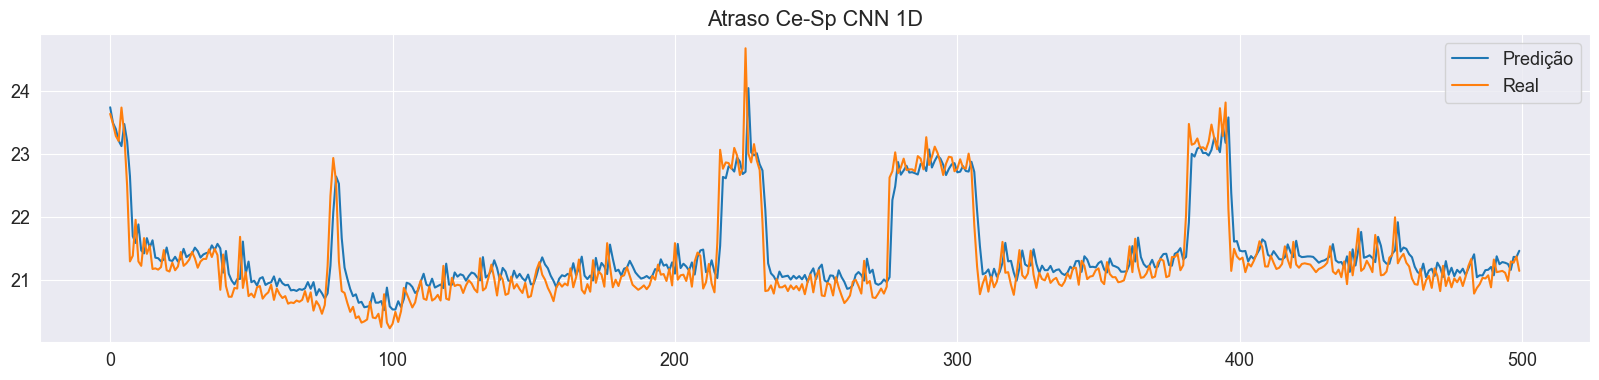

In [ ]:
plt.figure(figsize=(20, 4))
plt.plot(train_results3['Predições'][0:500],label='Predição')
plt.plot(train_results3['Real'][0:500], label='Real')
plt.title('Atraso Ce-Sp CNN 1D')
plt.legend()